# Análisis exploratorio



### Importamos las librerias que vamos a estar utilizando

Instalamos reaseachpy

In [57]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

import scipy.stats as st

import researchpy

import sklearn as sk

from scipy.spatial.distance import mahalanobis

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Leemos el dataset correspondiente a entrenamiento

También se eliminan las variables reservation_status y reservation_status_date por aviso de los profes en slack

In [59]:
dataset = pd.read_csv("https://drive.google.com/uc?export=download&id=1EuZaas4tEuIWA8aDRdWXuecDYFLs4_tN")
dataset.drop(columns=['reservation_status', 'reservation_status_date'], inplace=True)
dataset.head()

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel         49               2016          September   
1  Resort Hotel          4               2015            October   
2    City Hotel         25               2016            October   
3    City Hotel         26               2016           December   
4    City Hotel        104               2017              March   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   
2                        0                     1       2       2.0  ...   
3                        2                     5       2       0.0  ...   
4                        2                     5       2       0.0  ...   

   deposit_type  agent company days_in_waiting_list    customer_type    adr  \
0    No Deposit    9.0     NaN                    0        Transient  115.5   
1    No Deposit    NaN     NaN                    0        Transient   42.0   
2    No Deposit    9.0     NaN                    0        Transient  229.0   
3    Non Refund  154.0     NaN                    0        Transient   75.0   
4    No Deposit   20.0     NaN                    0  Transient-Party   75.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          1   
1                            1                          0   
2                            0                          2   
3                            0                          0   
4                            0                          1   

                                     id is_canceled  
0  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689           1  
1  b1428f80-c56c-4ae4-91a9-6962edae08b1           0  
2  2226c018-ea20-4c4e-8f71-ea66aee70d7c           0  
3  314f56dc-2e4d-4298-9bdd-27bb008bffff           1  
4  28c75445-c603-413a-babf-ad377018b592           0  

[5 rows x 31 columns]

Agregar información del paper que ya lo tiene

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

### Analisis de duplicados

Sacamos el id para efectivamente ver los duplicados

In [61]:
datasetSinId = dataset.copy().drop(columns=['id'])
datasetSinId.duplicated().sum()

16786

Vamos a eliminar la columna de id para poder observar si se repiten

In [62]:
columnsSinId = dataset.columns
columnsSinId = columnsSinId.drop(columnsSinId[29])
columnsSinId

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'is_canceled'],
      dtype='object')

In [63]:
ds_copy=dataset.copy()
ds_bools=ds_copy.duplicated(subset=columnsSinId)
ds_copy['bools']=ds_bools
ds_copy

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       agent company days_in_waiting_list    customer_type     adr  \
0        9.0     NaN                    0        Transient  115.50   
1        NaN     NaN                    0        Transient   42.00   
2        9.0     NaN                    0        Transient  229.00   
3      154.0     NaN                    0        Transient   75.00   
4       20.0     NaN                    0  Transient-Party   75.00   
...      ...     ...                  ...              ...     ...   
61908  240.0     NaN                    0        Transient   48.00   
61909    NaN     NaN                    0        Transient  149.00   
61910    NaN   153.0                    0        Transient   95.00   
61911   96.0     NaN                    0        Transient   36.05   
61912    9.0     NaN                    0        Transient  143.29   

       required_car_parking_spaces  total_of_special_requests  \
0                                0                          1   
1                                1                          0   
2                                0                          2   
3                                0                          0   
4                                0                          1   
...                            ...                        ...   
61908                            0                          1   
61909                            0                          0   
61910                        

In [64]:
ds_true=ds_copy[(ds_copy['bools']==True)].sort_values(['agent', 'assigned_room_type'], ascending=False)
ds_true.head(50)

hotel  lead_time  arrival_date_year arrival_date_month  \
38194  Resort Hotel         47               2017               June   
59435  Resort Hotel         55               2017               July   
12044  Resort Hotel        276               2017              April   
38610    City Hotel          2               2017             August   
45731  Resort Hotel        203               2017              April   
32642  Resort Hotel        109               2017              April   
40398  Resort Hotel        109               2017              April   
60112  Resort Hotel        109               2017              April   
61736  Resort Hotel        203               2017              April   
14209  Resort Hotel        103               2017              March   
18354  Resort Hotel        103               2017              March   
18651  Resort Hotel        103               2017              March   
19037  Resort Hotel        103               2017              March   
19768  Resort Hotel        103               2017              March   
30767  Resort Hotel        103               2017              March   
34696  Resort Hotel        103               2017              March   
40309  Resort Hotel        103               2017              March   
42872  Resort Hotel        103               2017              March   
44094  Resort Hotel        103               2017              March   
48973  Resort Hotel        103               2017              March   
51946  Resort Hotel        103               2017              March   
52153  Resort Hotel        103               2017              March   
58245  Resort Hotel        103               2017              March   
58435  Resort Hotel        103               2017              March   
12429  Resort Hotel        103               2017              March   
17245  Resort Hotel        103               2017              March   
17783  Resort Hotel        103               2017              March   
21411  Resort Hotel        103               2017              March   
28088  Resort Hotel        103               2017              March   
30318  Resort Hotel        103               2017              March   
33991  Resort Hotel        103               2017              March   
37983  Resort Hotel        103               2017              March   
43063  Resort Hotel        103               2017              March   
45503  Resort Hotel        103               2017              March   
46057  Resort Hotel        103               2017              March   
55110  Resort Hotel        103               2017              March   
56356  Resort Hotel        103               2017              March   
18436  Resort Hotel        103               2017              March   
40377  Resort Hotel        103               2017              March   
25977  Resort Hotel        131               2017              April   
46403  Resort Hotel        131               2017              April   
61720  Resort Hotel        131               2017              April   
15723  Resort Hotel        124               2017              April   
22426  Resort Hotel        124               2017              April   
28183  Resort Hotel        124               2017              April   
51073  Resort Hotel        124               2017              April   
52957  Resort Hotel        124               2017              April   
53475  Resort Hotel        124               2017              April   
7276   Resort Hotel        124               2017              April   
11412  Resort Hotel        124               2017              April   

       arrival_date_week_number  arrival_date_day_of_month  \
38194                        26                         25   
59435                        27                          4   
12044                        16                         22   
38610                        31                          3   
45731                        17

Analizando las variables tomamos la decision de no eliminar los datos, ya que estos no parecen ilogicos. Pues, aunque una gran de datos parecen coincidir terminan variando en el tipo de cuarto. Ademas, las cantidades de datos que se repiten no resultan ilogicos, especialmente si consideramos las variables que se usan para hacer la reserva (distribution_channel, agent y market_segment) lo que podria indicar que hubo una promocion o algun tipo de incentivo para realizar dicha reserva.  

## Análisis de variables cuantitativas

Acá vemos extraemos métricas como la media, mediana, max, min, etc

Extraemos las variables cuantitativas

In [65]:
ds_cuantitativas_final = dataset.select_dtypes(include=[np.int64, np.float64])
ds_cuantitativas_final['id'] = dataset['id']
ds_cuantitativas_final

lead_time  arrival_date_year  arrival_date_week_number  \
0             49               2016                        37   
1              4               2015                        44   
2             25               2016                        42   
3             26               2016                        51   
4            104               2017                        12   
...          ...                ...                       ...   
61908         24               2017                         4   
61909          0               2016                        36   
61910         10               2017                        19   
61911        143               2015                        41   
61912         57               2016                        17   

       arrival_date_day_of_month  stays_in_weekend_nights  \
0                              5                        1   
1                             31                        0   
2                             13                        0   
3                             12                        2   
4                             19                        2   
...                          ...                      ...   
61908                         27                        0   
61909                          2                        0   
61910                          8                        1   
61911                         10                        2   
61912                         17                        2   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  ...  \
0                         2       1       0.0       0                  0  ...   
1                         1       2       0.0       0                  0  ...   
2                         1       2       2.0       0                  0  ...   
3                         5       2       0.0       0                  0  ...   
4                         5       2       0.0       0                  0  ...   
...                     ...     ...       ...     ...                ...  ...   
61908                     2       2       0.0       0                  0  ...   
61909                     1       1       0.0       0                  0  ...   
61910                     2       1       0.0       0                  0  ...   
61911                     5       2       0.0       0                  0  ...   
61912                     5       2       0.0       0                  0  ...   

       previous_bookings_not_canceled  booking_changes  agent  company  \
0                                   0                0    9.0      NaN   
1                                   0                0    NaN      NaN   
2                                   0                0    9.0      NaN   
3                                   0                0  154.0      NaN   
4                                   0                0   20.0      NaN   
...                               ...              ...    ...      ...   
61908                               0                0  240.0      NaN   
61909                               0                0    NaN      NaN   
61910                               0                0    NaN    153.0   
61911                               0                0   96.0      NaN   
61912                               0                1    9.0      NaN   

       days_in_waiting_list     adr  required_car_parking_spaces  \
0                         0  115.50                            0   
1                         0   42.00                            1   
2                         0  229.00                            0   
3                         0   75.00                            0   
4                         0   75.00                            0   
...                     ...     ...                          ...   
61908                     0   48.00                            0   
61909                     0  149.00                            0   
61910              

In [66]:
ds_cuantitativas= dataset.select_dtypes(include=[np.int64, np.float64])
ds_cuantitativas

lead_time  arrival_date_year  arrival_date_week_number  \
0             49               2016                        37   
1              4               2015                        44   
2             25               2016                        42   
3             26               2016                        51   
4            104               2017                        12   
...          ...                ...                       ...   
61908         24               2017                         4   
61909          0               2016                        36   
61910         10               2017                        19   
61911        143               2015                        41   
61912         57               2016                        17   

       arrival_date_day_of_month  stays_in_weekend_nights  \
0                              5                        1   
1                             31                        0   
2                             13                        0   
3                             12                        2   
4                             19                        2   
...                          ...                      ...   
61908                         27                        0   
61909                          2                        0   
61910                          8                        1   
61911                         10                        2   
61912                         17                        2   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  \
0                         2       1       0.0       0                  0   
1                         1       2       0.0       0                  0   
2                         1       2       2.0       0                  0   
3                         5       2       0.0       0                  0   
4                         5       2       0.0       0                  0   
...                     ...     ...       ...     ...                ...   
61908                     2       2       0.0       0                  0   
61909                     1       1       0.0       0                  0   
61910                     2       1       0.0       0                  0   
61911                     5       2       0.0       0                  0   
61912                     5       2       0.0       0                  0   

       previous_cancellations  previous_bookings_not_canceled  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   
...                       ...                             ...   
61908                       0                               0   
61909                       0                               0   
61910                       0                               0   
61911                       0                               0   
61912                       0                               0   

       booking_changes  agent  company  days_in_waiting_list     adr  \
0                    0    9.0      NaN                     0  115.50   
1                    0    NaN      NaN                     0   42.00   
2                    0    9.0      NaN                     0  229.00   
3                    0  154.0      NaN                     0   75.00   
4                    0   20.0      NaN                     0   75.00   
...                ...    ...      ...                   ...     ...   
61908                0  240.0      NaN                     0   48.00   
61909                0    NaN      NaN                     0  149.00   
61910                0    NaN    153.0                     0   95.00   
61911                0   96.0      NaN                     0   36.05   
61912  

Media, mediana, moda, max, min

In [67]:
ds_cuantitativas.mean()

lead_time                          112.248187
arrival_date_year                 2016.154749
arrival_date_week_number            27.218080
arrival_date_day_of_month           15.785812
stays_in_weekend_nights              0.924135
stays_in_week_nights                 2.510054
adults                               1.862791
children                             0.104896
babies                               0.007155
is_repeated_guest                    0.027991
previous_cancellations               0.114790
previous_bookings_not_canceled       0.115420
booking_changes                      0.195952
agent                               84.541010
company                            188.539340
days_in_waiting_list                 2.638977
adr                                102.383773
required_car_parking_spaces          0.049957
total_of_special_requests            0.523703
is_canceled                          0.499750
dtype: float64

In [68]:
ds_cuantitativas.median()

lead_time                           78.0
arrival_date_year                 2016.0
arrival_date_week_number            28.0
arrival_date_day_of_month           16.0
stays_in_weekend_nights              1.0
stays_in_week_nights                 2.0
adults                               2.0
children                             0.0
babies                               0.0
is_repeated_guest                    0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
booking_changes                      0.0
agent                               12.0
company                            179.0
days_in_waiting_list                 0.0
adr                                 95.0
required_car_parking_spaces          0.0
total_of_special_requests            0.0
is_canceled                          0.0
dtype: float64

In [69]:
# REFACTOR - VER
ds_cuantitativas = dataset.select_dtypes(include=[np.int64, np.float64])

ds_cuantative_info = ds_cuantitativas.mode().transpose().reset_index()
ds_cuantative_info.columns = ["var_name", "mode"]
mean_median = ds_cuantitativas.agg(['mean', 'median', 'min', 'max']).transpose().reset_index()
mean_median.columns = ['var_name', 'mean', 'median', 'min', 'max']
ds_cuantative_info = pd.merge(ds_cuantative_info, mean_median, on='var_name')
ds_cuantative_info

var_name    mode         mean  median      min  \
0                        lead_time     0.0   112.248187    78.0     0.00   
1                arrival_date_year  2016.0  2016.154749  2016.0  2015.00   
2         arrival_date_week_number    33.0    27.218080    28.0     1.00   
3        arrival_date_day_of_month    17.0    15.785812    16.0     1.00   
4          stays_in_weekend_nights     0.0     0.924135     1.0     0.00   
5             stays_in_week_nights     2.0     2.510054     2.0     0.00   
6                           adults     2.0     1.862791     2.0     0.00   
7                         children     0.0     0.104896     0.0     0.00   
8                           babies     0.0     0.007155     0.0     0.00   
9                is_repeated_guest     0.0     0.027991     0.0     0.00   
10          previous_cancellations     0.0     0.114790     0.0     0.00   
11  previous_bookings_not_canceled     0.0     0.115420     0.0     0.00   
12                 booking_changes     0.0     0.195952     0.0     0.00   
13                           agent     9.0    84.541010    12.0     1.00   
14                         company    40.0   188.539340   179.0     9.00   
15            days_in_waiting_list     0.0     2.638977     0.0     0.00   
16                             adr    62.0   102.383773    95.0    -6.38   
17     required_car_parking_spaces     0.0     0.049957     0.0     0.00   
18       total_of_special_requests     0.0     0.523703     0.0     0.00   
19                     is_canceled     0.0     0.499750     0.0     0.00   

       max  
0    629.0  
1   2017.0  
2     53.0  
3     31.0  
4     16.0  
5     40.0  
6     55.0  
7     10.0  
8      9.0  
9      1.0  
10    26.0  
11    70.0  
12    17.0  
13   535.0  
14   543.0  
15   391.0  
16   510.0  
17     8.0  
18     5.0  
19     1.0

Cantidad de nulos por variable

In [70]:
dataset.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


## Análisis de variables cualitativas

Seleccionamos las variables cualitativas 

In [71]:
ds_cualitativas_final = dataset.select_dtypes(include=[object])
ds_cualitativas_final.head()

hotel arrival_date_month meal country market_segment  \
0    City Hotel          September   BB     USA      Online TA   
1  Resort Hotel            October   BB     PRT         Groups   
2    City Hotel            October   BB     CHE      Online TA   
3    City Hotel           December   BB     PRT         Groups   
4    City Hotel              March   BB     FRA  Offline TA/TO   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0                TA/TO                  D                  D   No Deposit   
1               Direct                  A                  A   No Deposit   
2                TA/TO                  F                  F   No Deposit   
3                TA/TO                  A                  A   Non Refund   
4                TA/TO                  A                  A   No Deposit   

     customer_type                                    id  
0        Transient  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689  
1        Transient  b1428f80-c56c-4ae4-91a9-6962edae08b1  
2        Transient  2226c018-ea20-4c4e-8f71-ea66aee70d7c  
3        Transient  314f56dc-2e4d-4298-9bdd-27bb008bffff  
4  Transient-Party  28c75445-c603-413a-babf-ad377018b592

In [72]:
ds_cualitativas = dataset.select_dtypes(include=[object]).drop(columns=['id'])
ds_cualitativas.head()

hotel arrival_date_month meal country market_segment  \
0    City Hotel          September   BB     USA      Online TA   
1  Resort Hotel            October   BB     PRT         Groups   
2    City Hotel            October   BB     CHE      Online TA   
3    City Hotel           December   BB     PRT         Groups   
4    City Hotel              March   BB     FRA  Offline TA/TO   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0                TA/TO                  D                  D   No Deposit   
1               Direct                  A                  A   No Deposit   
2                TA/TO                  F                  F   No Deposit   
3                TA/TO                  A                  A   Non Refund   
4                TA/TO                  A                  A   No Deposit   

     customer_type  
0        Transient  
1        Transient  
2        Transient  
3        Transient  
4  Transient-Party

Cantidad de posibles categorías que puede tomar cada variable

In [73]:
ds_cualitativas.nunique()

hotel                     2
arrival_date_month       12
meal                      5
country                 149
market_segment            8
distribution_channel      5
reserved_room_type       10
assigned_room_type       12
deposit_type              3
customer_type             4
dtype: int64

Variables cualitativas que nos parecen relevante que se vea los posibles valores

La columna `country` solo se muestra el top 10 con más observaciones ya que tienen muchos posibles valores y va a ocupar mucho espacio

In [74]:
columns = ds_cualitativas.columns.tolist()
columns.remove('country')

for col in columns:
    print(f'Column name:{col} - count:')
    print(ds_cualitativas[col].value_counts())
    print('\n')


Column name:hotel - count:
City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64


Column name:arrival_date_month - count:
August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64


Column name:meal - count:
BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64


Column name:market_segment - count:
Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64


Column name:distribution_channel - count:
TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64


Column name:reserve

## Distribución de las variables



Creamos una funcion la cual nos permita graficar histograma para cualquier variable


In [75]:
def plot_histogram(df, variable):
    # crear el histograma de la variable especificada
    plt.figure(figsize=(15,5))
    plt.hist(df[variable], bins=10)
    plt.title('Histograma de ' + variable)
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()


Graficamos la frecuencia de las distintas variables

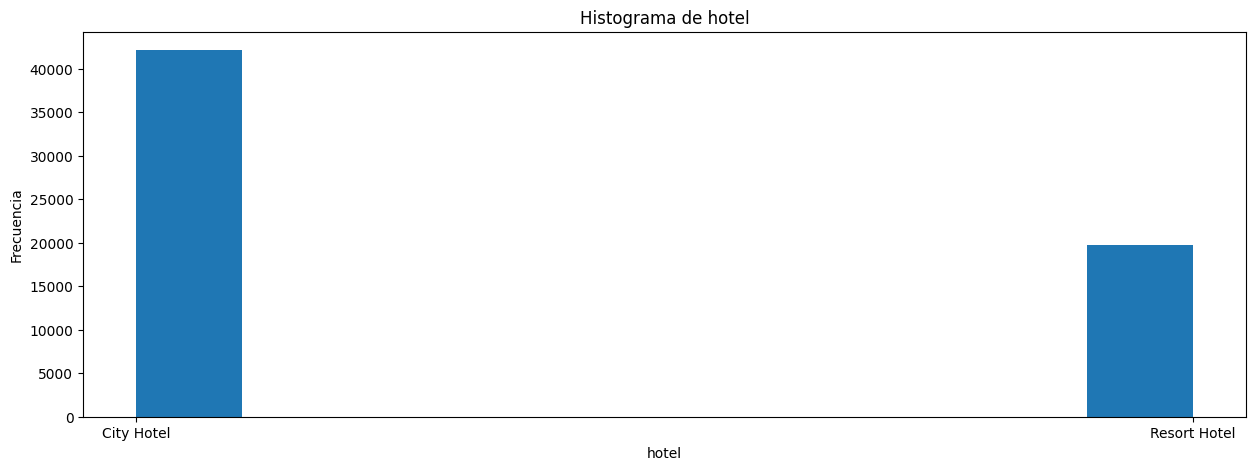

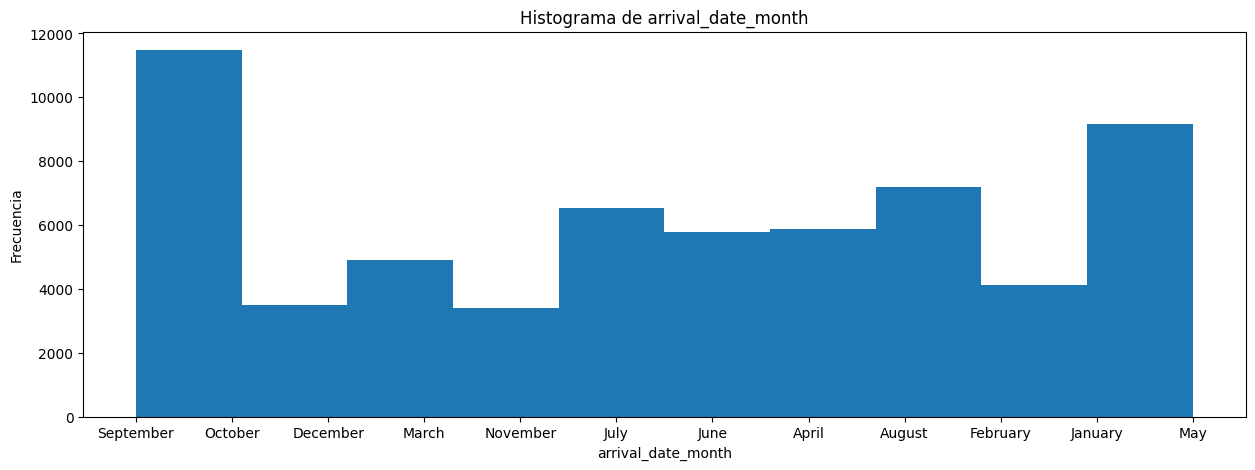

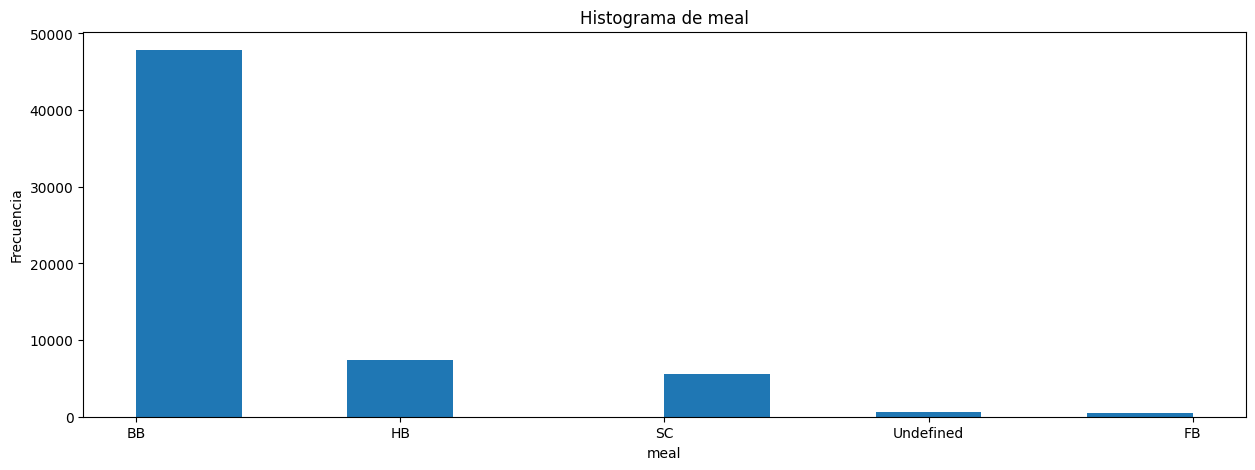

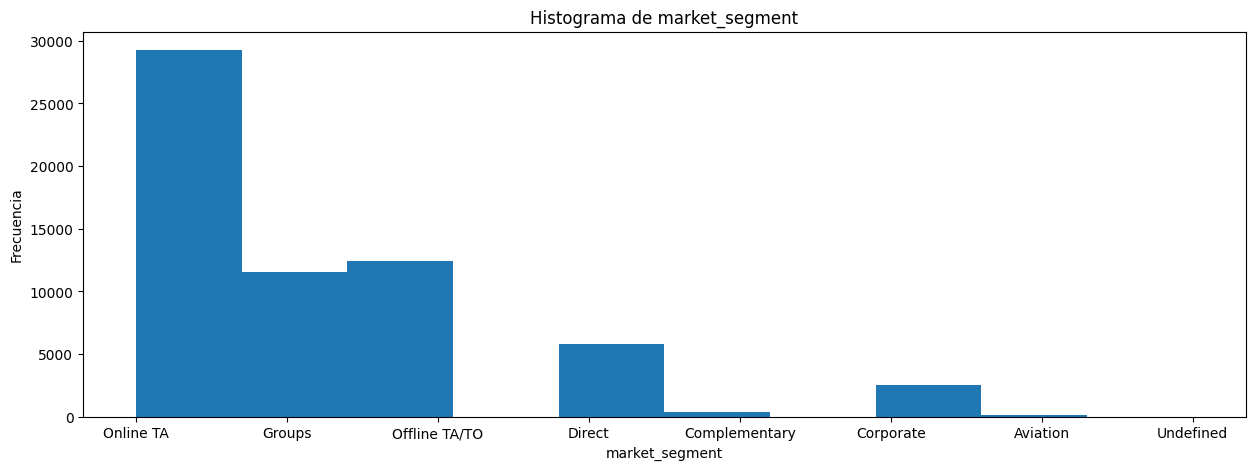

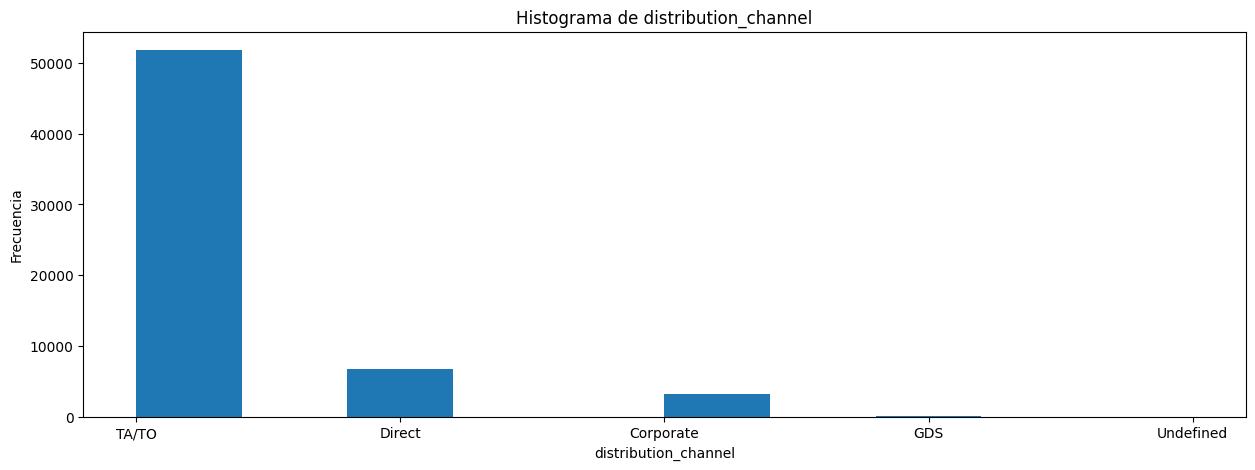

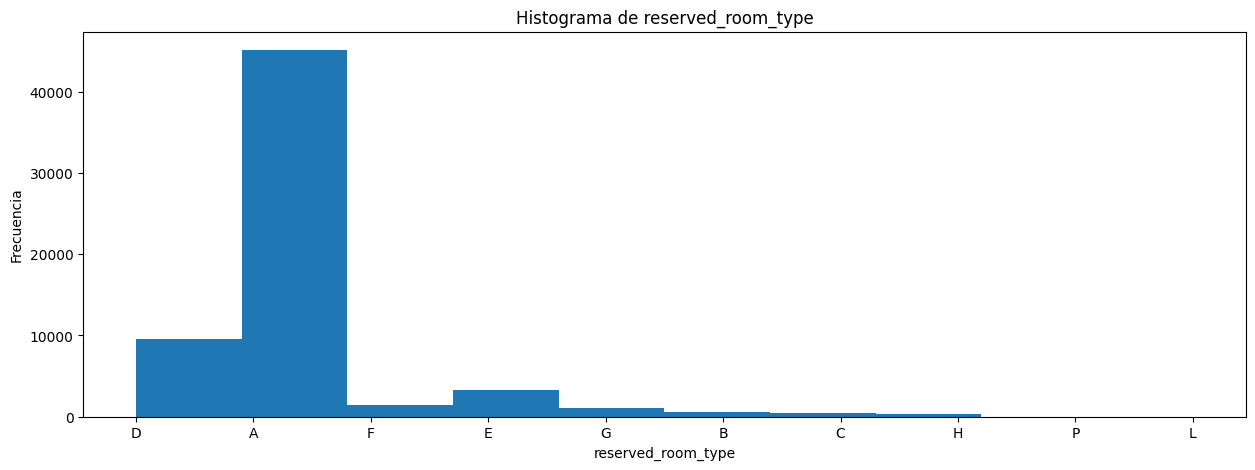

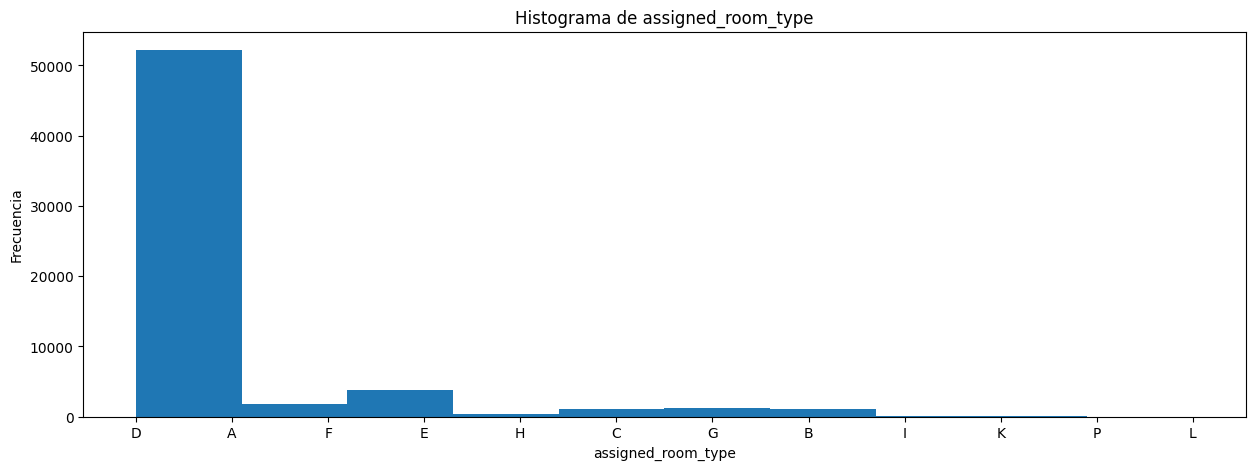

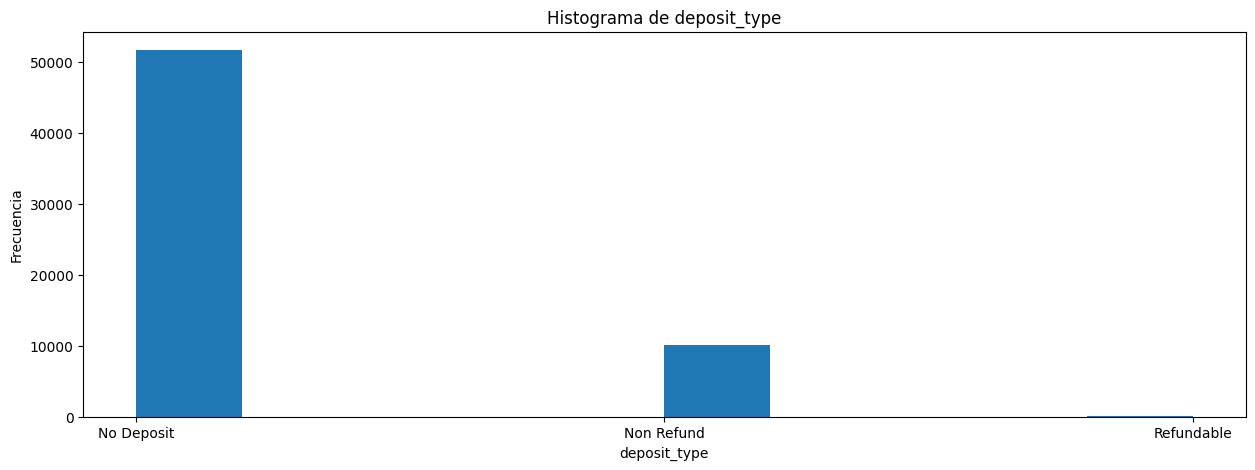

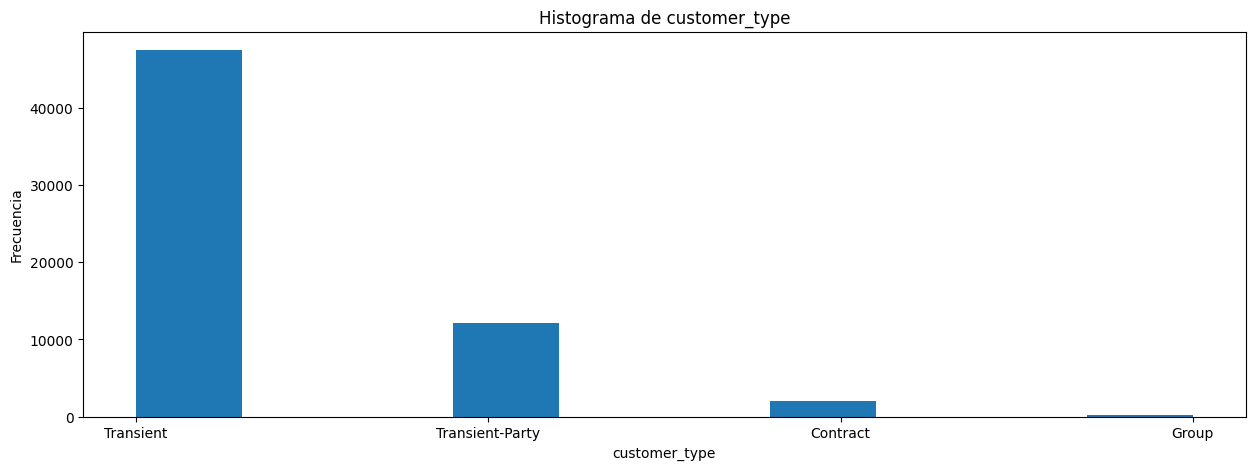

In [76]:
#Hacemos una copia del dataset de cuantitativas para no contaminar la informacion
columns=ds_cualitativas.columns.tolist()
columns.remove('country')#Country no lo imprimimos ya que no es posible diferenciar apropiadamente las variables
for c in columns:
  plot_histogram(ds_cualitativas, c)
  print('\n')

lead_time


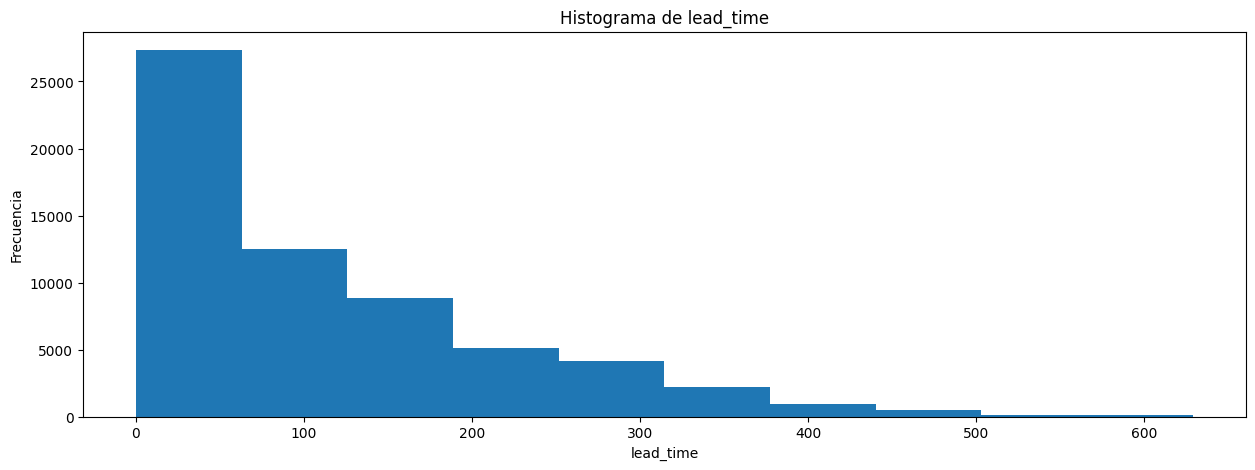

arrival_date_week_number


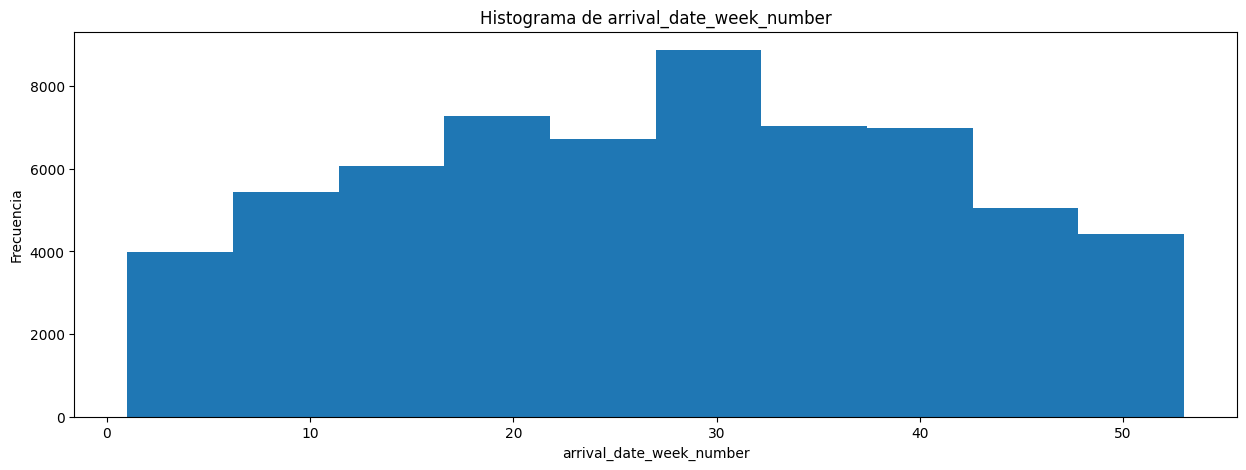

stays_in_weekend_nights


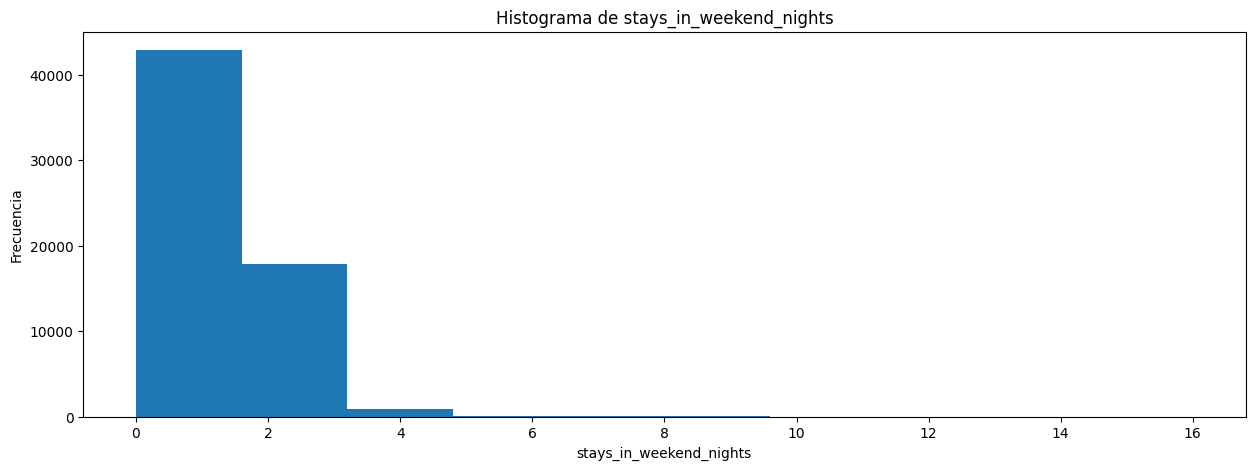

stays_in_week_nights


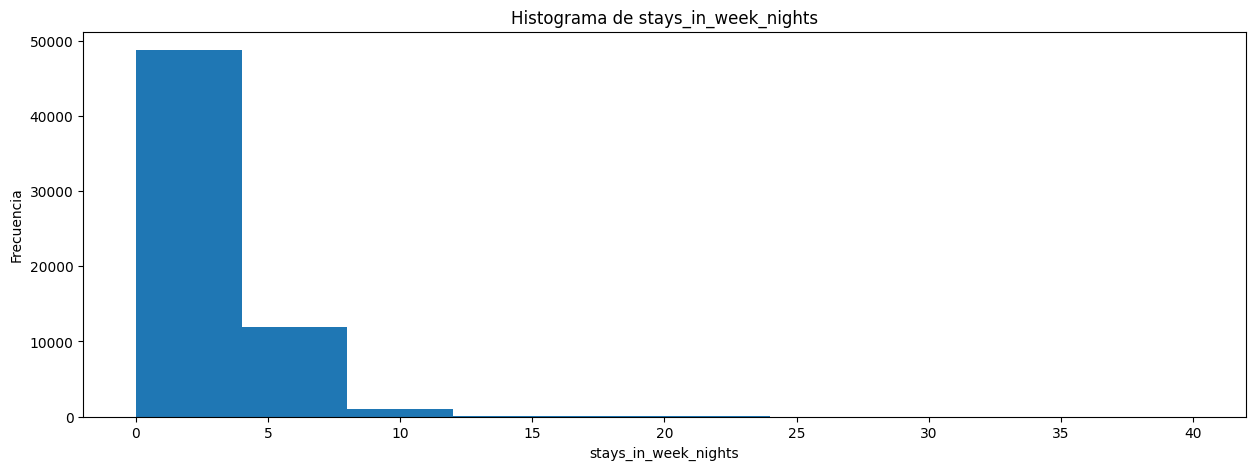

babies


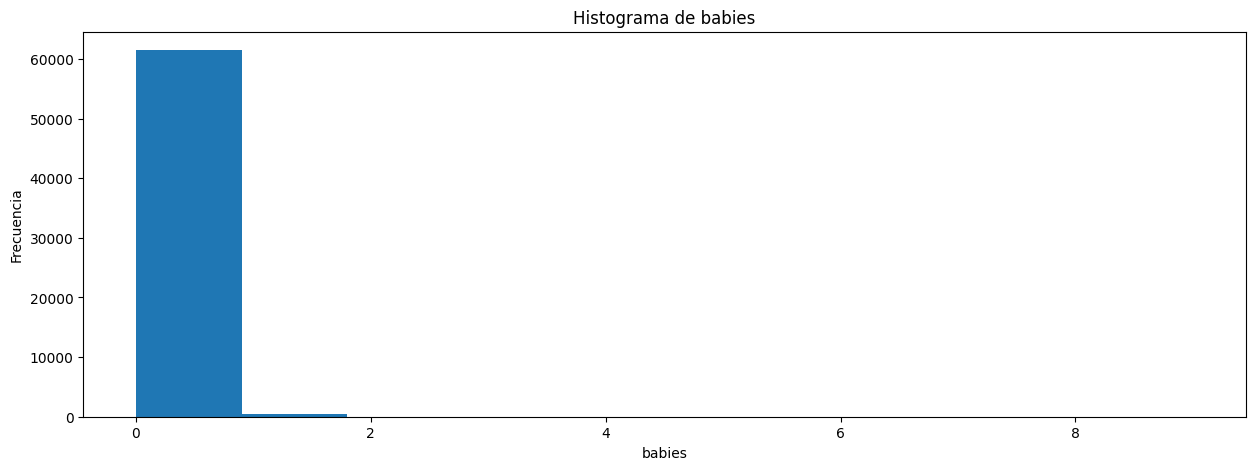

is_repeated_guest


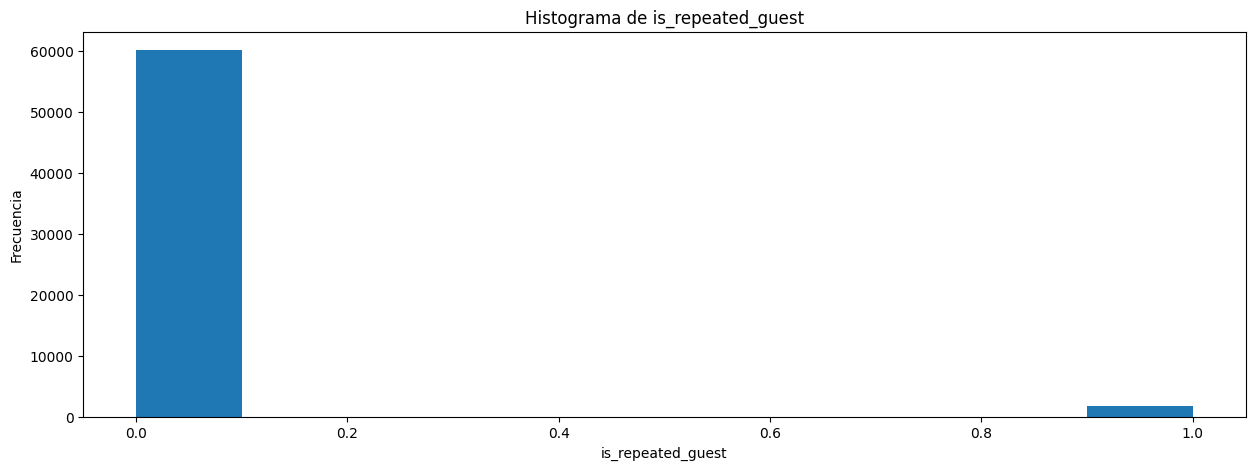

previous_cancellations


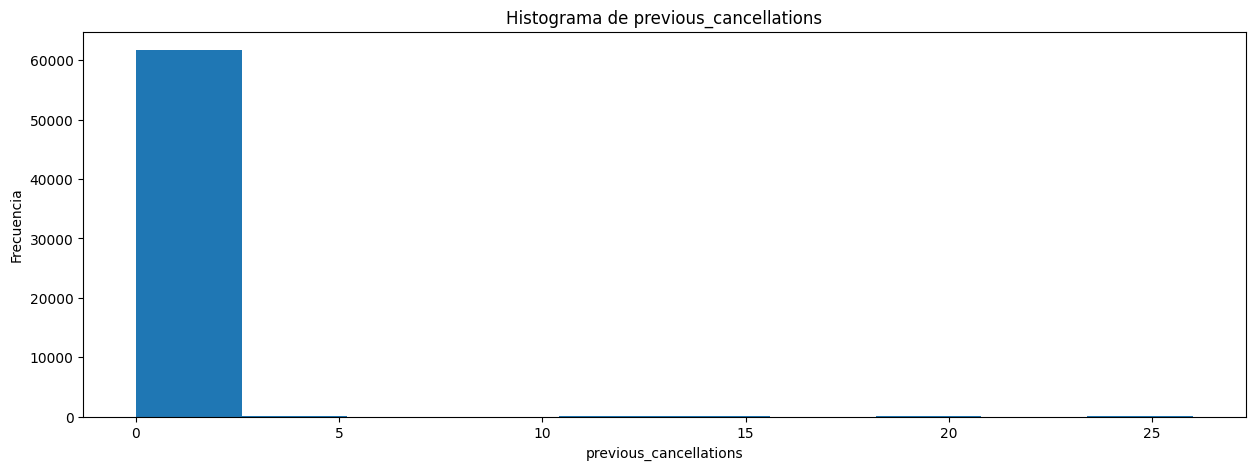

previous_bookings_not_canceled


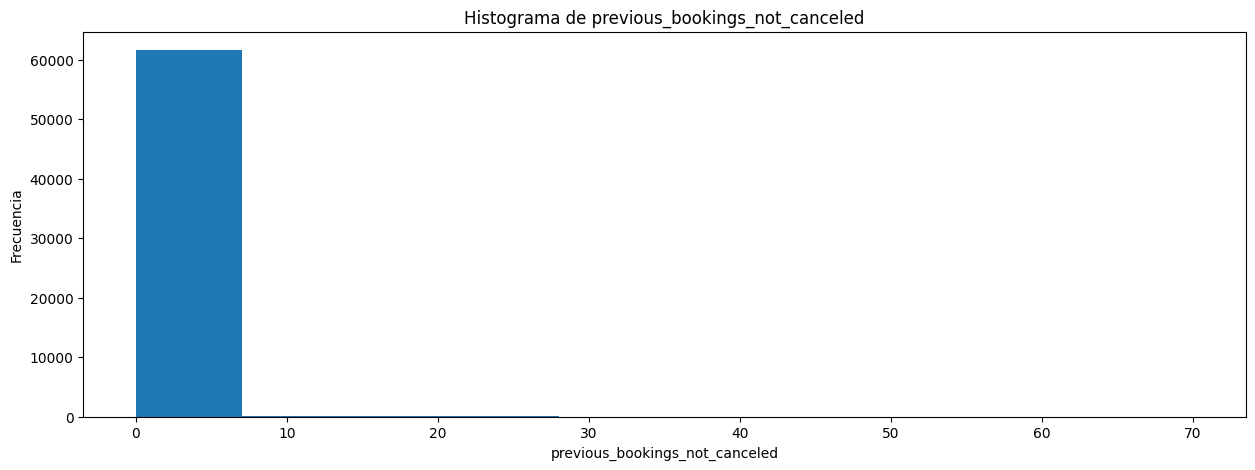

booking_changes


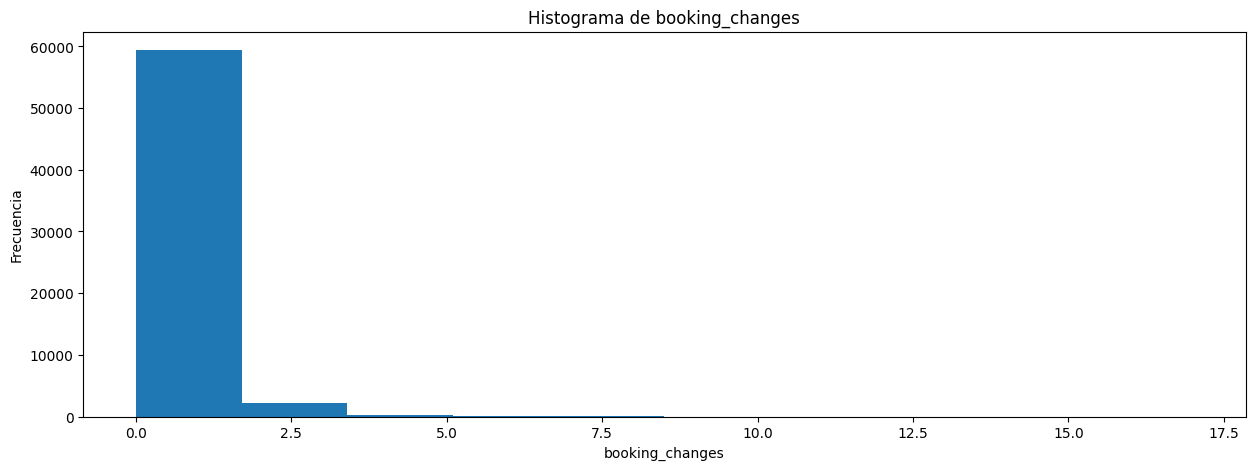

agent


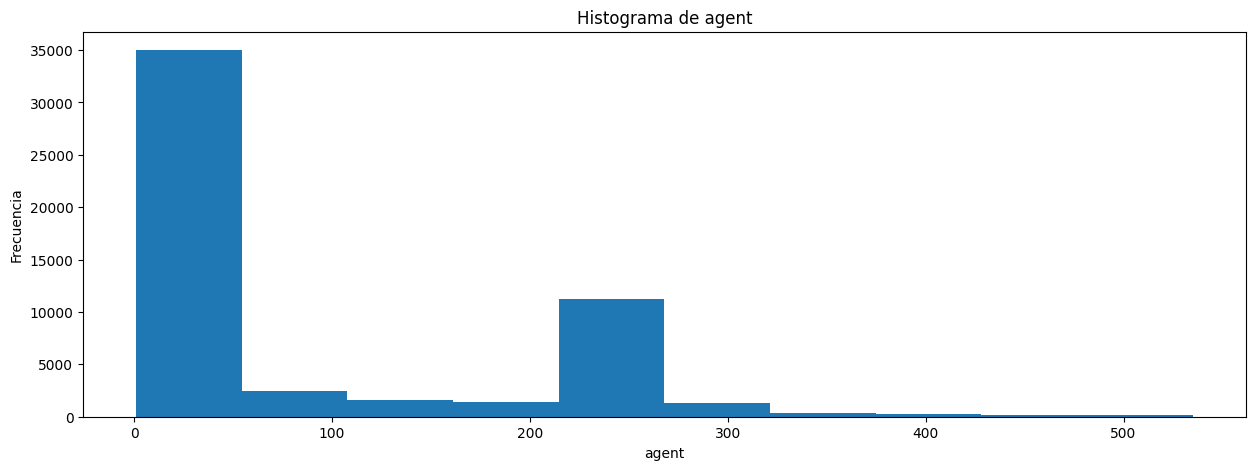

company


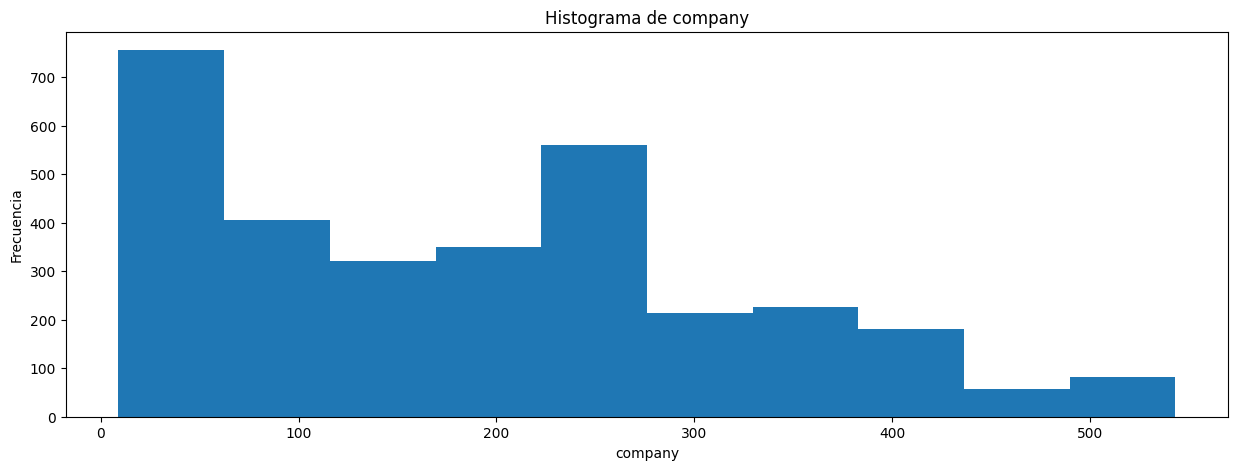

days_in_waiting_list


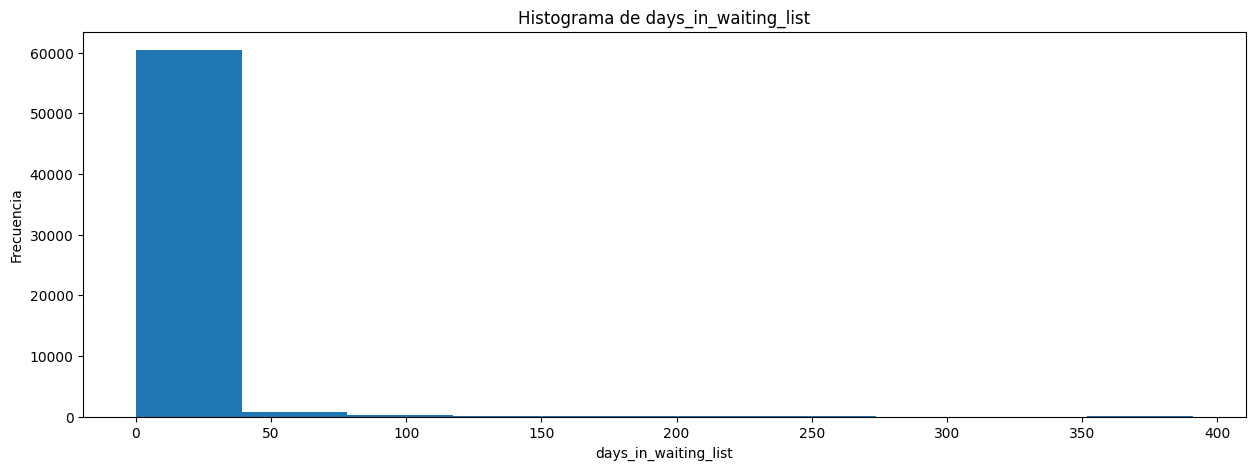

adr


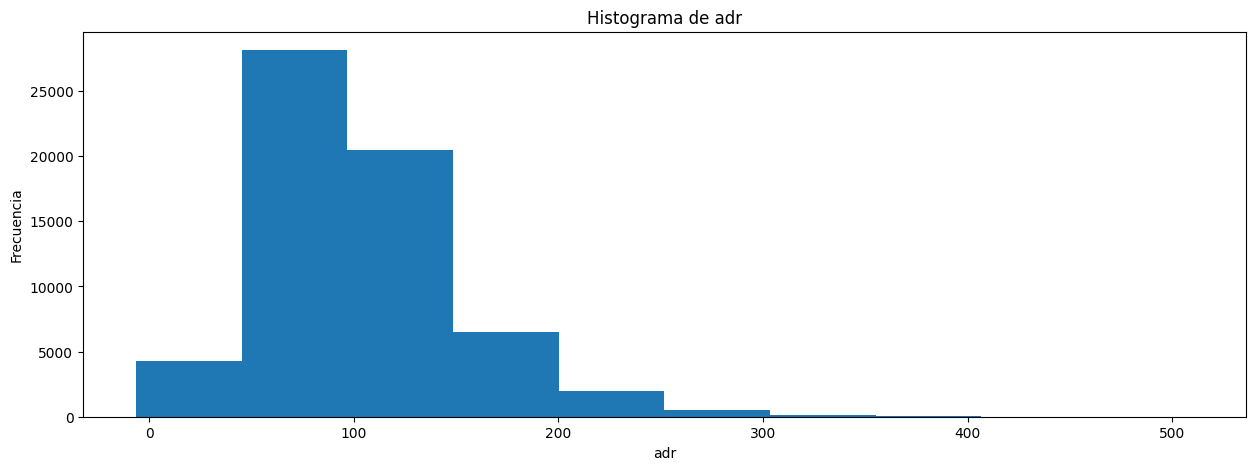

total_of_special_requests


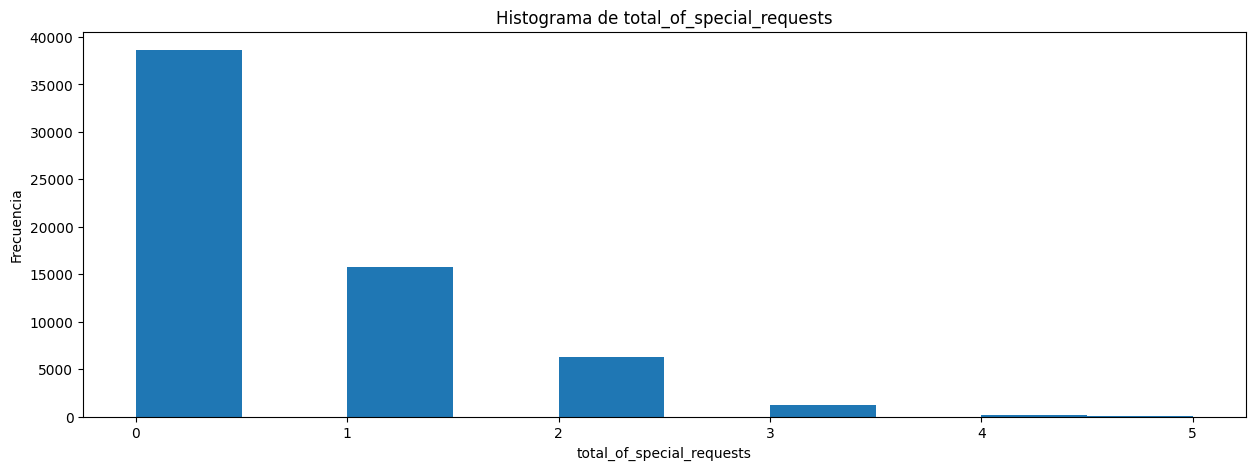

In [77]:
#Guardamos las variables cuantitativas en una lista
columns=ds_cuantitativas.columns.tolist()
# las siguientes columnas se grafican más abajo
columns.remove('is_canceled')
columns.remove('arrival_date_year')
columns.remove('required_car_parking_spaces')
columns.remove('adults')
columns.remove('children')
columns.remove('arrival_date_day_of_month')
for c in columns:
  print(c)
  plot_histogram(ds_cuantitativas, c)

Para los siguientes graficos se utilizaron barplots ya que al tener pocas variaciones un histograma no era prolijo




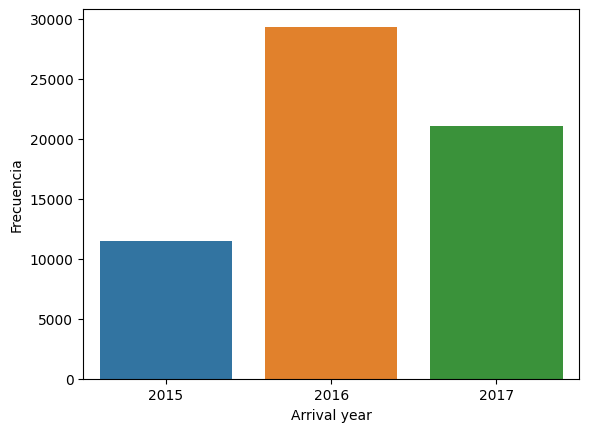

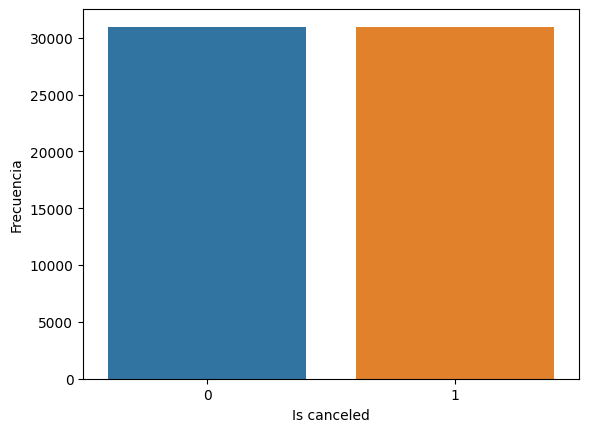

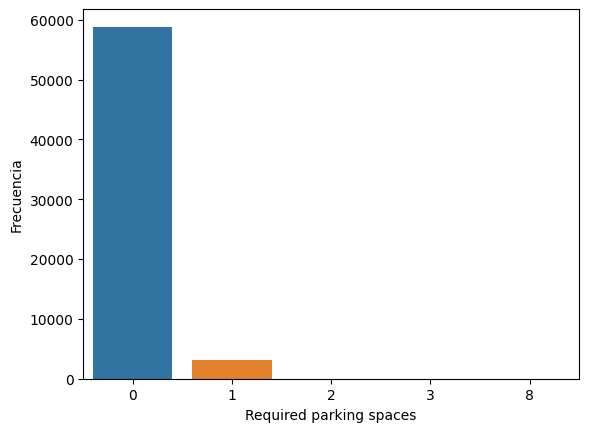

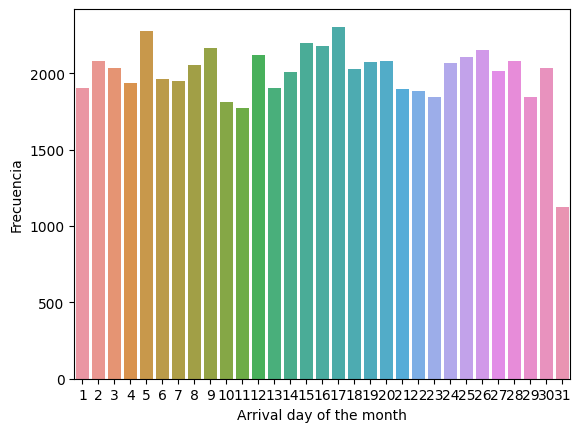

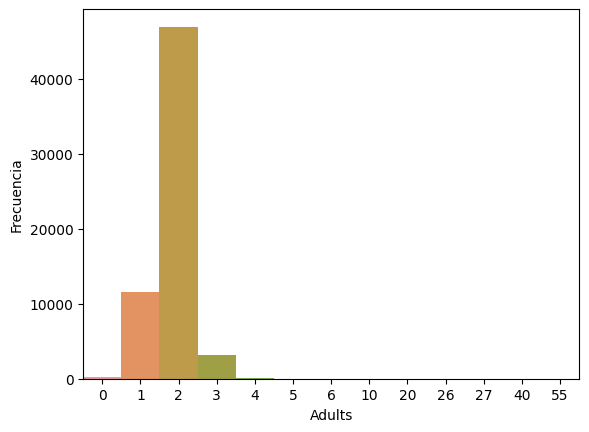

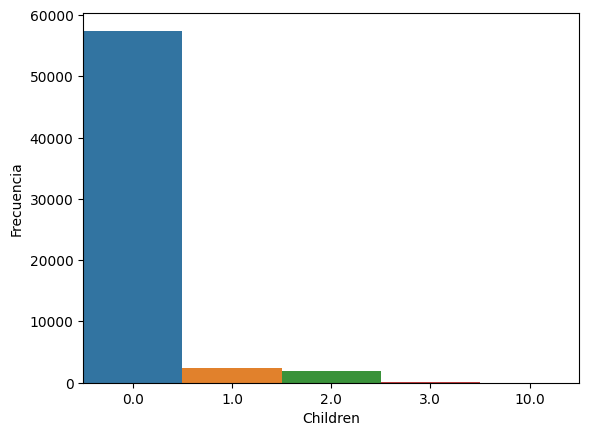

In [78]:
sns.countplot(x='arrival_date_year', data=ds_cuantitativas).set(xlabel='Arrival year', ylabel='Frecuencia')
plt.show()
sns.countplot(x='is_canceled', data=ds_cuantitativas).set(xlabel='Is canceled', ylabel='Frecuencia')
plt.show()
sns.countplot(x='required_car_parking_spaces', data=ds_cuantitativas).set(xlabel='Required parking spaces', ylabel='Frecuencia')
plt.show()
sns.countplot(x='arrival_date_day_of_month', data=ds_cuantitativas).set(xlabel='Arrival day of the month', ylabel='Frecuencia')
plt.show()
sns.countplot(x='adults', data=ds_cuantitativas, width=1).set(xlabel='Adults', ylabel='Frecuencia')
plt.show()
sns.countplot(x='children', data=ds_cuantitativas, width=1).set(xlabel='Children', ylabel='Frecuencia')
plt.show()

## Correlación de variables

### Correlacion de variables cuantitativas

Generamos nuestra matriz de correlación

In [79]:
matrizCorrCuantitativas = ds_cuantitativas.corr()
matrizCorrCuantitativas


lead_time  arrival_date_year  \
lead_time                        1.000000           0.023186   
arrival_date_year                0.023186           1.000000   
arrival_date_week_number         0.134793          -0.540542   
arrival_date_day_of_month       -0.006937           0.002326   
stays_in_weekend_nights          0.059463           0.027066   
stays_in_week_nights             0.140110           0.040803   
adults                           0.110942           0.026576   
children                        -0.046058           0.059412   
babies                          -0.022872          -0.013745   
is_repeated_guest               -0.108033          -0.004587   
previous_cancellations           0.094634          -0.142232   
previous_bookings_not_canceled  -0.068102           0.027109   
booking_changes                 -0.019736           0.027285   
agent                           -0.078786           0.081634   
company                          0.150773           0.243066   
days_in_waiting_list             0.166423          -0.058523   
adr                             -0.094559           0.217409   
required_car_parking_spaces     -0.113772          -0.011620   
total_of_special_requests       -0.122760           0.107899   
is_canceled                      0.293816           0.019923   

                                arrival_date_week_number  \
lead_time                                       0.134793   
arrival_date_year                              -0.540542   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.057730   
stays_in_weekend_nights                         0.014127   
stays_in_week_nights                            0.012200   
adults                                          0.025886   
children                                        0.006355   
babies                                          0.016215   
is_repeated_guest                              -0.022037   
previous_cancellations                          0.045530   
previous_bookings_not_canceled                 -0.023897   
booking_changes                                 0.012086   
agent                                          -0.043968   
company                                        -0.040886   
days_in_waiting_list                            0.019328   
adr                                             0.075427   
required_car_parking_spaces                     0.001424   
total_of_special_requests                       0.029283   
is_canceled                                     0.008357   

                                arrival_date_day_of_month  \
lead_time                                       -0.006937   
arrival_date_year                                0.002326   
arrival_date_week_number                         0.057730   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.015518   
stays_in_week_nights                            -0.026449   
adults                                           0.002449   
children                                         0.013991   
babies                                           0.002568   
is_repeated_guest                               -0.005230   
previous_cancellations                          -0.034516   
previous_bookings_not_canceled                  -0.002026   
booking_changes                                  0.009522   
agent                                            0.002600   
company                                          0.049011   
days_in_waiting_list                             0.027754   
adr                                              0.033695   
required_car_parking_spaces                      0.000295   
total_of_special_requests                        0.007744   
is_canceled                                     -0.007371   

                                stays_in_weekend_nights  stays_in_week_nights  \
lead_time                                      0.059463        

Graficamos la matriz como heatmap

In [80]:
def plot_heatmap_cuantitativas(matrixCorr):
  # Crea una figura de Matplotlib más grande
  fig, ax = plt.subplots(figsize=(20,10))
  # Crea tu heatmap con Seaborn
  sns.heatmap(matrixCorr, ax=ax, annot=True)

  plt.title('Matriz de correlacion')

  # Muestra la figura
  plt.show()

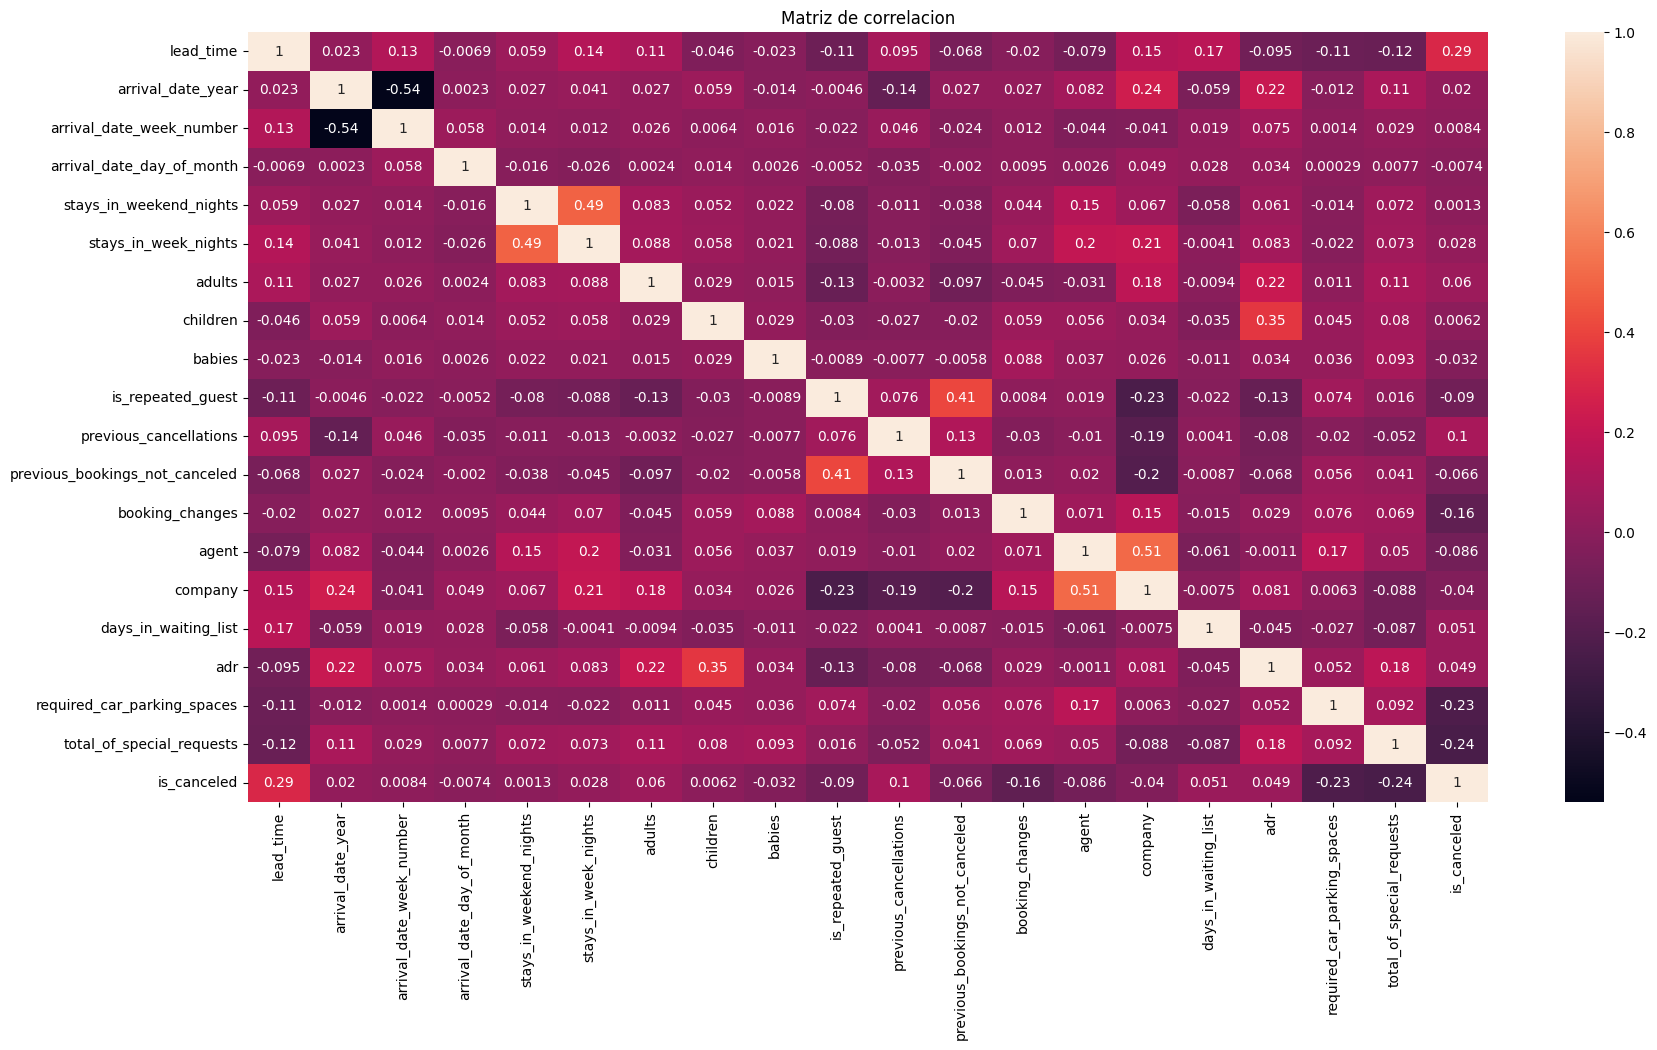

In [81]:
plot_heatmap_cuantitativas(matrizCorrCuantitativas)

Correlación entre el target y las variables cuantitativas

Acá las que más nos interesan son las que tienen mayor módulo,
es decir, las que están cercanas al cero son las que menos correlación tienen.

In [82]:
corrWithTarget = matrizCorrCuantitativas.drop(columns=['is_canceled']).tail(1).transpose().reset_index()
corrWithTarget.rename(columns={'index':'var_name', 'is_canceled':'corrFactor'}, inplace=True)
corrWithTarget.sort_values(by='corrFactor', ascending=False)

var_name  corrFactor
0                        lead_time    0.293816
10          previous_cancellations    0.099613
6                           adults    0.060179
15            days_in_waiting_list    0.050827
16                             adr    0.049206
5             stays_in_week_nights    0.028439
1                arrival_date_year    0.019923
2         arrival_date_week_number    0.008357
7                         children    0.006242
4          stays_in_weekend_nights    0.001279
3        arrival_date_day_of_month   -0.007371
8                           babies   -0.032034
14                         company   -0.040010
11  previous_bookings_not_canceled   -0.065868
13                           agent   -0.086176
9                is_repeated_guest   -0.090492
12                 booking_changes   -0.159315
17     required_car_parking_spaces   -0.225915
18       total_of_special_requests   -0.244997

### Correlación de variables cualitativas


####V de Cramer

Para realizar el analisis de corrrelacion para variables cualitativas utilizaremos la v de Cramer. Para esto calcularemos la v de cramer para cada una de las variables comparada con el resto, de ahi formaremos una matriz.
La V de cramer mide de 0 a 1 donde entre:
- 0 y 0,2 no hay correlacion
- 0,2 indica una asociacion debil
- 0,2 y 0,6 una asociacion moderada
- 0,6 y 1 una asociacion fuerte

In [83]:
def calcular_v_cramer(ds, var1, var2):
  crosstab, res=researchpy.crosstab(ds[var1], ds[var2], test='chi-square') #Nos devuelve un dataframe con el valor de la prueba de chi cuadrado de Pearson, el valor p y la v de Cramer
  return res.iloc[2]['results']

#### Generamos nuestra matriz de correlación

In [84]:
ds_aux = ds_cualitativas.copy()
ds_aux['is_canceled'] = dataset['is_canceled']
matriz_aux=[]
for x in ds_aux:
  vector_aux=[]
  for y in ds_aux:
    v=calcular_v_cramer(ds_aux, x, y)
    vector_aux.append(v)
  matriz_aux.append(vector_aux)
matriz_corr_cualitativas=pd.DataFrame(matriz_aux, index=[i for i in ds_aux.columns.tolist()], columns=[i for i in ds_aux.columns.tolist()])
matriz_corr_cualitativas

hotel  arrival_date_month    meal  country  \
hotel                 1.0000              0.0693  0.3249   0.2858   
arrival_date_month    0.0693              1.0000  0.0940   0.0951   
meal                  0.3249              0.0940  1.0000   0.1480   
country               0.2858              0.0951  0.1480   1.0000   
market_segment        0.1479              0.0903  0.1919   0.2002   
distribution_channel  0.1877              0.0670  0.0728   0.0988   
reserved_room_type    0.3363              0.0481  0.1036   0.0974   
assigned_room_type    0.3952              0.0301  0.1118   0.0845   
deposit_type          0.1952              0.1116  0.1077   0.3466   
customer_type         0.0366              0.1026  0.1376   0.1180   
is_canceled           0.1426              0.0716  0.0513   0.3699   

                      market_segment  distribution_channel  \
hotel                         0.1479                0.1877   
arrival_date_month            0.0903                0.0670   
meal                          0.1919                0.0728   
country                       0.2002                0.0988   
market_segment                1.0000                0.7050   
distribution_channel          0.7050                1.0000   
reserved_room_type            0.1451                0.1024   
assigned_room_type            0.1319                0.0997   
deposit_type                  0.4110                0.0958   
customer_type                 0.2555                0.0788   
is_canceled                   0.2750                0.1946   

                      reserved_room_type  assigned_room_type  deposit_type  \
hotel                             0.3363              0.3952        0.1952   
arrival_date_month                0.0481              0.0301        0.1116   
meal                              0.1036              0.1118        0.1077   
country                           0.0974              0.0845        0.3466   
market_segment                    0.1451              0.1319        0.4110   
distribution_channel              0.1024              0.0997        0.0958   
reserved_room_type                1.0000              0.8515        0.1760   
assigned_room_type                0.8515              1.0000        0.2144   
deposit_type                      0.1760              0.2144        1.0000   
customer_type                     0.1065              0.0884        0.1048   
is_canceled                       0.0733              0.2112        0.4398   

                      customer_type  is_canceled  
hotel                        0.0366       0.1426  
arrival_date_month           0.1026       0.0716  
meal                         0.1376       0.0513  
country                      0.1180       0.3699  
market_segment               0.2555       0.2750  
distribution_channel         0.0788       0.1946  
reserved_room_type           0.1065       0.0733  
assigned_room_type           0.0884       0.2112  
deposit_type                 0.1048       0.4398  
customer_type                1.0000       0.1470  
is_canceled                  0.1470       1.0000

#### Graficamos la matriz como heatmap

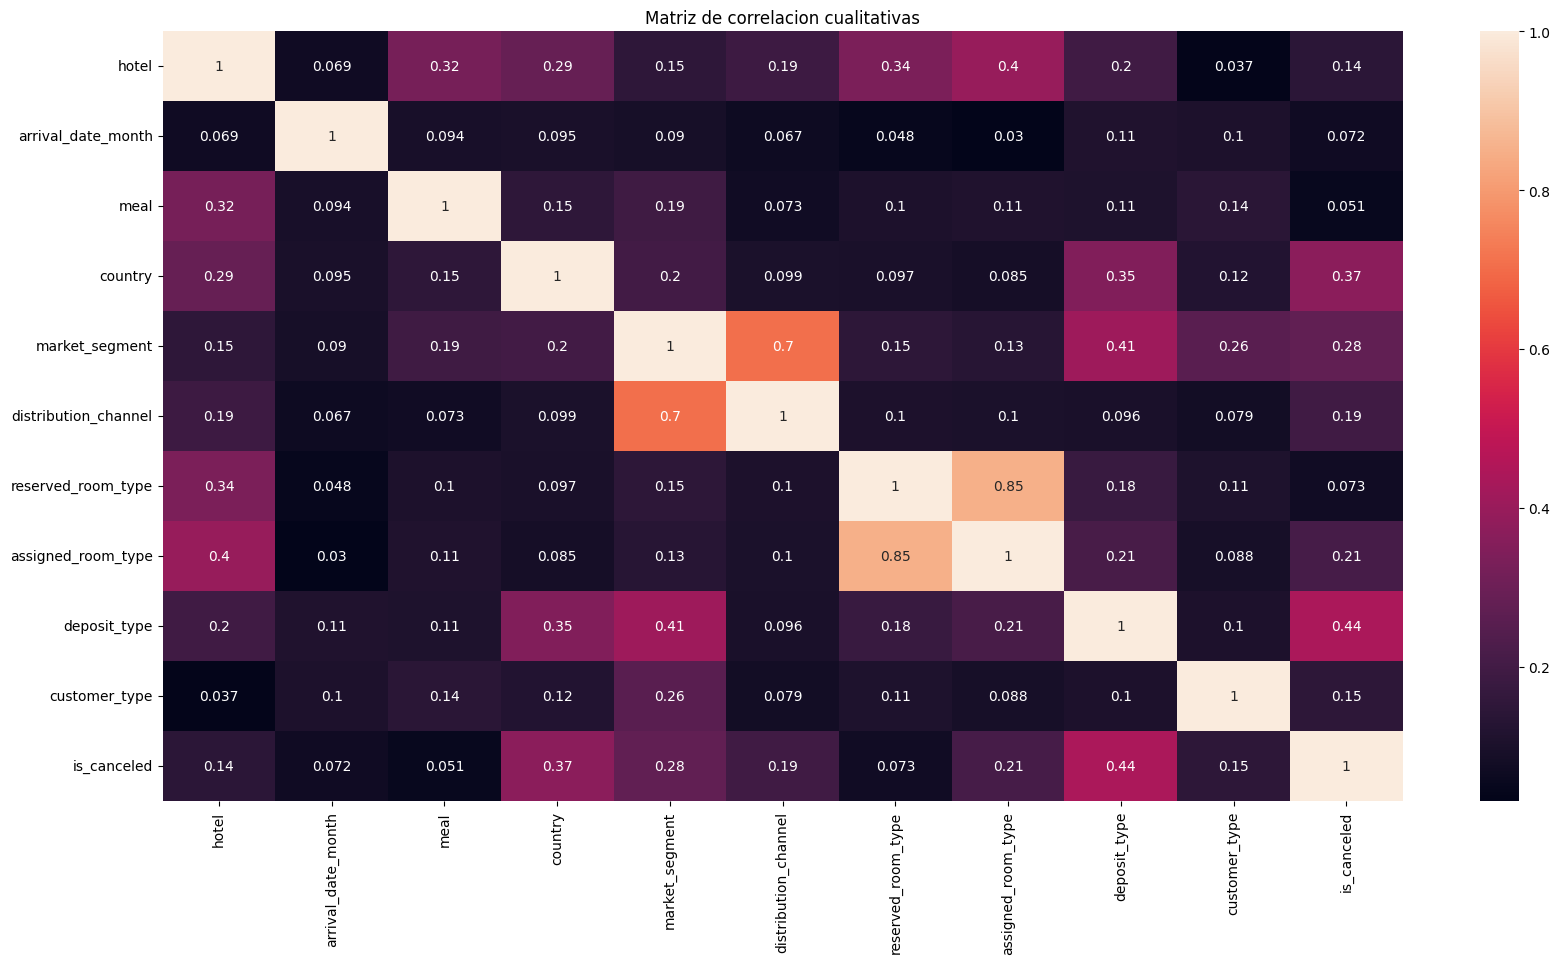

In [85]:
# Crea una figura de Matplotlib más grande
fig, ax = plt.subplots(figsize=(20,10))

# Crea tu heatmap con Seaborn
sns.heatmap(matriz_corr_cualitativas, ax=ax, annot=True)

plt.title('Matriz de correlacion cualitativas')
# Muestra la figura
plt.show()

#### Correlación entre el target y las variables cualitativas

Acá las que más nos interesan son las que tienen mayor módulo,
es decir, las que están cercanas al cero son las que menos correlación tienen.

In [86]:
corrWithTarget = matriz_corr_cualitativas.drop(columns=['is_canceled']).tail(1).transpose().reset_index()
corrWithTarget.rename(columns={'index':'var_name', 'is_canceled':'corrFactor'}, inplace=True)
corrWithTarget.sort_values(by='corrFactor', ascending=False)

var_name  corrFactor
8          deposit_type      0.4398
3               country      0.3699
4        market_segment      0.2750
7    assigned_room_type      0.2112
5  distribution_channel      0.1946
9         customer_type      0.1470
0                 hotel      0.1426
6    reserved_room_type      0.0733
1    arrival_date_month      0.0716
2                  meal      0.0513

##Datos faltantes

Nulos de cada variable

In [87]:
dataset.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


El calculo de datos faltantes por columna ya fue hecho en la seccion de analisis de variables. De ahi podiamos ver que solo hay 4 columnas que tienen datos faltantes 'children', 'agent', 'country' y 'company'. Mediante pie charts vemos el porentaje de datos faltantes.

>

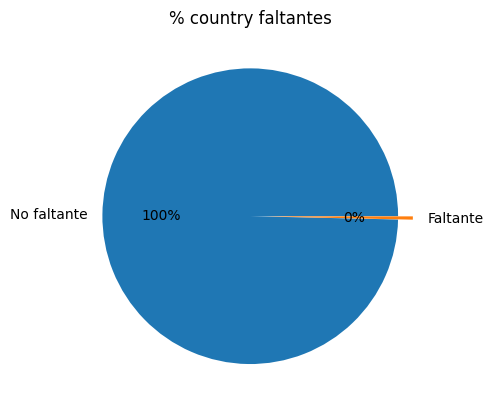

False    61692
True       221
Name: country, dtype: int64

In [88]:
index = ['No faltante', 'Faltante']
explode = [0, 0.1]

#Graficamos el pie chart de country
faltante = dataset['country'].isnull().value_counts()
plt.pie(faltante, labels=index, explode=explode, autopct='%.0f%%')
plt.title("% country faltantes")
plt.show()
faltante

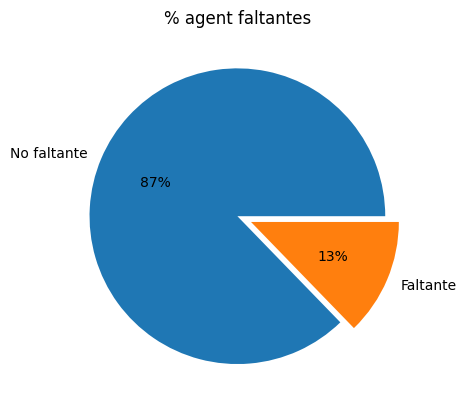

False    54023
True      7890
Name: agent, dtype: int64

In [89]:
#Graficamos el pie chart de agent
faltante = dataset['agent'].isnull().value_counts()
plt.pie(faltante, labels=index, explode=explode, autopct='%.0f%%')
plt.title("% agent faltantes")
plt.show()
faltante

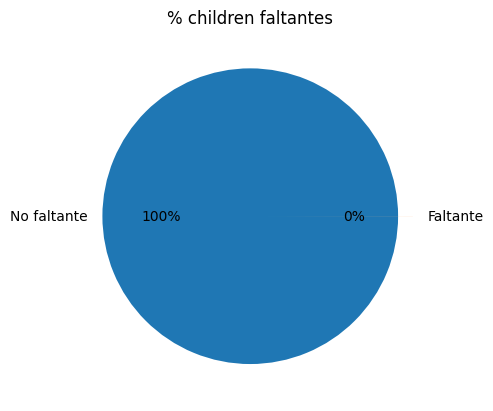

False    61909
True         4
Name: children, dtype: int64

In [90]:
#Graficamos el pie chart de children
faltante = dataset['children'].isnull().value_counts()
plt.pie(faltante, labels=index, explode=explode, autopct='%.0f%%')
plt.title("% children faltantes")
plt.show()
faltante

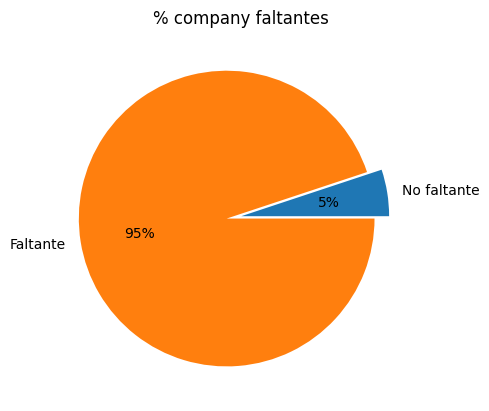

False     3152
True     58761
Name: company, dtype: int64

In [91]:
#Graficamos el pie chart de company
faltante = dataset['company'].isnull().value_counts().sort_values()
plt.pie(faltante, labels=index, explode=explode, autopct='%.0f%%')
plt.title("% company faltantes")
plt.show()
faltante

##Modificacion e imputacion de datos

In [92]:
ds_cuantitativas_filtrado=ds_cuantitativas.copy()
ds_cualitativas_filtrado=ds_cualitativas.copy()

In [93]:
print(ds_cuantitativas_filtrado.shape)
print(ds_cuantitativas_final.shape)

(61913, 20)
(61913, 21)


Imputacion por media

Considerando que solo hay 4 filas NaN, decidimos utilizar la media, ya que, aunque comprendemos que no es la mejor forma de imputacion, no va a afectar de gran manera la prediccion que se debe realizar  

In [94]:
media=round(ds_cuantitativas_filtrado['children'].mean())

ds_cuantitativas_filtrado.children.fillna(media, inplace=True)

ds_cuantitativas_final.children.fillna(media, inplace=True)

In [95]:
ds_cualitativas_filtrado.country.fillna('unknown', inplace=True)

ds_cualitativas_final.country.fillna('unknown', inplace=True)

###Market segment y Distribution channel
Imputacion por hotdeck

In [96]:
#observamos los valores Undefined de 'distribution_channel' y 'market_segment'
ds_cualitativas[(ds_cualitativas['distribution_channel']=='Undefined') | (ds_cualitativas['market_segment']=='Undefined')].head()

hotel arrival_date_month meal country market_segment  \
27359  City Hotel             August   BB     PRT      Undefined   
32654  City Hotel             August   BB     PRT         Direct   
50323  City Hotel             August   BB     PRT      Online TA   
58511  City Hotel             August   BB     PRT      Undefined   

      distribution_channel reserved_room_type assigned_room_type deposit_type  \
27359            Undefined                  B                  B   No Deposit   
32654            Undefined                  B                  B   No Deposit   
50323            Undefined                  B                  B   No Deposit   
58511            Undefined                  B                  B   No Deposit   

         customer_type  
27359  Transient-Party  
32654  Transient-Party  
50323  Transient-Party  
58511  Transient-Party

Utilizaremos el metodo hotdeck con el cual imputaremos la variable 'distribution_channel' en funcion de 'market_segment'. En los casos donde ambos sean 'Undefined' tomamos la decision de eliminarlos, ya que no hay otra variable la cual este lo suficientemente relacionada para hacer una imputacion.

In [97]:
#Eliminamos las filas con ambos valores Undefined
indice=ds_cualitativas_filtrado[(ds_cualitativas_filtrado['distribution_channel']=='Undefined') & (ds_cualitativas_filtrado['market_segment']=='Undefined')].index
ds_cualitativas_filtrado.drop(indice, axis='index', inplace=True)
ds_cualitativas_final.drop(indice, axis='index', inplace=True)

In [98]:
print(ds_cuantitativas_filtrado.shape)
print(ds_cuantitativas_final.shape)

(61913, 20)
(61913, 21)


In [99]:
#Vemos los valores comunes con market_segment = Direct
ds_cualitativas[ds_cualitativas['market_segment']=='Direct']['distribution_channel'].value_counts()

Direct       5607
TA/TO         107
Corporate      42
Undefined       1
Name: distribution_channel, dtype: int64

In [100]:
#Cambiamos los valores de distribution channel
indice=ds_cualitativas_filtrado[(ds_cualitativas_filtrado['market_segment']=='Direct') &( ds_cualitativas_filtrado['distribution_channel']=='Undefined')]['distribution_channel'].index
indice
for i in indice:
  ds_cualitativas_filtrado.at[i, 'distribution_channel']='Direct'
  ds_cualitativas_final.at[i, 'distribution_channel']='Direct'

In [101]:
#Vemos los valores comunes con market_segment = Direct
ds_cualitativas[ds_cualitativas['market_segment']=='Online TA']['distribution_channel'].value_counts()

TA/TO        29125
GDS             64
Direct          61
Corporate       18
Undefined        1
Name: distribution_channel, dtype: int64

In [102]:
#Cambiamos los valores de distribution channel
indice=ds_cualitativas_filtrado[(ds_cualitativas_filtrado['market_segment']=='TA/TO') &( ds_cualitativas_filtrado['distribution_channel']=='Undefined')]['distribution_channel'].index
for i in indice:
  ds_cualitativas_filtrado.at[i, 'distribution_channel']='TA/TO'
  ds_cualitativas_final.at[i, 'distribution_channel']='TA/TO'

### Agent

In [103]:
print(ds_cuantitativas_filtrado['agent'].value_counts().sort_index())
print(ds_cuantitativas_filtrado['agent'].isnull().value_counts())

1.0      4424
2.0        67
3.0       739
4.0        31
5.0       179
         ... 
509.0       7
526.0       1
527.0      12
531.0      34
535.0       1
Name: agent, Length: 296, dtype: int64
False    54023
True      7890
Name: agent, dtype: int64


Como se puede ver el valor cero no está aplicado y siguiendo lo comentado en el paper de que los valores NULL corresponden a observaciones verídicas pero de clientes que no hicieron reserva mediante ningún tipo de intermediario se decide imputar los valores con Cero (0) y representaría a los clientes particulares

In [104]:
ds_cuantitativas_filtrado['agent'] = ds_cuantitativas_filtrado['agent'].fillna(0)
ds_cuantitativas_filtrado['agent'].value_counts().sort_index()
ds_cuantitativas_final['agent'] = ds_cuantitativas_final['agent'].fillna(0)

###Valores 'Undefined'

Comenzamos con la variable 'meal', en este caso el atributo undefined no es incorrecto o esta mal cargado. Se utilizo este valor para aclarar que no se habia encargado un servicio de comida

In [105]:
ds_cualitativas_filtrado.loc[ds_cualitativas_filtrado['meal'] == 'Undefined', 'meal'] = 'No meal'
ds_cualitativas_final.loc[ds_cualitativas_final['meal'] == 'Undefined', 'meal'] = 'No meal'
ds_cuantitativas_filtrado.company.fillna(0, inplace=True)
ds_cuantitativas_final.company.fillna(0, inplace=True)

In [106]:
print(ds_cuantitativas_filtrado.shape)
print(ds_cuantitativas_final.shape)

(61913, 20)
(61913, 21)


##Valores atipicos

Creo una funcion la cual me permita graficar un box plot para todas las variables

In [107]:
def plot_box(df, var):
  plt.boxplot(df[var])
  plt.title(var)

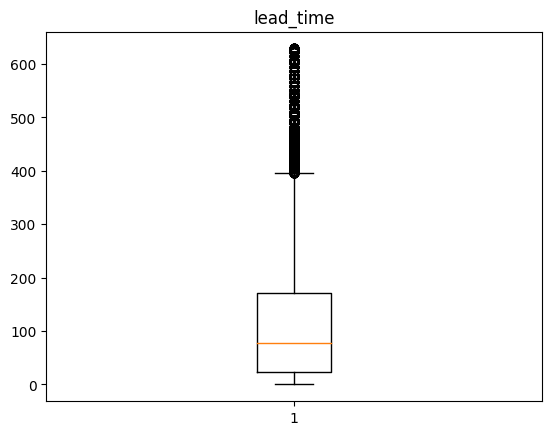

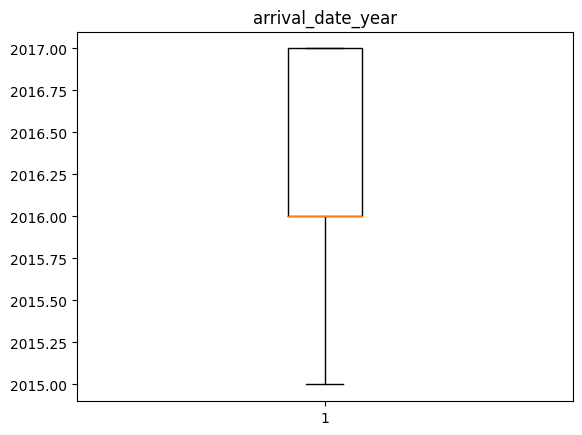

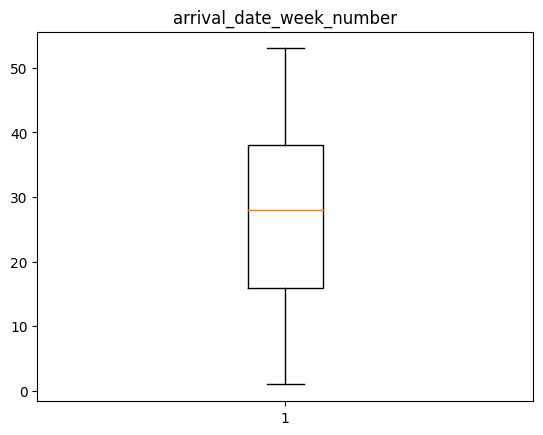

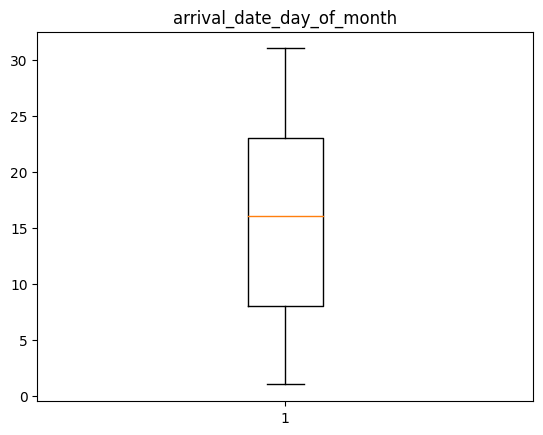

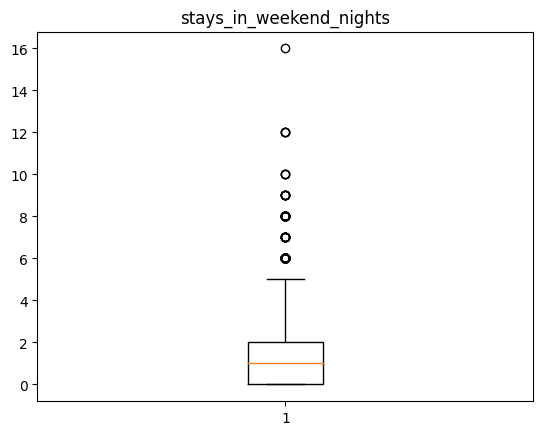

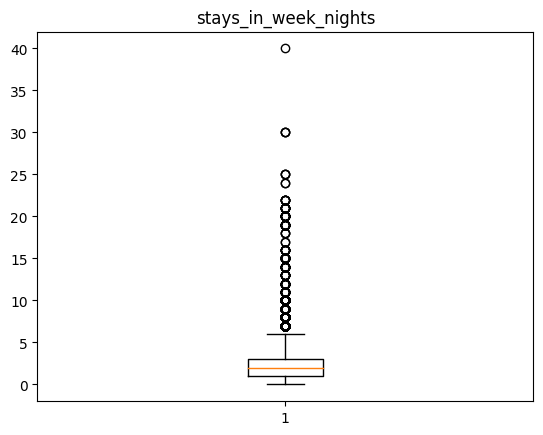

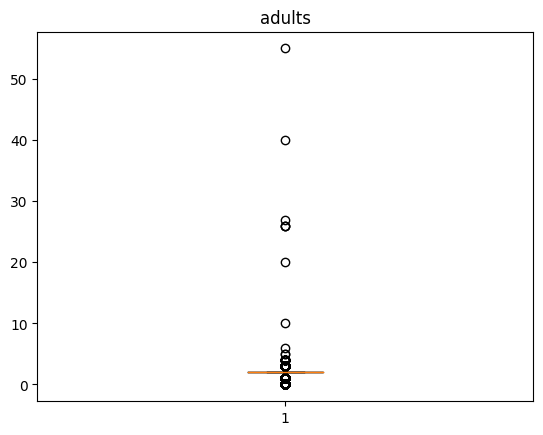

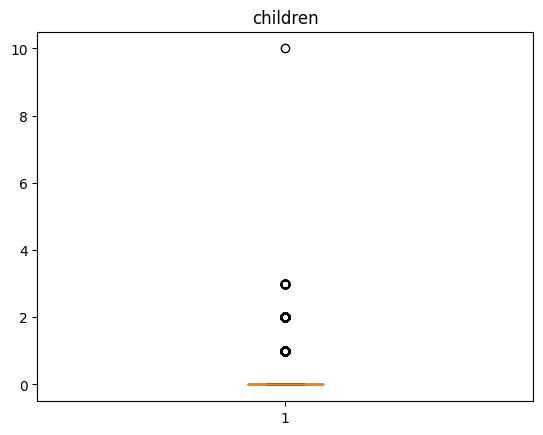

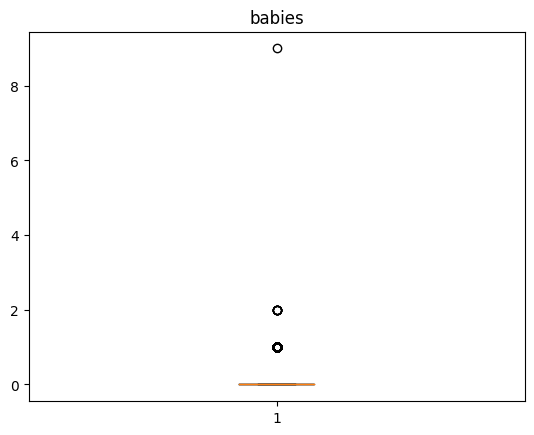

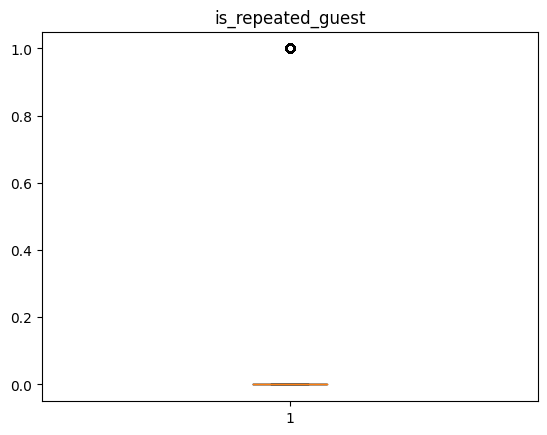

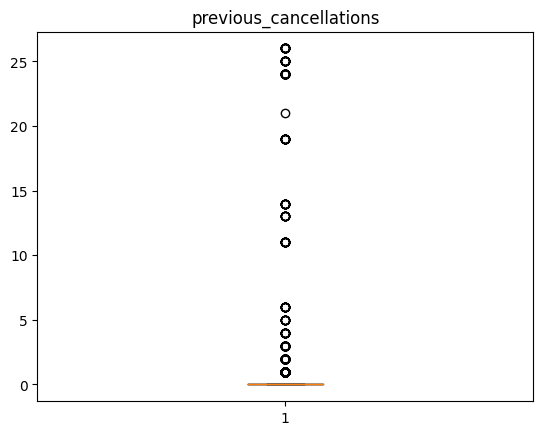

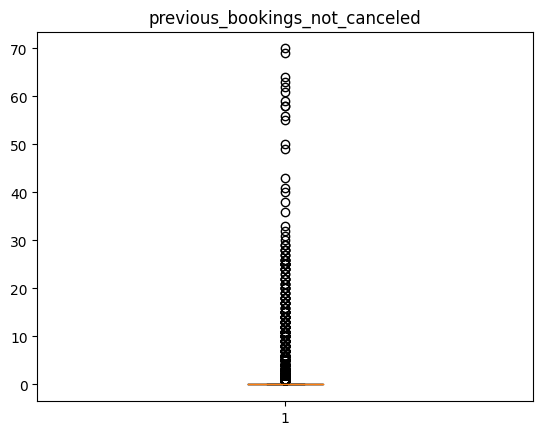

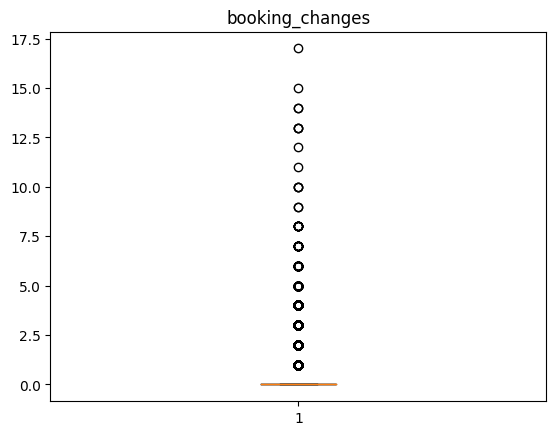

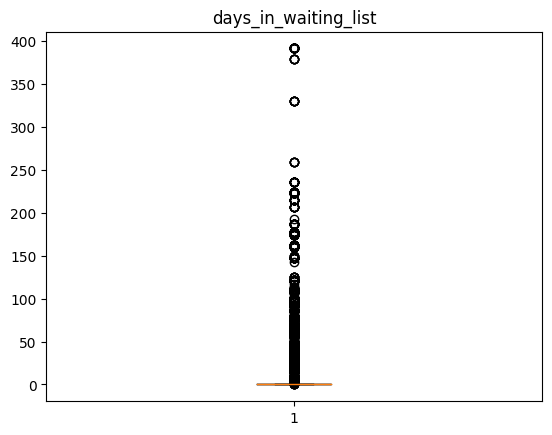

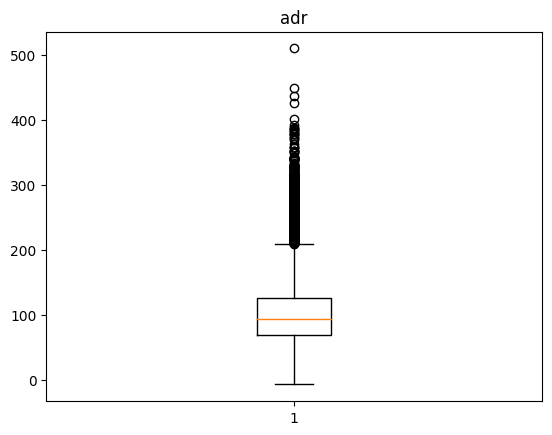

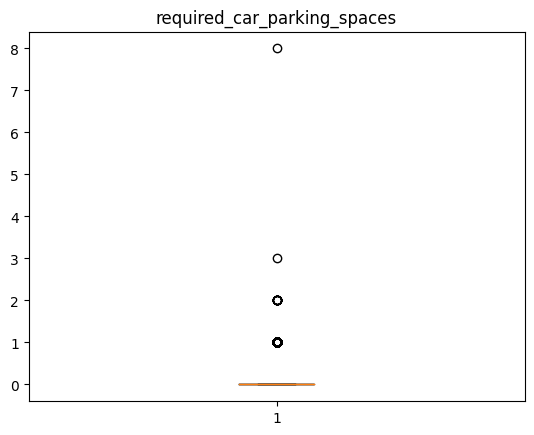

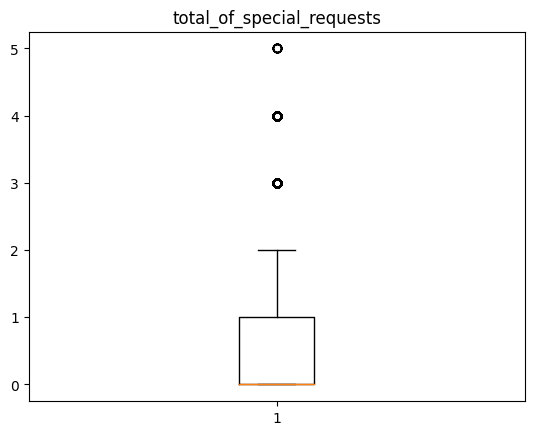

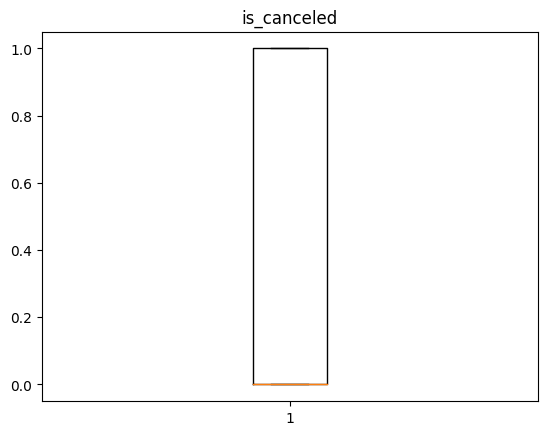

In [108]:
columns = ds_cuantitativas_filtrado.columns.tolist()
columns.remove('agent')
columns.remove('company')
for c in columns:
  plot_box(ds_cuantitativas_filtrado, c)
  plt.show()

####Eliminacion valores atipicos severos

##### Eliminación automática

In [109]:
def get_limites_outliers(df, var):
  #Cuartiles
    Q1_var=np.quantile(ds_cuantitativas_filtrado[var],0.25)
    Q3_var=np.quantile(ds_cuantitativas_filtrado[var],0.75)

    #Rango intercuartil
    IQR_var=Q3_var-Q1_var

    #Limite Outliers Severos
    out_inf=Q1_var-3*IQR_var
    out_sup=Q3_var+3*IQR_var
    return [out_inf, out_sup];

In [110]:
def eliminacion_severos(df, var):
  
    [out_inf, out_sup] = get_limites_outliers(df, var)

    #Eliminación de outlier por ínidce de fila
    indice_outlier_sup=df[df[var]>out_sup].index
    indice_outlier_inf=df[df[var]<out_inf].index
    df.drop(indice_outlier_sup, axis='index', inplace=True)
    df.drop(indice_outlier_inf, axis='index', inplace=True)   


In [111]:
def cant_outliers_severos(df, var):

    [out_inf, out_sup] = get_limites_outliers(df, var)

    #Eliminación de outlier por ínidce de fila
    indice_outlier_sup=df[df[var]>out_sup].index
    indice_outlier_inf=df[df[var]<out_inf].index
    return [len(indice_outlier_sup), len(indice_outlier_inf)]
    


In [112]:
columns = ds_cuantitativas_filtrado.columns.tolist()
columns.remove('agent')

#Imprimimos la cantidad de outliers por cada variable
for c in columns:
  print(f'variable:{c}')
  [cant_out_sup, cant_out_inf] = cant_outliers_severos(ds_cuantitativas_filtrado, c)
  print(f'outliers sup:{cant_out_sup} | inf: {cant_out_inf}')

  # print(f'outliers sup:{cant_out_sup}')
  # print(f'outliers inf: {cant_out_inf}')

variable:lead_time
outliers sup:48 | inf: 0
variable:arrival_date_year
outliers sup:0 | inf: 0
variable:arrival_date_week_number
outliers sup:0 | inf: 0
variable:arrival_date_day_of_month
outliers sup:0 | inf: 0
variable:stays_in_weekend_nights
outliers sup:13 | inf: 0
variable:stays_in_week_nights
outliers sup:728 | inf: 0
variable:adults
outliers sup:3205 | inf: 11746
variable:children
outliers sup:4452 | inf: 0
variable:babies
outliers sup:428 | inf: 0
variable:is_repeated_guest
outliers sup:1733 | inf: 0
variable:previous_cancellations
outliers sup:4394 | inf: 0
variable:previous_bookings_not_canceled
outliers sup:1538 | inf: 0
variable:booking_changes
outliers sup:8317 | inf: 0
variable:company
outliers sup:3152 | inf: 0
variable:days_in_waiting_list
outliers sup:2235 | inf: 0
variable:adr
outliers sup:185 | inf: 0
variable:required_car_parking_spaces
outliers sup:3072 | inf: 0
variable:total_of_special_requests
outliers sup:20 | inf: 0
variable:is_canceled
outliers sup:0 | inf: 0

Colocando un límite a nuestro criterio de **200** outliers máximo a eliminar automáticamente, procedemos a eliminar:

- lead_time
- stays_in_weekend_nights
- adr
- total_of_special_requests

In [113]:
columnasPocosOutliers=['lead_time', 'stays_in_weekend_nights','adr','total_of_special_requests']
print('shape antes de eliminar:')
print(f'Shape ds filtrado{ds_cuantitativas_filtrado.shape}')
print(f'Shape ds filtrado final{ds_cuantitativas_final.shape}')
for c in columnasPocosOutliers:
  eliminacion_severos(ds_cuantitativas_final, c)
  eliminacion_severos(ds_cuantitativas_filtrado, c)

ds_cuantitativas_filtrado.reset_index()
ds_cuantitativas_final.reset_index()
print('shape despues de eliminar:')
print(f'Shape ds filtrado{ds_cuantitativas_filtrado.shape}')
print(f'Shape ds filtrado final{ds_cuantitativas_final.shape}')

shape antes de eliminar:
Shape ds filtrado(61913, 20)
Shape ds filtrado final(61913, 21)
shape despues de eliminar:
Shape ds filtrado(61648, 20)
Shape ds filtrado final(61648, 21)


##### Eliminación outliers manuales

Las siguientes varibles tienen gran cantidad de outliers, por lo tanto vamos a estudiarlas una a una para definir con nuestro criterio cuales eliminamos

- adults
- babies
- children
- is_repeated_guest
- previous_bookings_not_canceled
- previous_cancellations
- required_car_parking_spaces
- days_in_waiting_list
- booking_changes

Referencia de los boxplot:https://colab.research.google.com/drive/12y6c0huW9ISZFaUEK3-QlbcFjeC8GSQb?authuser=1#scrollTo=dmzbzN-EjV6D&line=4&uniqifier=1

In [114]:
#Funcion que imprime:
# Variable a analizar
# catidad de outliers superiores e inferiores
# Limites respectivos 
def print_outliers_info(df, var):
  [cant_out_sup, cant_out_inf] = cant_outliers_severos(df, var)
  print(f'outliers sup: {cant_out_sup}')
  print(f'outliers inf: {cant_out_inf}')
  [out_inf, out_sup] = get_limites_outliers(df, var)
  print(f'Limite inf:{out_inf} - limite sup:{out_sup}')

#####ADULTS

In [115]:
print_outliers_info(ds_cuantitativas_filtrado, 'adults')

outliers sup: 3150
outliers inf: 11738
Limite inf:2.0 - limite sup:2.0


In [116]:
#Dado que el todo las observaciones con adultos distinto de 2 es un outlier severo
# vamos a definir nuestros outliers bajo nuestro criterio

limiteAdultsInferior=0
limiteAdultsSuperior=8

In [117]:
#Inferiores

obervacionesSinAdultos = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['adults'] < 1] #cero o menos
obervacionesSinAdultos

lead_time  arrival_date_year  arrival_date_week_number  \
96            23               2016                        21   
212          315               2017                        27   
270            4               2017                         8   
326           53               2016                        49   
464           64               2015                        42   
...          ...                ...                       ...   
59982         44               2016                         7   
60837         33               2017                        19   
60994         11               2016                        34   
61003         57               2016                        46   
61298         40               2016                         3   

       arrival_date_day_of_month  stays_in_weekend_nights  \
96                            21                        2   
212                            7                        0   
270                           21                        0   
326                           29                        0   
464                           16                        2   
...                          ...                      ...   
59982                          8                        1   
60837                          9                        0   
60994                         19                        0   
61003                          9                        0   
61298                         14                        0   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  \
96                        4       0       2.0       0                  0   
212                       1       0       2.0       0                  0   
270                       3       0       0.0       0                  0   
326                       4       0       2.0       0                  0   
464                       3       0       0.0       0                  0   
...                     ...     ...       ...     ...                ...   
59982                     3       0       2.0       0                  0   
60837                     1       0       0.0       0                  0   
60994                     1       0       2.0       0                  0   
61003                     2       0       0.0       0                  0   
61298                     3       0       2.0       0                  0   

       previous_cancellations  previous_bookings_not_canceled  \
96                          0                               0   
212                         0                               0   
270                         0                               0   
326                         0                               0   
464                         0                               0   
...                       ...                             ...   
59982                       0                               0   
60837                       0                               0   
60994                       0                               0   
61003                       0                               0   
61298                       0                               0   

       booking_changes  agent  company  days_in_waiting_list     adr  \
96                   0    9.0      0.0                     0  128.49   
212                  0    9.0      0.0                     0   91.85   
270                  0    0.0      0.0                     0    0.00   
326                  0    9.0      0.0                     0   77.86   
464                  2   50.0      0.0                     0    0.00   
...                ...    ...      ...                   ...     ...   
59982                0    9.0      0.0                     0   66.50   
60837                3   87.0      0.0                     0  200.00   
60994                0    9.0      0.0                     0  127.60   
61003                0   14.0      0.0                     0  165.38   
61298  

Borramos las observaciones sin adultos ni niños ya que consideramos que están mal cargados (sin importar el target ni niguna otra columna)

Las que no tienen adultos pero si niños las dejamos dando el beneficio de la duda que se pueden hospedar solo niños (Hablar con la profe)


In [118]:
indices_eliminar = obervacionesSinAdultos.index

# Elimina las observaciones
ds_cuantitativas_filtrado.drop(index=indices_eliminar, inplace=True)
ds_cuantitativas_final.drop(index=indices_eliminar, inplace=True)

In [119]:
print(ds_cuantitativas_filtrado.shape)
print(ds_cuantitativas_final.shape)

(61451, 20)
(61451, 21)


Correlacion entre los adultos y el target
       adults  is_canceled
4064       40            1
11830      20            1
19146      26            1
35477      10            1
38305      26            1
55112      27            1
59059      26            1
59165      55            1


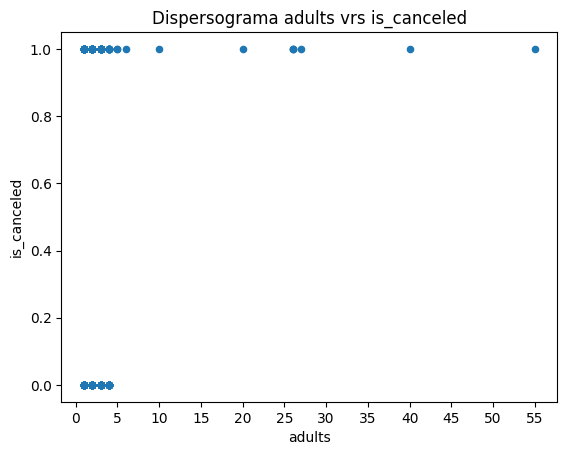

In [120]:
#Superiores

dsMuchosAdultos = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['adults'] > limiteAdultsSuperior]
dsMuchosAdultosCorrTarget = dsMuchosAdultos[['adults', 'is_canceled']]
print('Correlacion entre los adultos y el target')
print(dsMuchosAdultosCorrTarget)


grf = ds_cuantitativas_filtrado.plot.scatter(x="adults", y="is_canceled", title="Dispersograma adults vrs is_canceled", xlabel='adults', ylabel='is_canceled')
# Define las marcas del eje x cada 5 unidades
grf.set_xticks(range(0, ds_cuantitativas_filtrado["adults"].max()+1, 5))

plt.show()

In [121]:
dsMuchosAdultos

lead_time  arrival_date_year  arrival_date_week_number  \
4064         304               2015                        36   
11830        334               2015                        42   
19146        354               2015                        39   
35477        334               2015                        42   
38305        340               2015                        37   
55112        349               2015                        39   
59059        333               2015                        36   
59165        338               2015                        41   

       arrival_date_day_of_month  stays_in_weekend_nights  \
4064                           3                        0   
11830                         12                        2   
19146                         26                        2   
35477                         12                        2   
38305                         12                        2   
55112                         21                        1   
59059                          5                        2   
59165                          4                        2   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  \
4064                      3      40       0.0       0                  0   
11830                     5      20       0.0       0                  0   
19146                     5      26       0.0       0                  0   
35477                     5      10       0.0       0                  0   
38305                     5      26       0.0       0                  0   
55112                     3      27       0.0       0                  0   
59059                     5      26       0.0       0                  0   
59165                     0      55       0.0       0                  0   

       previous_cancellations  previous_bookings_not_canceled  \
4064                        0                               0   
11830                       0                               0   
19146                       0                               0   
35477                       0                               0   
38305                       0                               0   
55112                       0                               0   
59059                       0                               0   
59165                       0                               0   

       booking_changes  agent  company  days_in_waiting_list  adr  \
4064                 0    0.0      0.0                     0  0.0   
11830                0    0.0      0.0                     0  0.0   
19146                0   96.0      0.0                     0  0.0   
35477                0    0.0      0.0                     0  0.0   
38305                0   96.0      0.0                     0  0.0   
55112                0    0.0      0.0                     0  0.0   
59059                0   96.0      0.0                     0  0.0   
59165                0    0.0      0.0                     0  0.0   

       required_car_parking_spaces  total_of_special_requests  is_canceled  
4064                             0                          0            1  
11830                            0                          0            1  
19146                            0                          0            1  
35477                            0                          0            1  
38305                            0                          0            1  
55112                            0                          0            1  
59059                            0                          0            1  
59165                            0                          0            1

Como se observa con los outliers superiores que siempre que la cantidad de adultos es mayor a 5 -> siempre terminan cancelando

Por lo tanto, aunque tenemos valores de adultos que son exageradamente altos(como 40, 50) y lo más seguro sean valores erroneos, decidimos NO ELIMINARLOS debido a que puede ayudar a nuestro modelo a predecir que una reserva es muy probable que se cancele si la cantidad de adultos es muy alta

PD: Sabemos que correlación no significa causalidad pero en este caso creemos que sí puede ser la causa de cancelación ya que se puede deber a error al ingresar los datos y la cancelan para luego crear una nueva con los datos correctos

Luego haciendo este crosstab entre adultos e is_canceled cuando nos fijamos en los valores m[as usualkes de adultos (1,2 y 3) no parece haber mucha correlación o influencia sobre el target

<Axes: xlabel='adults'>

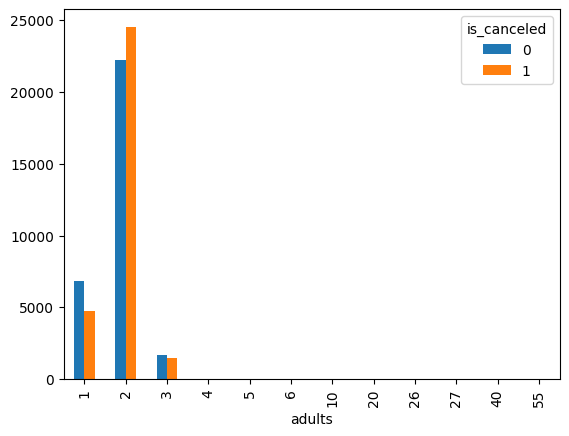

In [122]:
pd.crosstab(ds_cuantitativas_filtrado['adults'], ds_cuantitativas_filtrado['is_canceled']).plot.bar()

#####CHILDREN

In [123]:
print_outliers_info(ds_cuantitativas_filtrado, 'children')

outliers sup: 4191
outliers inf: 0
Limite inf:0.0 - limite sup:0.0


In [124]:
# Muy parecido a adultos, los severos son todos los distintos de 0, aunque 
# sabemos que 1 o 2 children por ejemplo son valores muy factibles
# Por ello: vamos a definir nuestros outliers bajo nuestro criterio

limiteChildrenSuperior=10

dsMuchosChildren = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['children'] >= limiteChildrenSuperior]
dsMuchosChildren

lead_time  arrival_date_year  arrival_date_week_number  \
49181         55               2015                        29   

       arrival_date_day_of_month  stays_in_weekend_nights  \
49181                         12                        4   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  \
49181                    10       2      10.0       0                  0   

       previous_cancellations  previous_bookings_not_canceled  \
49181                       0                               0   

       booking_changes  agent  company  days_in_waiting_list     adr  \
49181                2    8.0      0.0                     0  133.16   

       required_car_parking_spaces  total_of_special_requests  is_canceled  
49181                            0                          1            1

De los 4312 outliers de children 1 solo es un valor muy atípico que son 10 children, pero los 4311 restantes son observaciones con 1, 2 y 3 children que son valores no atípicos

Por lo tanto decidimos imputar la fila de 10 children ya que debe ser un error de tipeo. Lo reemplazamos con valor 1

In [125]:
indice=ds_cuantitativas_filtrado[(ds_cuantitativas_filtrado['children']>=limiteChildrenSuperior)]['children'].index
for i in indice:
  ds_cuantitativas_filtrado.at[i, 'children']=1
  ds_cuantitativas_final.at[i, 'children']=1

Chequeo que no hayan childrens con valores decimales distinto de .0

Se observa que todos son enteros (aunque se representan como floats)

In [126]:
ds_cuantitativas_filtrado['children'].value_counts()

0.0    57260
1.0     2398
2.0     1761
3.0       32
Name: children, dtype: int64

In [127]:
#creo una copia del dataset con children como int64 para graficar mejor
dsChildrenInt = ds_cuantitativas_filtrado.astype({'children':'int'})
dsChildrenInt.info()
ds_cuantitativas_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61451 entries, 0 to 61912
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       61451 non-null  int64  
 1   arrival_date_year               61451 non-null  int64  
 2   arrival_date_week_number        61451 non-null  int64  
 3   arrival_date_day_of_month       61451 non-null  int64  
 4   stays_in_weekend_nights         61451 non-null  int64  
 5   stays_in_week_nights            61451 non-null  int64  
 6   adults                          61451 non-null  int64  
 7   children                        61451 non-null  int64  
 8   babies                          61451 non-null  int64  
 9   is_repeated_guest               61451 non-null  int64  
 10  previous_cancellations          61451 non-null  int64  
 11  previous_bookings_not_canceled  61451 non-null  int64  
 12  booking_changes                 

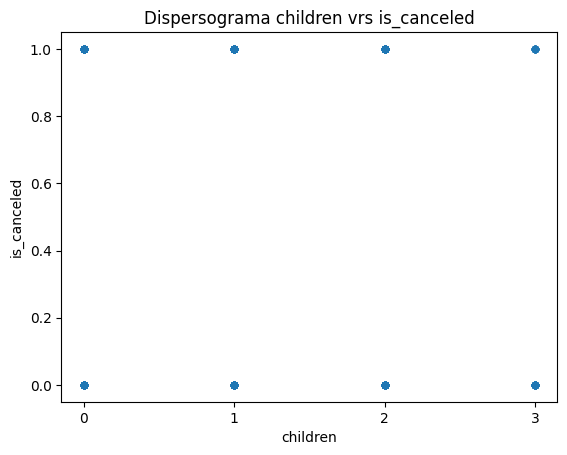

In [128]:

grf = dsChildrenInt.plot.scatter(x="children", y="is_canceled", title="Dispersograma children vrs is_canceled", xlabel='children', ylabel='is_canceled')
grf.set_xticks(range(0, dsChildrenInt["children"].max()+1, 1))
plt.show()

<Axes: xlabel='children'>

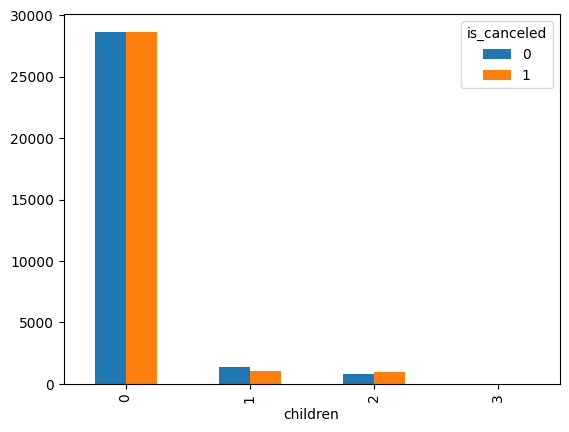

In [129]:
pd.crosstab(dsChildrenInt['children'], dsChildrenInt['is_canceled']).plot.bar()

<Axes: xlabel='children'>

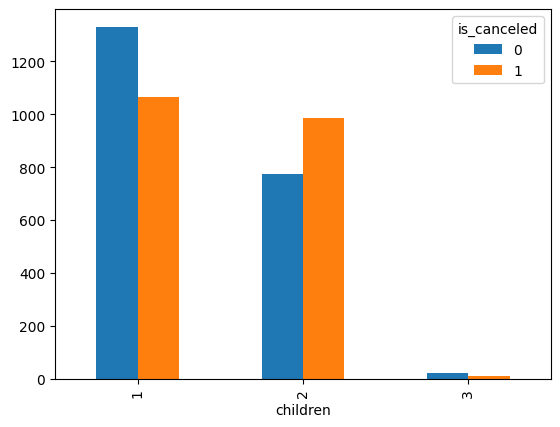

In [130]:
#Children mayores a cero para ver ver en mejor escala las observaciones con al menos un children

dsConChildren = dsChildrenInt[dsChildrenInt['children'] > 0]
pd.crosstab(dsConChildren['children'], dsConChildren['is_canceled']).plot.bar()

#####BABIES

In [131]:
print_outliers_info(ds_cuantitativas_filtrado, 'babies')

outliers sup: 423
outliers inf: 0
Limite inf:0.0 - limite sup:0.0


In [132]:
# me fijo en los valores de los outliers

ds_cuantitativas_filtrado['babies'].value_counts()

0    61028
1      415
2        7
9        1
Name: babies, dtype: int64

Los 'outliers' con 1 y 2 babies no los eliminamos porque son valores muy probables

El de 9 babies lo imprimimos para estudiarlos 

In [133]:
ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['babies'] > 3]

lead_time  arrival_date_year  arrival_date_week_number  \
12659         11               2015                        42   

       arrival_date_day_of_month  stays_in_weekend_nights  \
12659                         11                        2   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  \
12659                     1       1       0.0       9                  0   

       previous_cancellations  previous_bookings_not_canceled  \
12659                       0                               0   

       booking_changes  agent  company  days_in_waiting_list   adr  \
12659                1   95.0      0.0                     0  95.0   

       required_car_parking_spaces  total_of_special_requests  is_canceled  
12659                            0                          0            0

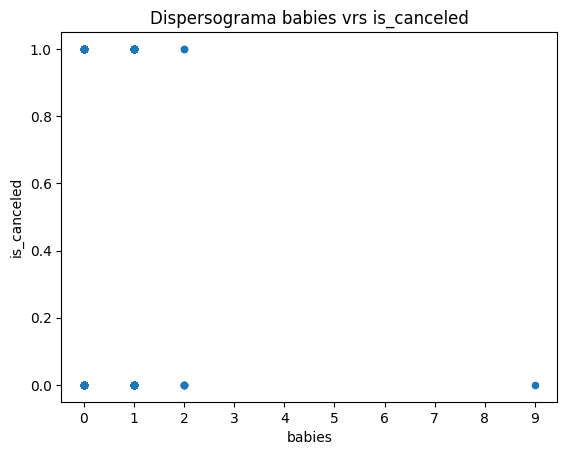

In [134]:
grf = ds_cuantitativas_filtrado.plot.scatter(x="babies", y="is_canceled", title="Dispersograma babies vrs is_canceled", xlabel='babies', ylabel='is_canceled')
grf.set_xticks(range(0, ds_cuantitativas_filtrado["babies"].max()+1, 1))
plt.show()

<Axes: xlabel='babies'>

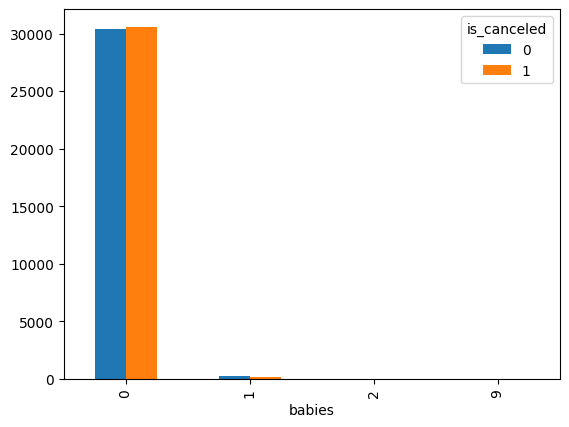

In [135]:
pd.crosstab(ds_cuantitativas_filtrado['babies'], ds_cuantitativas_filtrado['is_canceled']).plot.bar()

<Axes: xlabel='babies'>

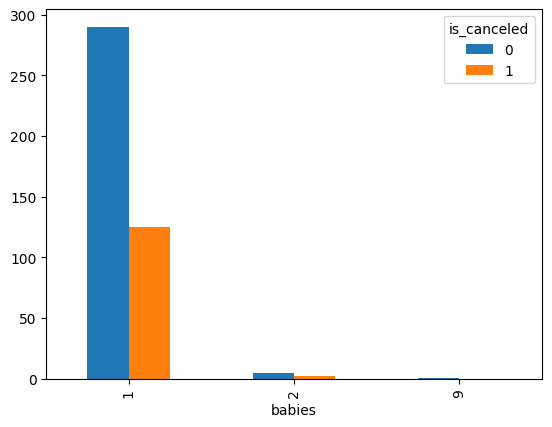

In [136]:
#Babies mayores a cero para ver ver en mejor escala las observaciones con al menos un Baby

dsConBabies = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['babies'] > 0]
pd.crosstab(dsConBabies['babies'], dsConBabies['is_canceled']).plot.bar()

Las observaciones sin bebés están muy parejas en cuanto a relación con el target

Por su parte cuando van con un al menos un bebé se observa que es menos probable que cancelen.

Eliminamos a los atributos mayores a 3 ya que, nos parece que 

In [137]:
indice_eliminar=ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['babies']>3].index
ds_cuantitativas_filtrado.drop(index=indice_eliminar, inplace=True)
ds_cuantitativas_final.drop(index=indice_eliminar, inplace=True)



In [138]:
print(ds_cuantitativas_filtrado.shape)
print(ds_cuantitativas_final.shape)

(61450, 20)
(61450, 21)


In [139]:
ds_cuantitativas_filtrado

lead_time  arrival_date_year  arrival_date_week_number  \
0             49               2016                        37   
1              4               2015                        44   
2             25               2016                        42   
3             26               2016                        51   
4            104               2017                        12   
...          ...                ...                       ...   
61908         24               2017                         4   
61909          0               2016                        36   
61910         10               2017                        19   
61911        143               2015                        41   
61912         57               2016                        17   

       arrival_date_day_of_month  stays_in_weekend_nights  \
0                              5                        1   
1                             31                        0   
2                             13                        0   
3                             12                        2   
4                             19                        2   
...                          ...                      ...   
61908                         27                        0   
61909                          2                        0   
61910                          8                        1   
61911                         10                        2   
61912                         17                        2   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  \
0                         2       1       0.0       0                  0   
1                         1       2       0.0       0                  0   
2                         1       2       2.0       0                  0   
3                         5       2       0.0       0                  0   
4                         5       2       0.0       0                  0   
...                     ...     ...       ...     ...                ...   
61908                     2       2       0.0       0                  0   
61909                     1       1       0.0       0                  0   
61910                     2       1       0.0       0                  0   
61911                     5       2       0.0       0                  0   
61912                     5       2       0.0       0                  0   

       previous_cancellations  previous_bookings_not_canceled  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   
...                       ...                             ...   
61908                       0                               0   
61909                       0                               0   
61910                       0                               0   
61911                       0                               0   
61912                       0                               0   

       booking_changes  agent  company  days_in_waiting_list     adr  \
0                    0    9.0      0.0                     0  115.50   
1                    0    0.0      0.0                     0   42.00   
2                    0    9.0      0.0                     0  229.00   
3                    0  154.0      0.0                     0   75.00   
4                    0   20.0      0.0                     0   75.00   
...                ...    ...      ...                   ...     ...   
61908                0  240.0      0.0                     0   48.00   
61909                0    0.0      0.0                     0  149.00   
61910                0    0.0    153.0                     0   95.00   
61911                0   96.0      0.0                     0   36.05   
61912  

##### required_car_parking_spaces

In [140]:
print_outliers_info(ds_cuantitativas_filtrado, 'required_car_parking_spaces')

outliers sup: 3039
outliers inf: 0
Limite inf:0.0 - limite sup:0.0


In [141]:
ds_cuantitativas_filtrado['required_car_parking_spaces'].value_counts()

0    58411
1     3025
2       12
8        1
3        1
Name: required_car_parking_spaces, dtype: int64

De los 3040 "outliers" severos de required_car_parking_spaces 1 solo es un valor muy atípico que son 8 autos, pero los 3039 restantes son observaciones con 1, 2 y 3 autos que son valores no atípicos (al menos en este análisis univariado)

Por lo tanto decidimos borrar por ahora unicamente el de valor 8

In [142]:
# Por ello: vamos a definir nuestros outliers bajo nuestro criterio

limiteAutosSuperior=2

dsMuchosAutos = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['required_car_parking_spaces'] > limiteAutosSuperior]
dsMuchosAutos

lead_time  arrival_date_year  arrival_date_week_number  \
8269         138               2017                        12   
13713        205               2017                        26   

       arrival_date_day_of_month  stays_in_weekend_nights  \
8269                          19                        2   
13713                         26                        3   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  \
8269                      2       2       0.0       0                  1   
13713                    10       2       0.0       0                  0   

       previous_cancellations  previous_bookings_not_canceled  \
8269                        0                               2   
13713                       0                               0   

       booking_changes  agent  company  days_in_waiting_list    adr  \
8269                 1    0.0      0.0                   122   80.0   
13713                2  250.0      0.0                     0  111.0   

       required_car_parking_spaces  total_of_special_requests  is_canceled  
8269                             8                          0            0  
13713                            3                          0            0

In [143]:
#eliminamos los que tienen mas de 2 autos
indice_autos_eliminar=dsMuchosAutos.index
ds_cuantitativas_filtrado.drop(index=indice_autos_eliminar, inplace=True)
ds_cuantitativas_final.drop(index=indice_autos_eliminar, inplace=True)
print(ds_cuantitativas_filtrado.shape)
print(ds_cuantitativas_final.shape)

(61448, 20)
(61448, 21)


Vamos a proceder a hacer un análisis multivariado y vamos a ver la relación entre las variables required_car_parking_spaces y adults, ya que tal vez no tiene mucho sentido que hayan más autos que adultos (Quien los manejaría?)


In [144]:
muestraConMasAutosQueAdultos = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado["adults"] < ds_cuantitativas_filtrado["required_car_parking_spaces"]]
muestraConMasAutosQueAdultos.shape

(0, 20)

En el siguiente scatter plot podemos ver que siempre que required_car_parking_spaces es mayor a cero no han habido cancelaciones

De nuevo acá, Correlación no implica causalidad pero es interesante... 🤔

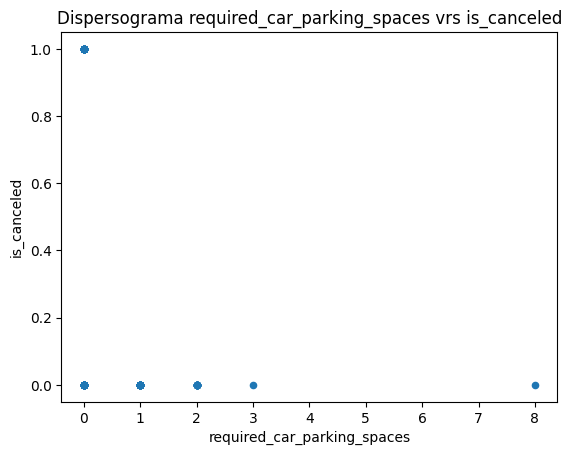

In [145]:
grf = dsChildrenInt.plot.scatter(x="required_car_parking_spaces", y="is_canceled", title="Dispersograma required_car_parking_spaces vrs is_canceled", xlabel='required_car_parking_spaces', ylabel='is_canceled')
grf.set_xticks(range(0, dsChildrenInt["required_car_parking_spaces"].max()+1, 1))
plt.show()

##### days_in_waiting_list

In [146]:
print_outliers_info(ds_cuantitativas_filtrado, 'days_in_waiting_list')

outliers sup: 2230
outliers inf: 0
Limite inf:0.0 - limite sup:0.0


In [147]:
ds_cuantitativas_filtrado['days_in_waiting_list'].value_counts()

0      59218
39       155
31        90
44        83
58        82
       ...  
109        1
13         1
36         1
84         1
105        1
Name: days_in_waiting_list, Length: 115, dtype: int64

In [148]:
ds_cuantitativas_filtrado['days_in_waiting_list'].value_counts().sort_index()

0      59218
1          6
2          4
3         41
4         15
       ...  
236       16
259        5
330        7
379        5
391       33
Name: days_in_waiting_list, Length: 115, dtype: int64

Hago un histograma de las variables 

In [149]:
def plot_histogram_with_fig_and_step(df, variable):
    plt.figure(figsize=(15,5))
    plt.hist(df[variable], bins=10)
    plt.title('Histograma de ' + variable + ' anterior')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.xticks(range(0, ds_cuantitativas_filtrado["days_in_waiting_list"].max()+1, 20))
    plt.show()

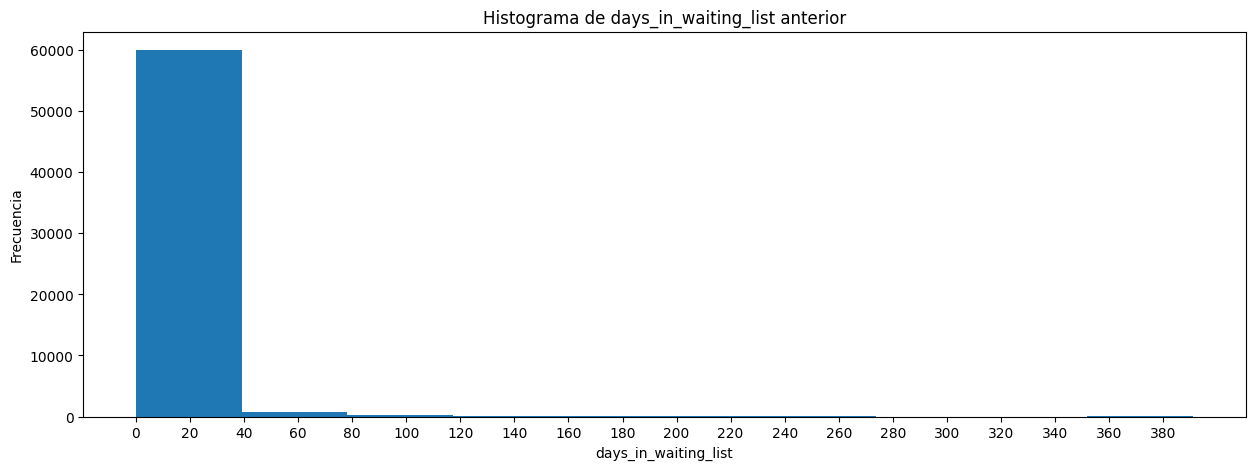

In [150]:
plot_histogram_with_fig_and_step(ds_cuantitativas_filtrado, 'days_in_waiting_list')


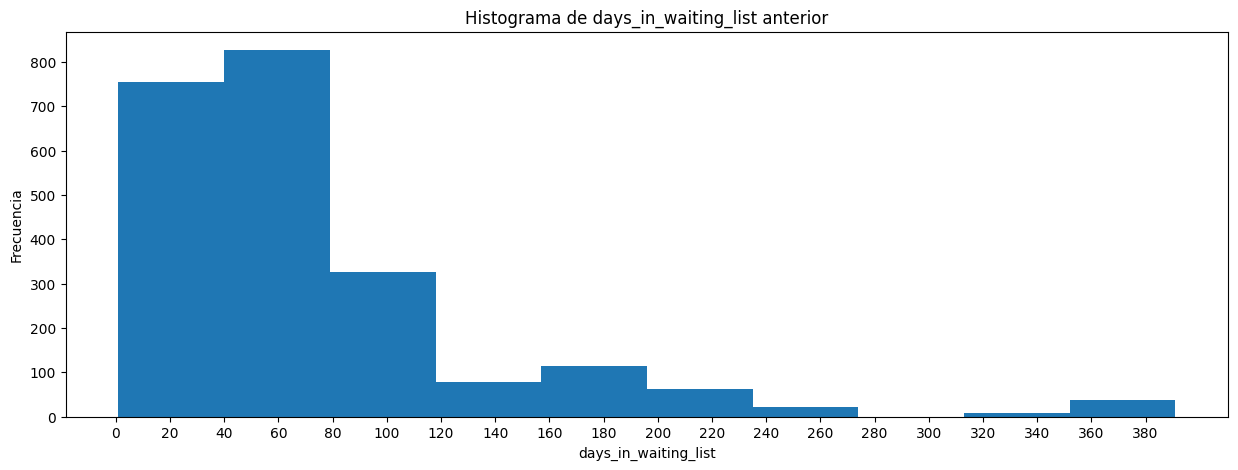

In [151]:
# lo repito quitando los ceros para poder apreciar mejor la distribución de los otros
plot_histogram_with_fig_and_step(ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['days_in_waiting_list'] > 0], 'days_in_waiting_list')

Como vemos a los 120 aprox baja fuertemente la frecuencia tomamos ese valor como limite y elimiinamos los mayores a ese numero

In [152]:
listaDeEsperaMasDe120Dias =ds_cuantitativas_filtrado[ds_cuantitativas_filtrado["days_in_waiting_list"] > 120]
listaDeEsperaMasDe120Dias.shape 
listaDeEsperaIndicesEliminar = listaDeEsperaMasDe120Dias.index

print(ds_cuantitativas_filtrado.shape)

ds_cuantitativas_filtrado.drop(index=listaDeEsperaIndicesEliminar, inplace=True)
ds_cuantitativas_final.drop(index=listaDeEsperaIndicesEliminar, inplace=True)

print(ds_cuantitativas_filtrado.shape)
print(ds_cuantitativas_final.shape)

(61448, 20)
(61145, 20)
(61145, 21)


En el siguiente dispersograma se ve que hay poca correlación con el target

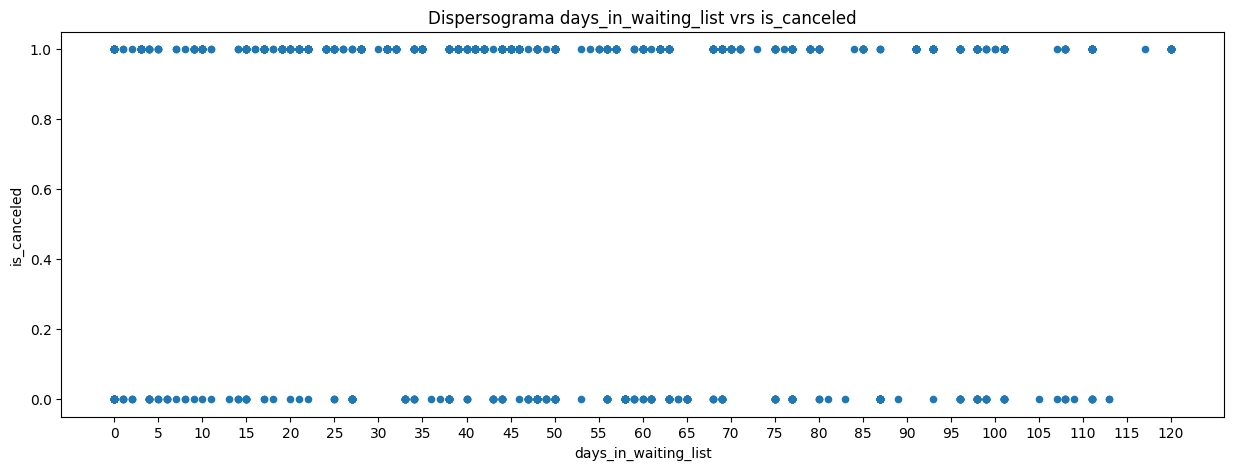

In [153]:
grf = ds_cuantitativas_filtrado.plot.scatter(x="days_in_waiting_list", y="is_canceled", figsize=(15, 5)
                                             ,title="Dispersograma days_in_waiting_list vrs is_canceled", xlabel='days_in_waiting_list', ylabel='is_canceled')
grf.set_xticks(range(0, ds_cuantitativas_filtrado["days_in_waiting_list"].max()+1, 5))
plt.show()

##### booking_changes


In [154]:
print_outliers_info(ds_cuantitativas_filtrado, 'booking_changes')

outliers sup: 8155
outliers inf: 0
Limite inf:0.0 - limite sup:0.0


In [155]:
ds_cuantitativas_filtrado['booking_changes'].value_counts()

0     52990
1      5711
2      1771
3       393
4       160
5        54
6        30
7        15
8         8
13        3
10        3
9         2
14        2
12        1
15        1
17        1
Name: booking_changes, dtype: int64

De los 8187 "outliers" severos de booking_changes: vemos que nos da que todos los distinto de cero son outliers severos, lo cual no es tas así ya que hay valores que son super probables que pasen

Por ello visto que de booking_changes igual 4 a 5 hay una caida imporatante en la frecuencia (de 160 a 55) por lo tanto eliminamos todos los mayores a 4

In [156]:
limiteChangesSuperior=4

dsMuchosBookingChanges = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['booking_changes'] > limiteChangesSuperior]
dsMuchosBookingChanges.shape

(120, 20)

In [157]:
# eliminamos las 122 observaciones consideradas outliers bajo nuestro criterio
changesIndicesEliminar = dsMuchosBookingChanges.index
print(ds_cuantitativas_filtrado.shape)
ds_cuantitativas_filtrado.drop(index=changesIndicesEliminar, inplace=True)
ds_cuantitativas_final.drop(index=changesIndicesEliminar, inplace=True)
print(ds_cuantitativas_filtrado.shape)
print(ds_cuantitativas_final.shape)

(61145, 20)
(61025, 20)
(61025, 21)


#####HISTORIAL_DE_HUESPEDES

Como las categorias 'is_repeated_guest', 'previous_bookings_not_canceled' y 'previous_cancellations' las agruparemos en una misma seccion ya analizaremos sus outliers con la variable 'is_canceled'.

######IS_REPEATED_GUEST



In [158]:
print_outliers_info(ds_cuantitativas_filtrado, 'is_repeated_guest')

outliers sup: 1698
outliers inf: 0
Limite inf:0.0 - limite sup:0.0


In [159]:
# me fijo en los valores de los outliers

ds_cuantitativas_filtrado['is_repeated_guest'].value_counts()

0    59327
1     1698
Name: is_repeated_guest, dtype: int64

<Axes: xlabel='is_repeated_guest'>

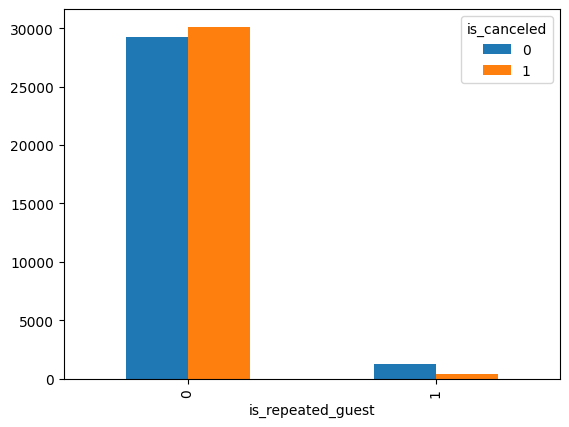

In [160]:
pd.crosstab(ds_cuantitativas_filtrado['is_repeated_guest'], ds_cuantitativas_filtrado['is_canceled']).plot.bar()

Se nos marca que hay outliers por el hecho de que hay una gran diferencia entre los huespedes que se repiten y los que no, no eliminamos ninguno de estos valores ya que no aplica como outlier.

######PREVIOUS_BOOKINGS_NOT_CANCELED

In [161]:
print_outliers_info(ds_cuantitativas_filtrado, 'previous_bookings_not_canceled')

outliers sup: 1524
outliers inf: 0
Limite inf:0.0 - limite sup:0.0


In [162]:
# me fijo en los valores de los outliers
ds_cuantitativas_filtrado['previous_bookings_not_canceled'].value_counts().sort_index()

0     59501
1       621
2       257
3       150
4       102
5        79
6        43
7        29
8        29
9        23
10       24
11       21
12       14
13       19
14       12
15        9
16        4
17        8
18        7
19        4
20        5
21        4
22        5
23        2
24        6
25       10
26        5
27        3
28        4
29        3
30        1
31        1
32        1
33        1
36        1
38        1
40        1
41        1
43        1
49        1
50        1
55        1
56        1
58        2
59        1
61        1
62        1
63        1
64        1
69        1
70        1
Name: previous_bookings_not_canceled, dtype: int64

Tomamos la decision de dejar como valor maximo 30, ya que luego de este los valores comienzan a ser unicos.

In [163]:
indice_eliminar=ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['previous_bookings_not_canceled']>30].index
ds_cuantitativas_filtrado.drop(index=indice_eliminar, inplace=True)
ds_cuantitativas_final.drop(index=indice_eliminar, inplace=True)



In [164]:
print(ds_cuantitativas_filtrado.shape)
print(ds_cuantitativas_final.shape)

(61004, 20)
(61004, 21)


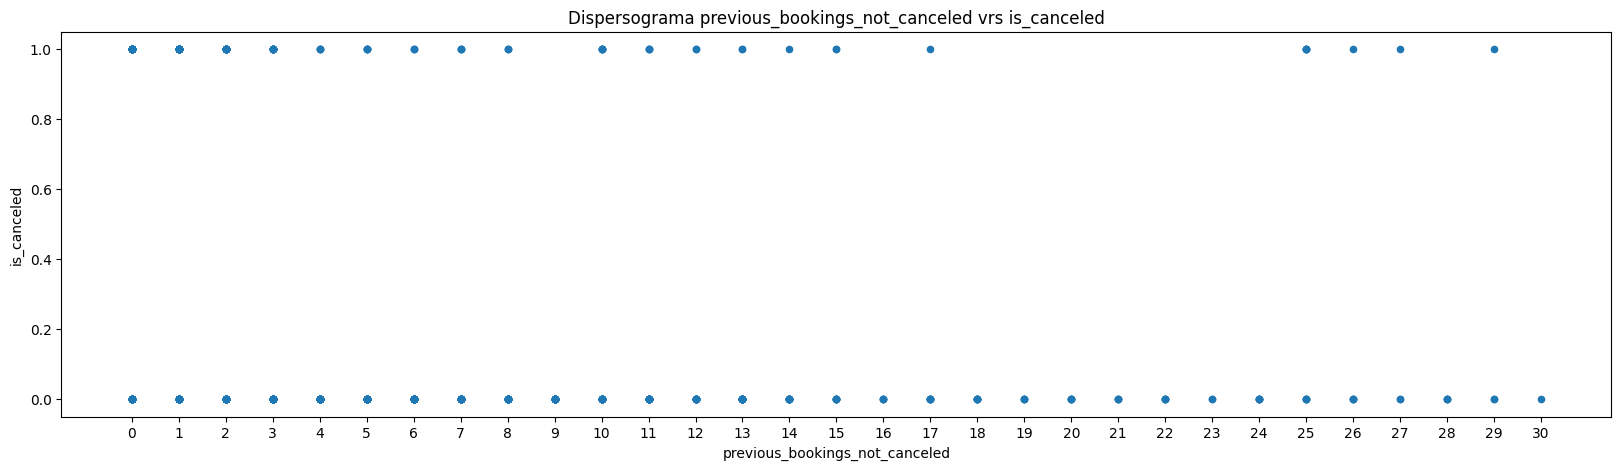

In [165]:

grf = ds_cuantitativas_filtrado.plot.scatter(x="previous_bookings_not_canceled", y="is_canceled", title="Dispersograma previous_bookings_not_canceled vrs is_canceled", xlabel='previous_bookings_not_canceled', ylabel='is_canceled', figsize=(20,5))
grf.set_xticks(range(0, ds_cuantitativas_filtrado["previous_bookings_not_canceled"].max()+1, 1))
plt.show()

<Axes: xlabel='previous_bookings_not_canceled'>

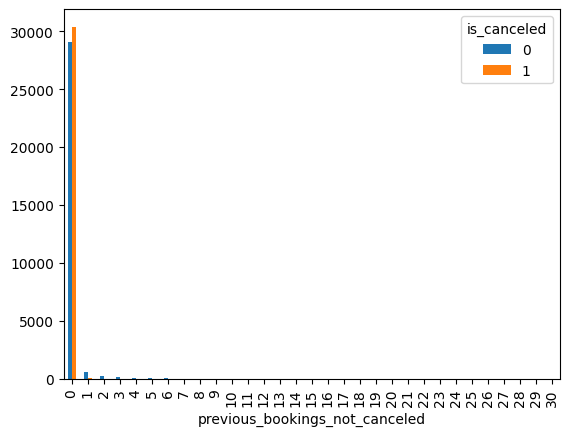

In [166]:
pd.crosstab(ds_cuantitativas_filtrado['previous_bookings_not_canceled'], ds_cuantitativas_filtrado['is_canceled']).plot.bar()

Por la gran cantidad de previous_bookings_not_canceled en 0, tomaremos valores mayores a 0 y mayores a 10 para poder tener una mejor observacion de los datos.

<Axes: xlabel='previous_bookings_not_canceled'>

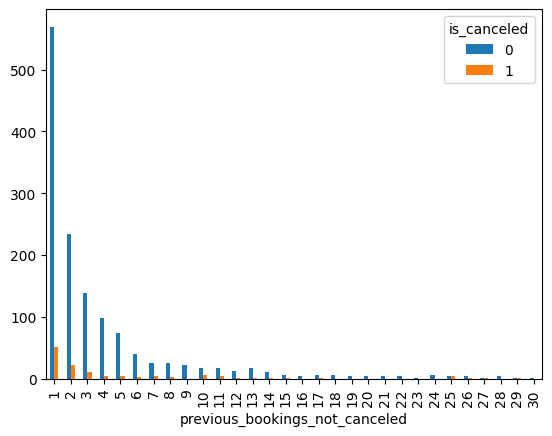

In [167]:
dsNoCancelado = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['previous_bookings_not_canceled'] > 0]
pd.crosstab(dsNoCancelado['previous_bookings_not_canceled'], dsNoCancelado['is_canceled']).plot.bar()

<Axes: xlabel='previous_bookings_not_canceled'>

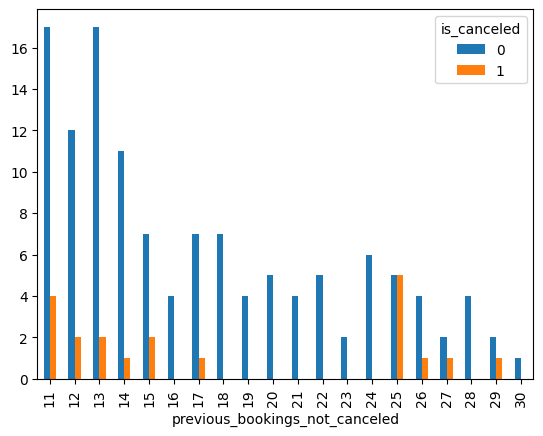

In [168]:
dsNoCancelado = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['previous_bookings_not_canceled'] > 10]
pd.crosstab(dsNoCancelado['previous_bookings_not_canceled'], dsNoCancelado['is_canceled']).plot.bar()

######PREVIOUS_CANCELLATIONS

In [169]:
print_outliers_info(ds_cuantitativas_filtrado, 'previous_cancellations')

outliers sup: 4368
outliers inf: 0
Limite inf:0.0 - limite sup:0.0


In [170]:
# me fijo en los valores de los outliers
ds_cuantitativas_filtrado['previous_cancellations'].value_counts().sort_index()

0     56636
1      4133
2        60
3        26
4        16
5         5
6         3
11       15
13        8
14       12
19       17
21        1
24       36
25       16
26       20
Name: previous_cancellations, dtype: int64

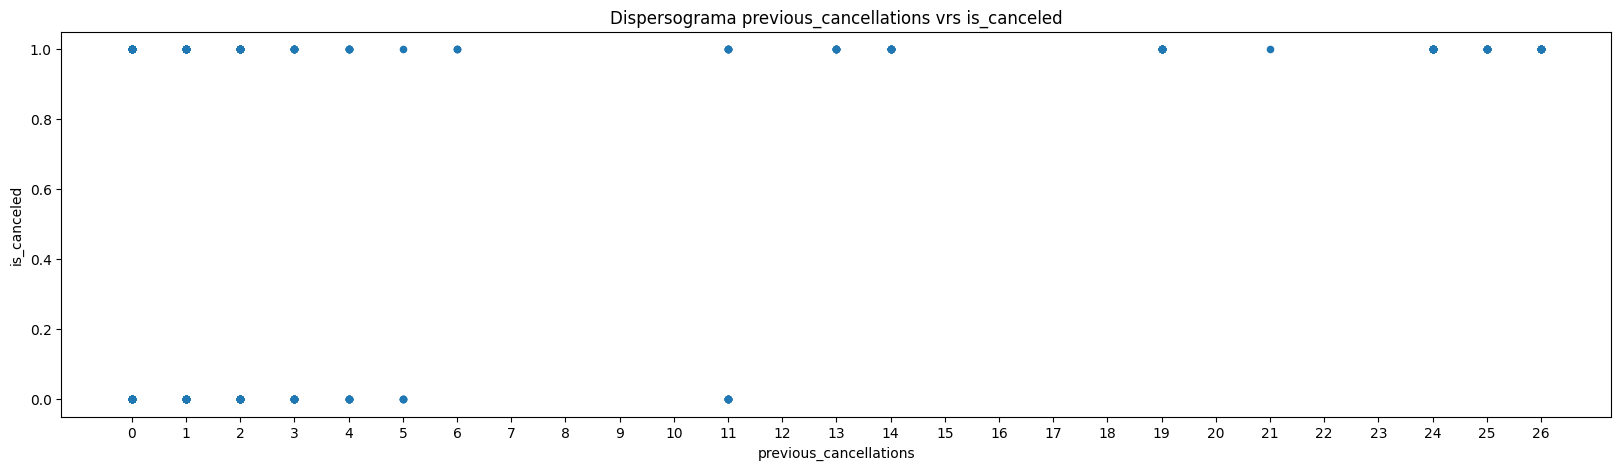

In [171]:
grf = ds_cuantitativas_filtrado.plot.scatter(x="previous_cancellations", y="is_canceled", title="Dispersograma previous_cancellations vrs is_canceled", xlabel='previous_cancellations', ylabel='is_canceled', figsize=(20,5))
grf.set_xticks(range(0, ds_cuantitativas_filtrado["previous_cancellations"].max()+1, 1))
plt.show()

<Axes: xlabel='previous_cancellations'>

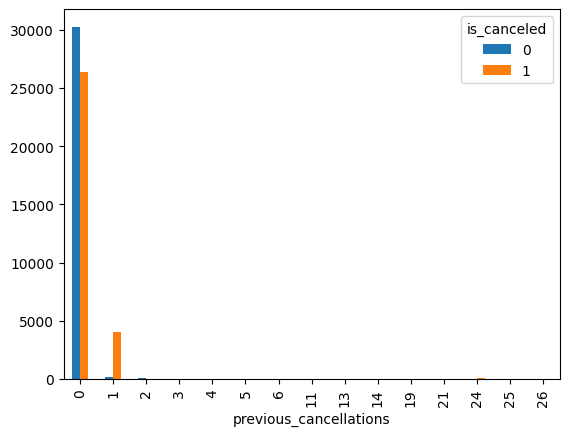

In [172]:
pd.crosstab(ds_cuantitativas_filtrado['previous_cancellations'], ds_cuantitativas_filtrado['is_canceled']).plot.bar()

Por la gran cantidad de previous_bookings_not_canceled en 0, tomaremos valores mayores a 0 y mayores a 5 para poder tener una mejor observacion de los datos.

<Axes: xlabel='previous_cancellations'>

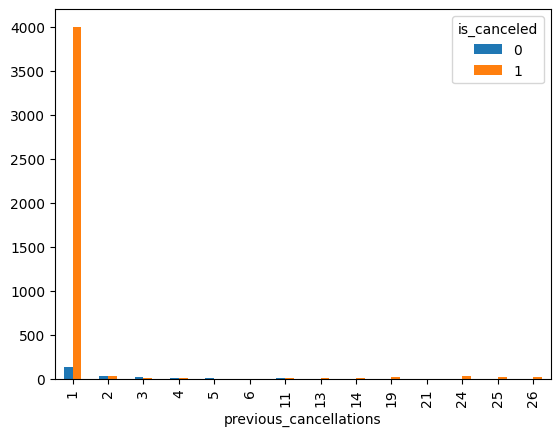

In [173]:
dsCancelacionesPrevias = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['previous_cancellations'] > 0]
pd.crosstab(dsCancelacionesPrevias['previous_cancellations'], dsCancelacionesPrevias['is_canceled']).plot.bar()

<Axes: xlabel='previous_cancellations'>

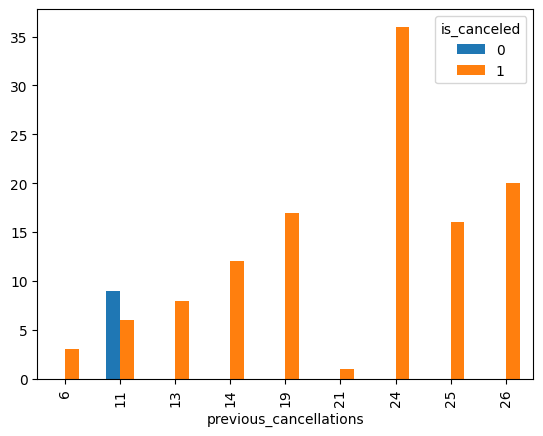

In [174]:
dsCancelacionesPrevias = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['previous_cancellations'] > 5]
pd.crosstab(dsCancelacionesPrevias['previous_cancellations'], dsCancelacionesPrevias['is_canceled']).plot.bar()

Decidimos no eliminar esta variable, ya que muestra una tendencia en el target. Comprendemos que correlacion y casualidad no son lo mismo, pero creemos que esto podria ayudar a la prediccion del modelo, ya que puede haber personas que busquen perjudicar al hotel.

######ANALISIS MULTIVARIAL ENTRE LAS 3 VARIABLES

PREVIOUS_CANCELLATIONS y PREVIOUS_BOOKINGS_NOT_CANCELED

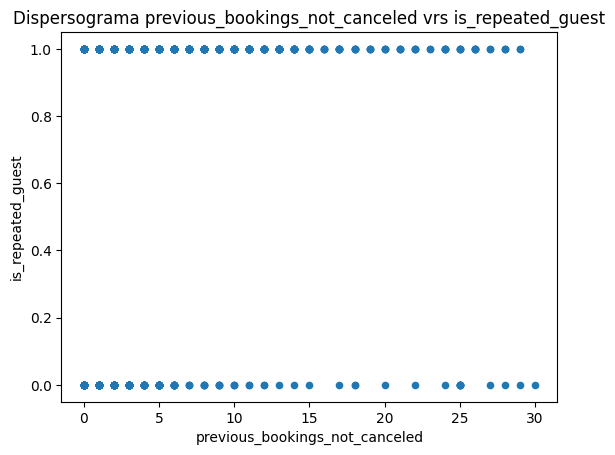

In [175]:
grf = ds_cuantitativas_filtrado.plot.scatter(x="previous_bookings_not_canceled", y="is_repeated_guest", title="Dispersograma previous_bookings_not_canceled vrs is_repeated_guest", xlabel='previous_bookings_not_canceled', ylabel='is_repeated_guest')
grf.set_xticks(range(0, ds_cuantitativas_filtrado["previous_bookings_not_canceled"].max()+1, 5))
plt.show()

<Axes: xlabel='previous_bookings_not_canceled'>

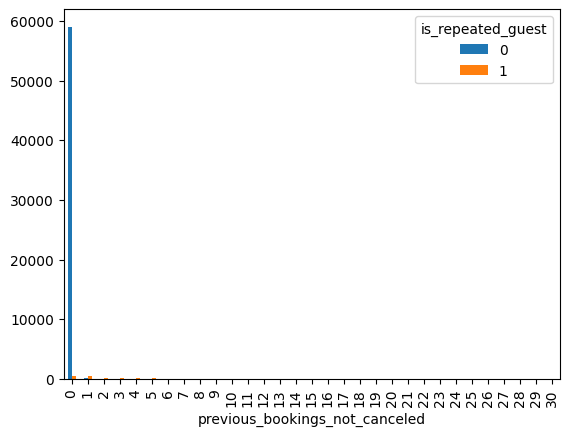

In [176]:
pd.crosstab(ds_cuantitativas_filtrado['previous_bookings_not_canceled'], ds_cuantitativas_filtrado['is_repeated_guest']).plot.bar()

<Axes: xlabel='previous_bookings_not_canceled'>

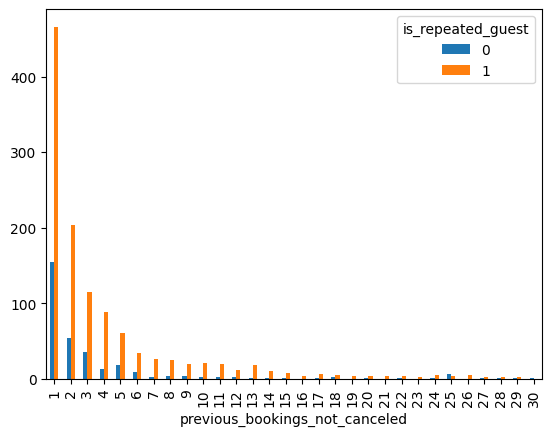

In [177]:
dsCancelacionesPrevias = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['previous_bookings_not_canceled']>0]
pd.crosstab(dsCancelacionesPrevias['previous_bookings_not_canceled'], dsCancelacionesPrevias['is_repeated_guest']).plot.bar()

<Axes: xlabel='previous_bookings_not_canceled'>

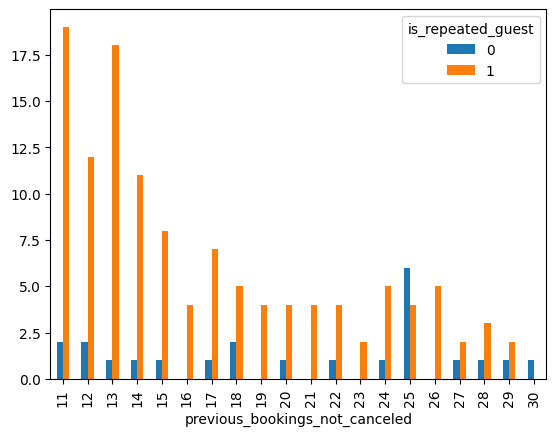

In [178]:
dsCancelacionesPrevias = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['previous_bookings_not_canceled']>10]
pd.crosstab(dsCancelacionesPrevias['previous_bookings_not_canceled'], dsCancelacionesPrevias['is_repeated_guest']).plot.bar()

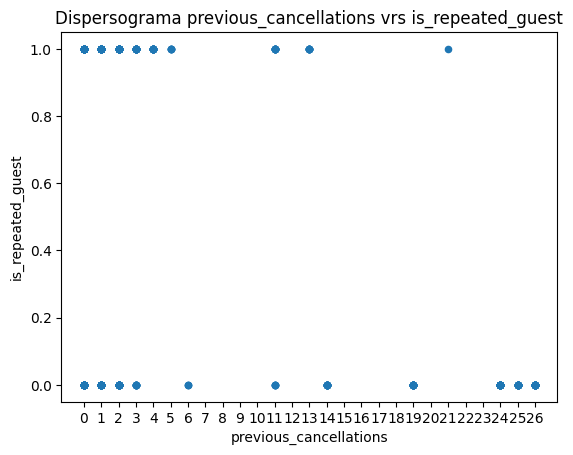

In [179]:
grf = ds_cuantitativas_filtrado.plot.scatter(x="previous_cancellations", y="is_repeated_guest", title="Dispersograma previous_cancellations vrs is_repeated_guest", xlabel='previous_cancellations', ylabel='is_repeated_guest')
grf.set_xticks(range(0, ds_cuantitativas_filtrado["previous_cancellations"].max()+1, 1))
plt.show()

<Axes: xlabel='previous_cancellations'>

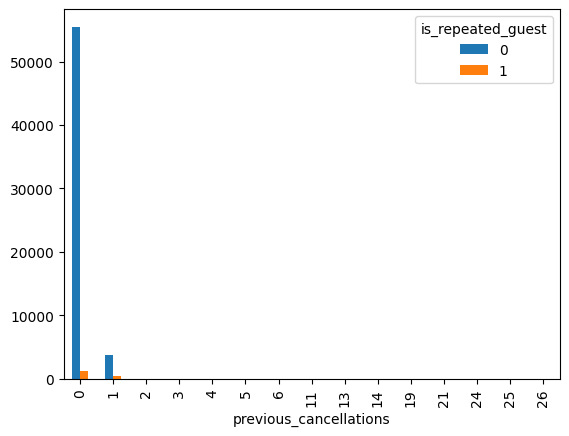

In [180]:
pd.crosstab(ds_cuantitativas_filtrado['previous_cancellations'], ds_cuantitativas_filtrado['is_repeated_guest']).plot.bar()

<Axes: xlabel='previous_cancellations'>

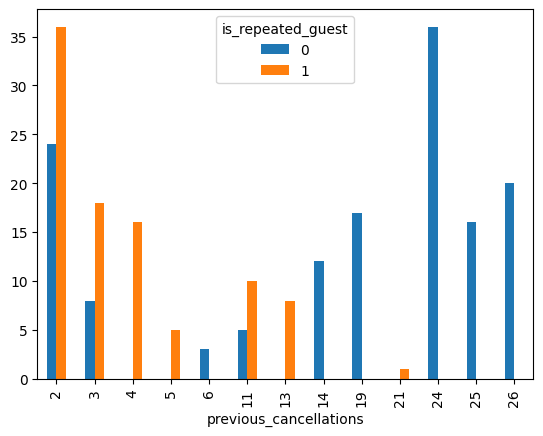

In [181]:
dsCancelacionesPrevias = ds_cuantitativas_filtrado[ds_cuantitativas_filtrado['previous_cancellations'] > 1]
pd.crosstab(dsCancelacionesPrevias['previous_cancellations'], dsCancelacionesPrevias['is_repeated_guest']).plot.bar()

##Distribucion del dataset modificado


In [182]:
print(ds_cuantitativas_filtrado.shape)
print(ds_cuantitativas_final.shape)

(61004, 20)
(61004, 21)


In [183]:
def plot_histogram_anterior(df, variable):
    # crear el histograma de la variable especificada
    plt.figure(figsize=(15,5))
    plt.hist(df[variable], bins=10)
    plt.title('Histograma de ' + variable + ' anterior')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()
def plot_histogram_modificado(df, variable):
    # crear el histograma de la variable especificada
    plt.figure(figsize=(15,5))
    plt.hist(df[variable], bins=10)
    plt.title('Histograma de ' + variable + ' modificado')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

lead_time


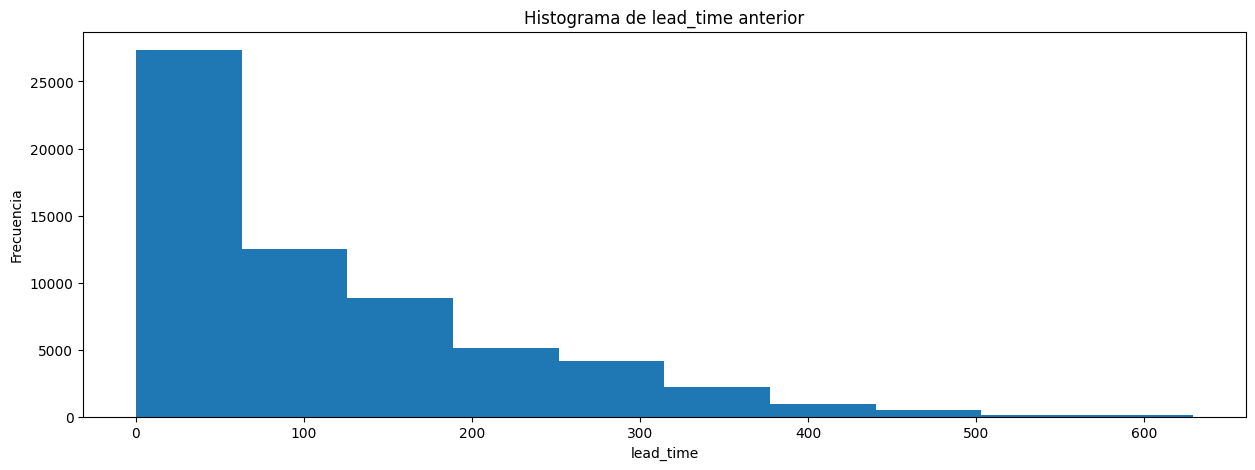

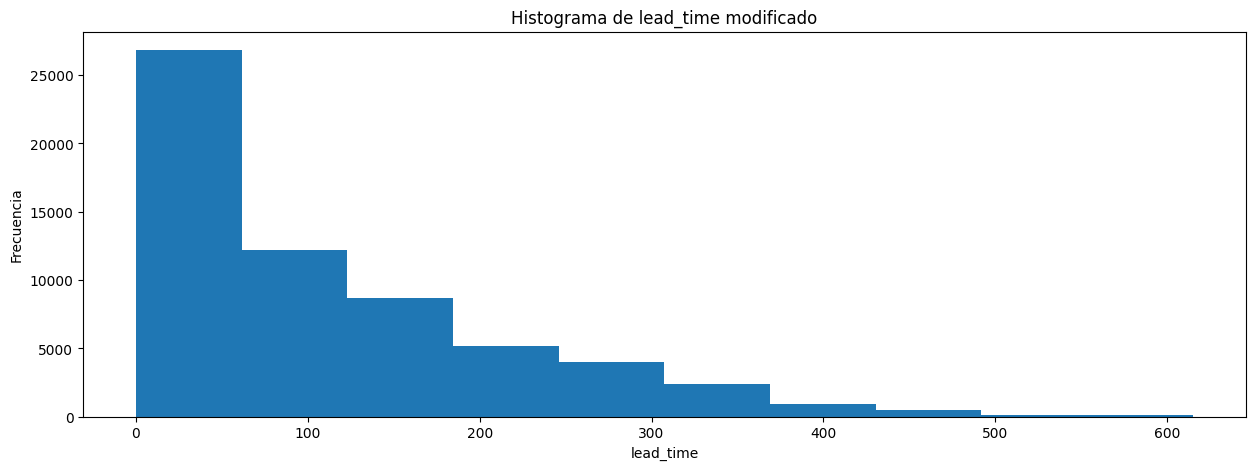

arrival_date_year


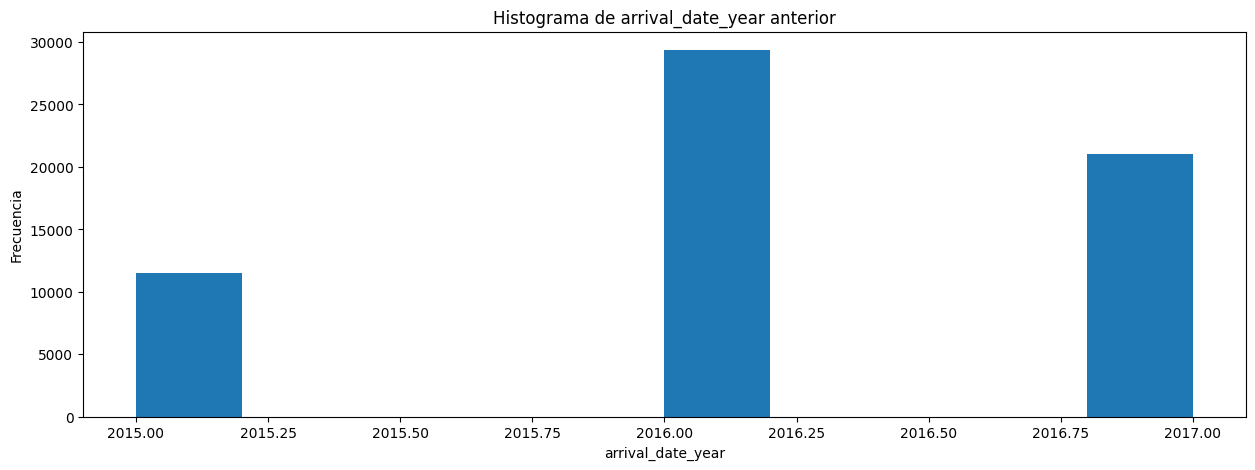

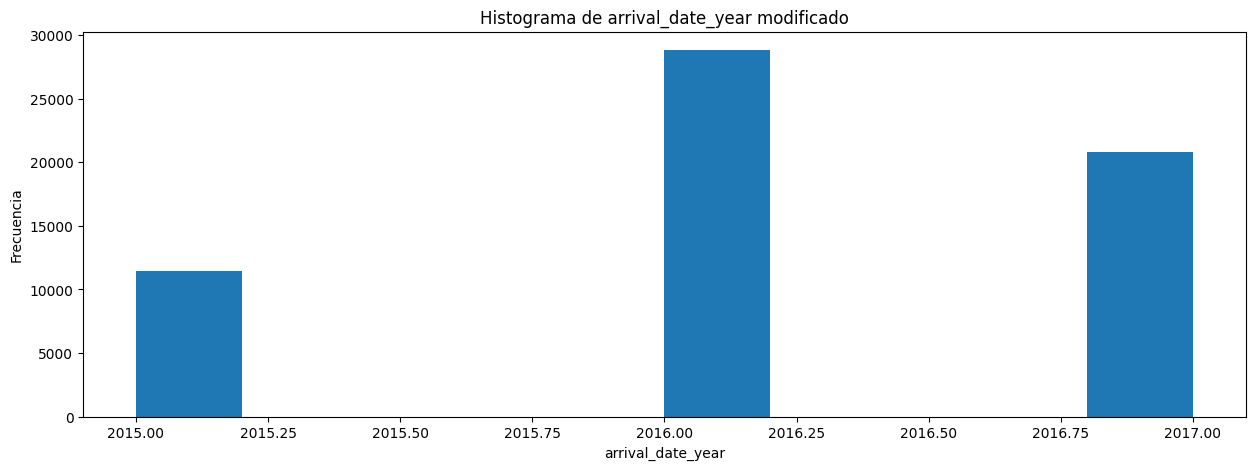

arrival_date_week_number


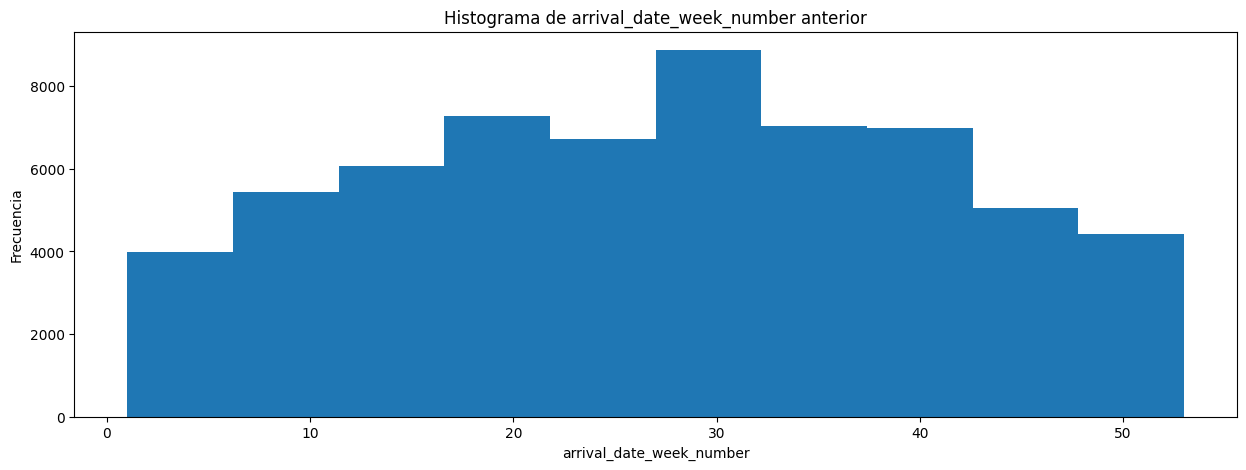

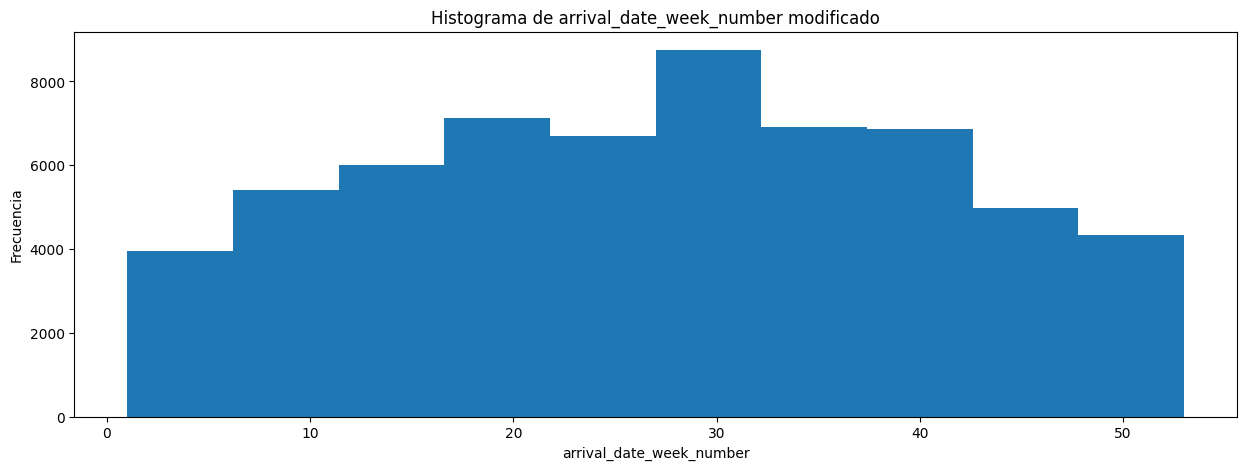

arrival_date_day_of_month


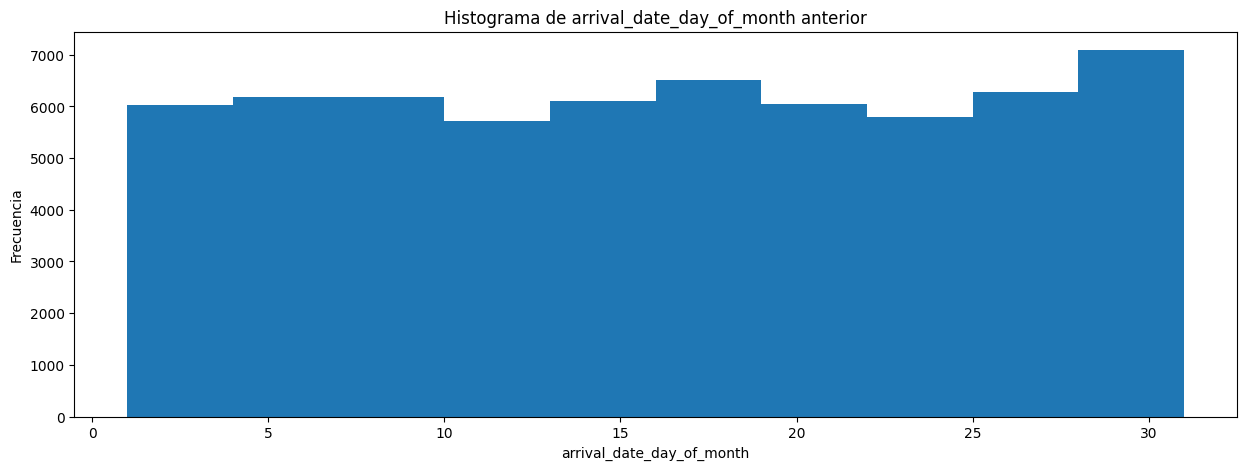

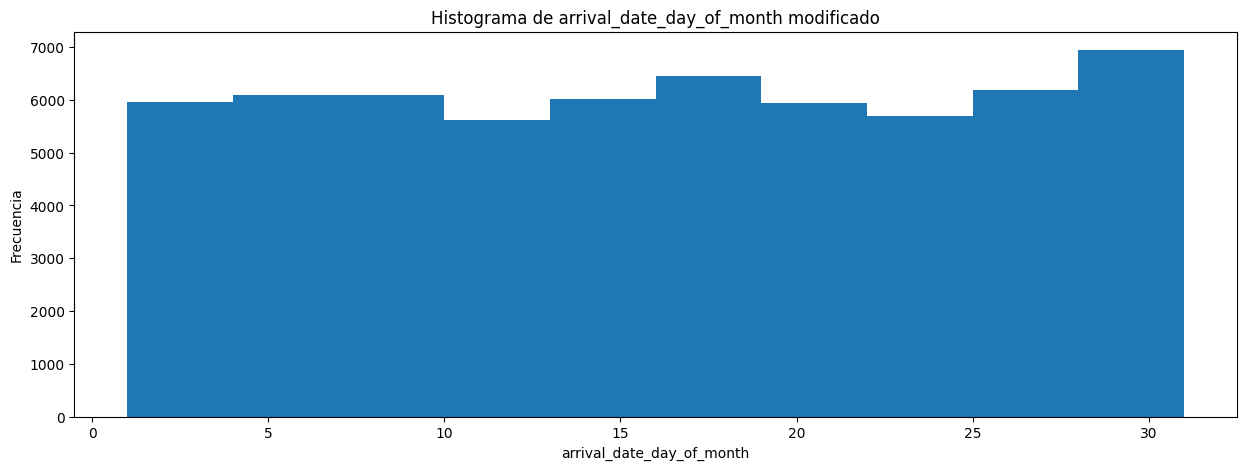

stays_in_weekend_nights


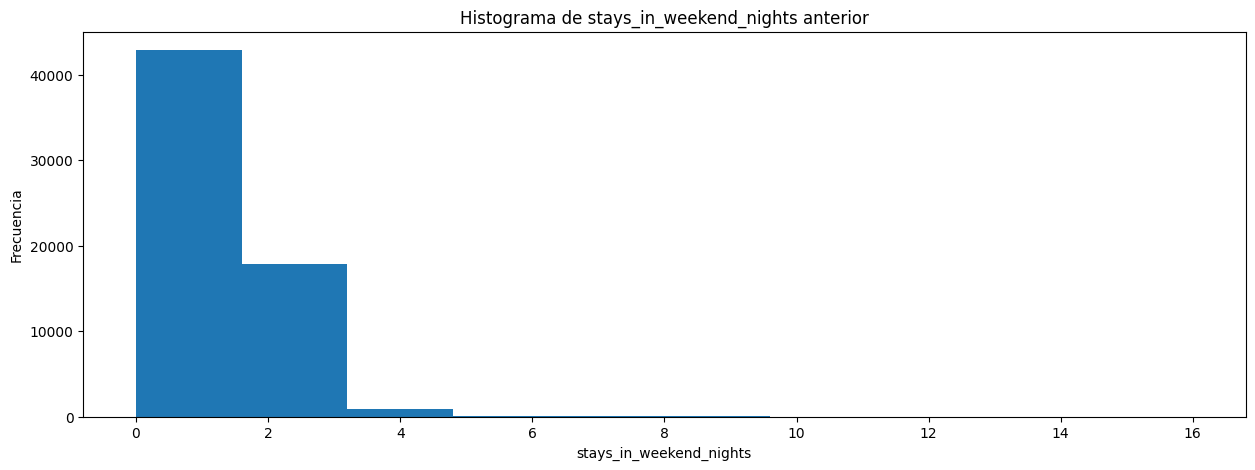

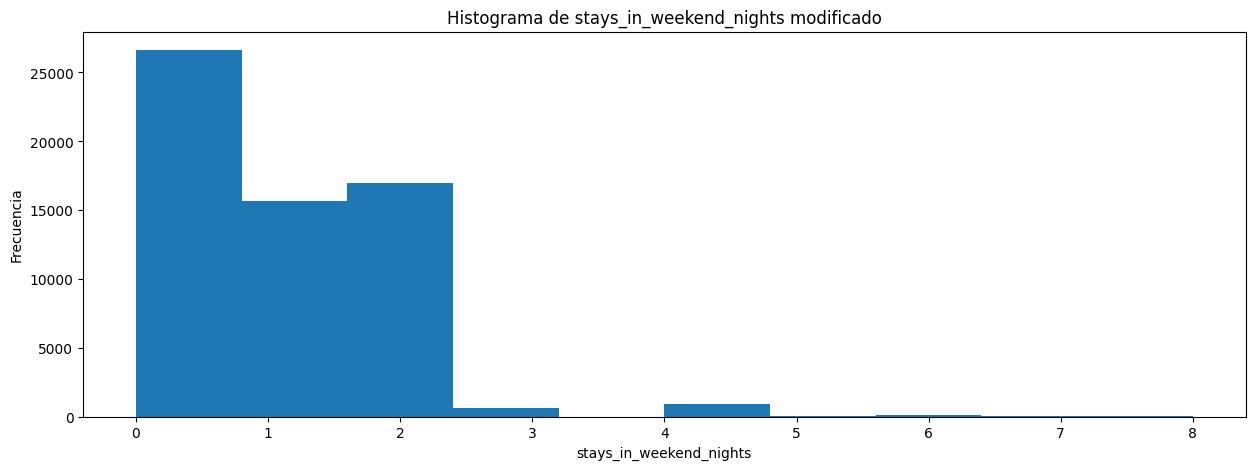

stays_in_week_nights


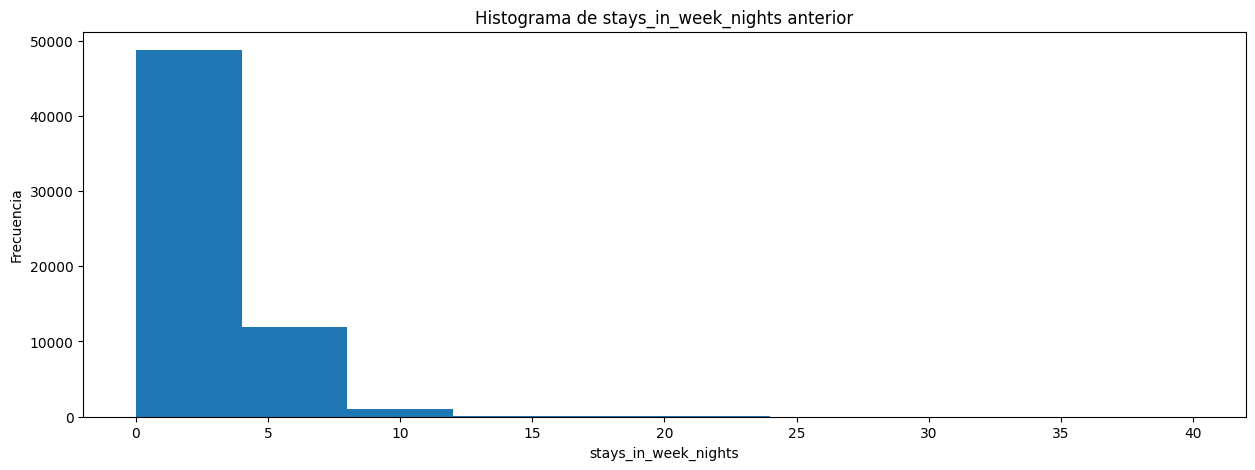

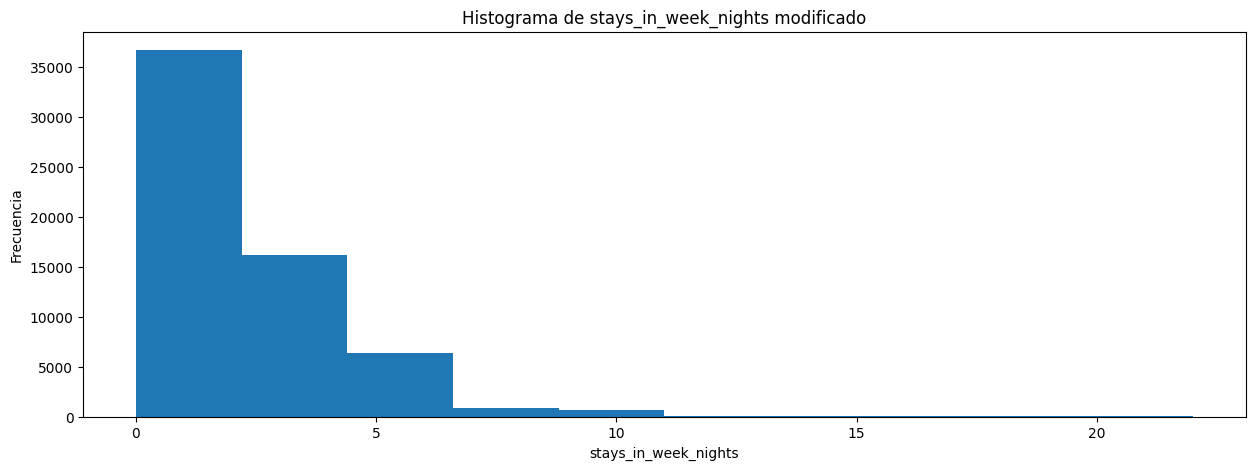

adults


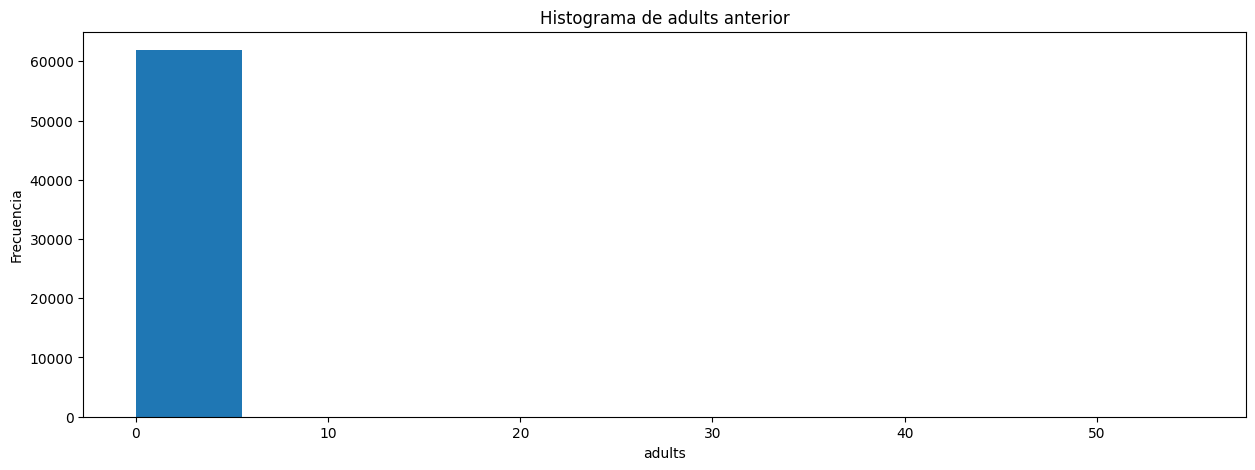

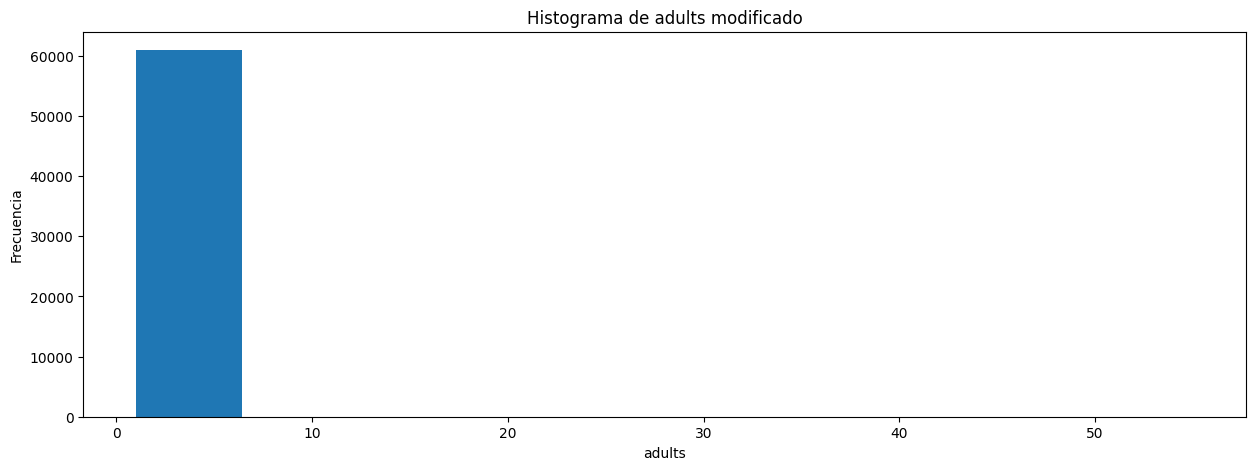

children


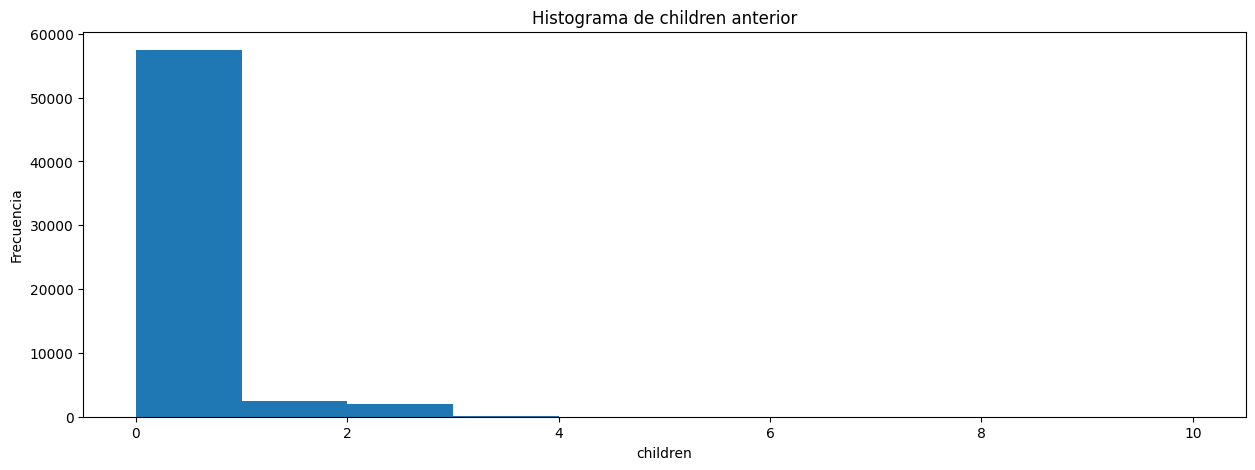

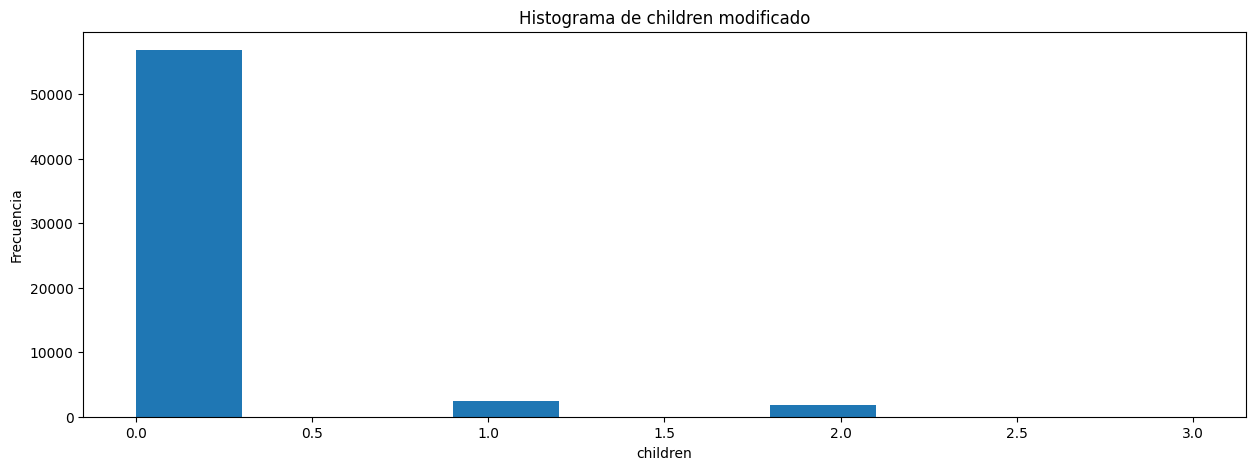

babies


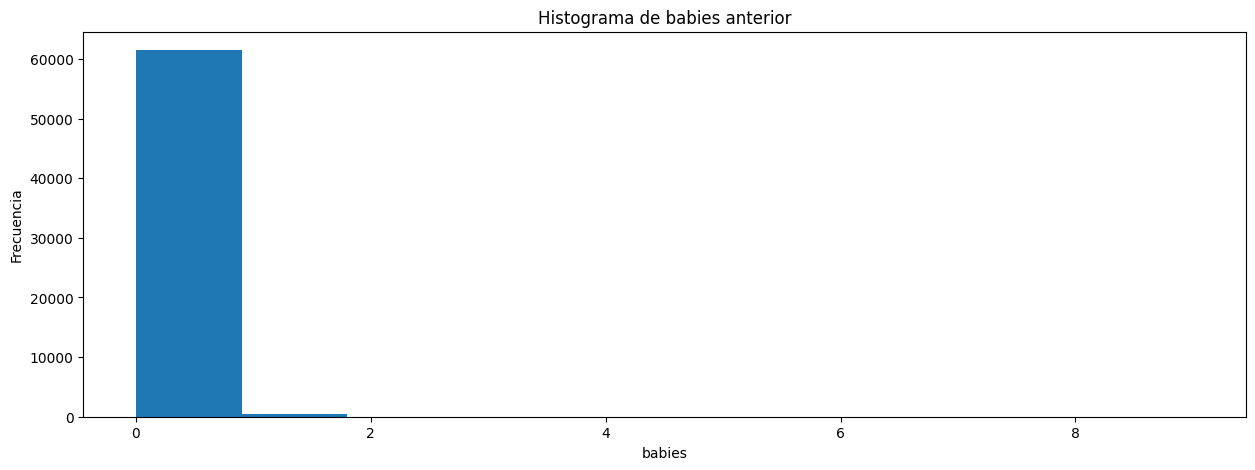

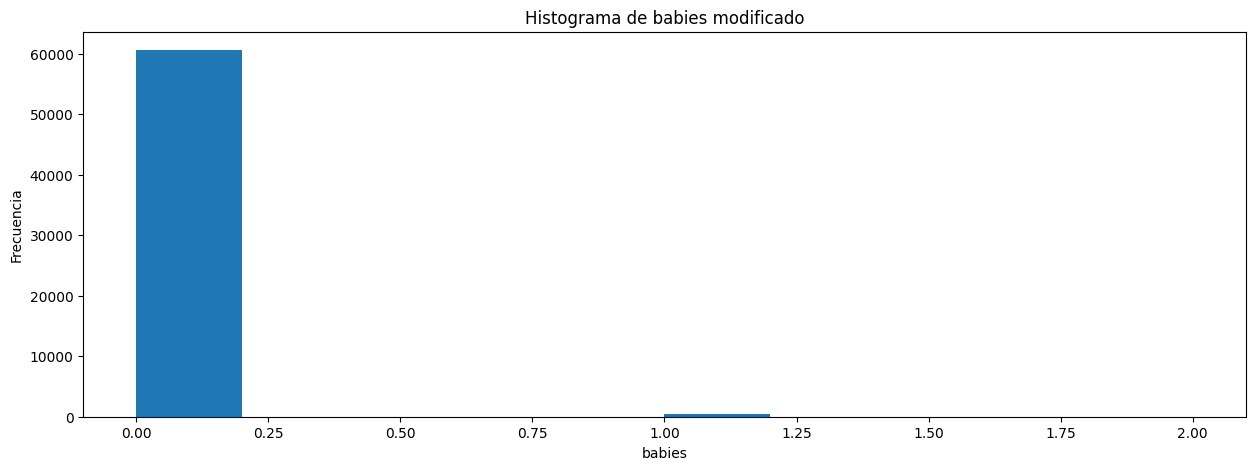

is_repeated_guest


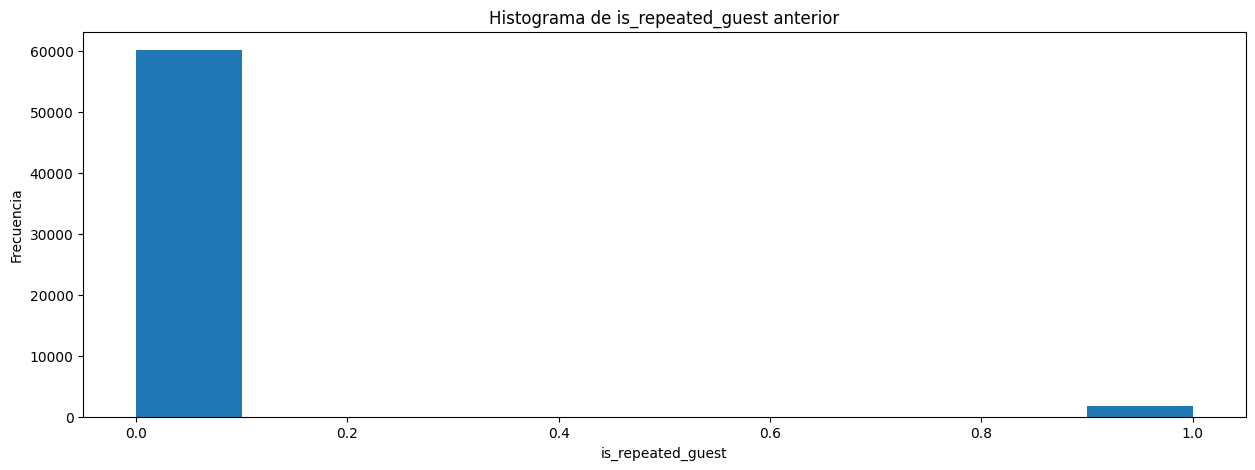

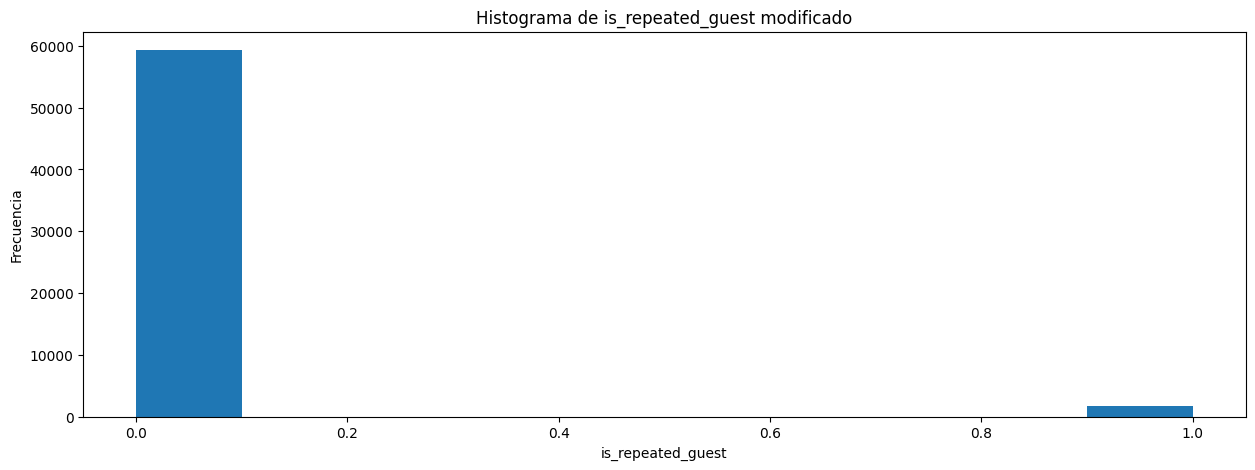

previous_cancellations


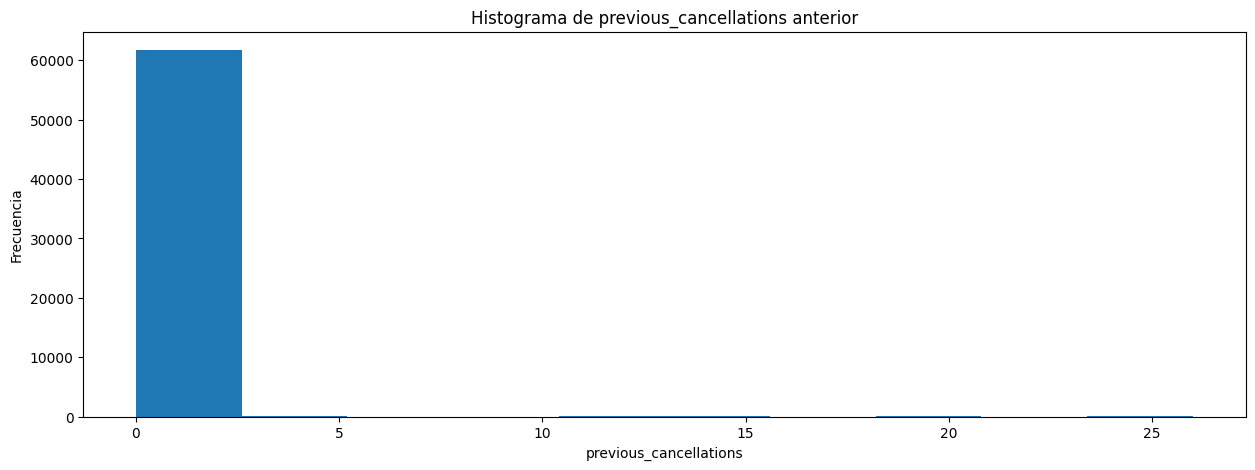

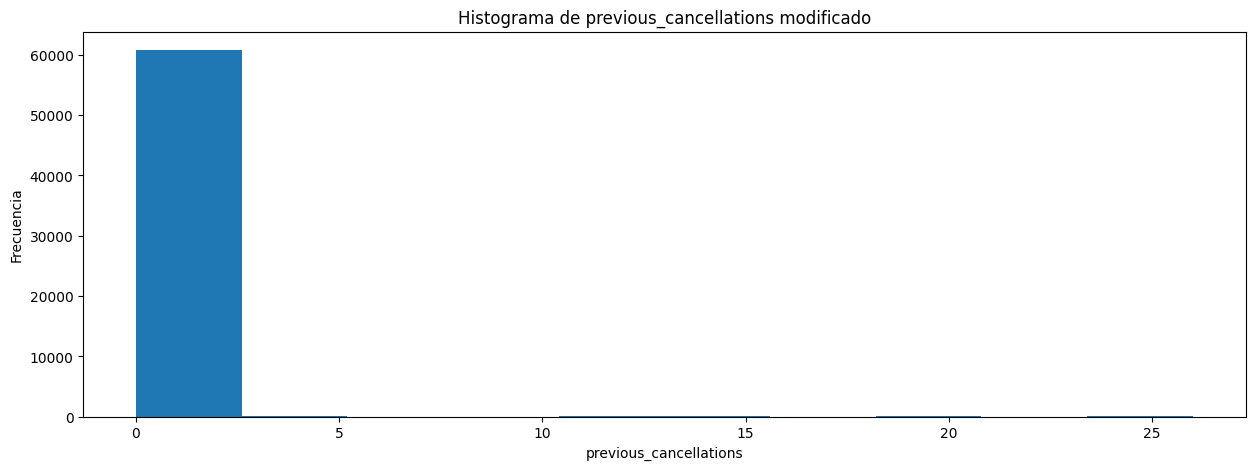

previous_bookings_not_canceled


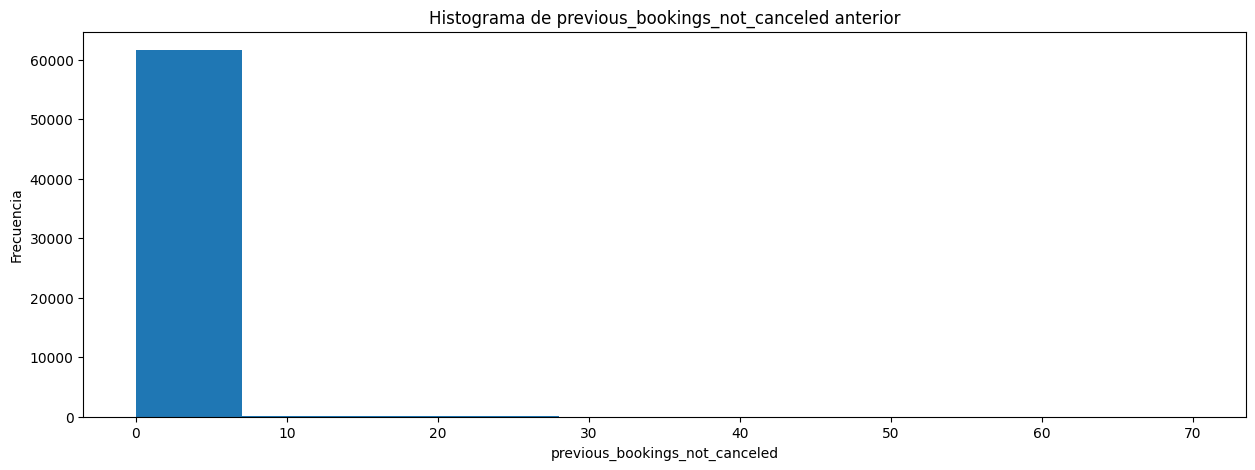

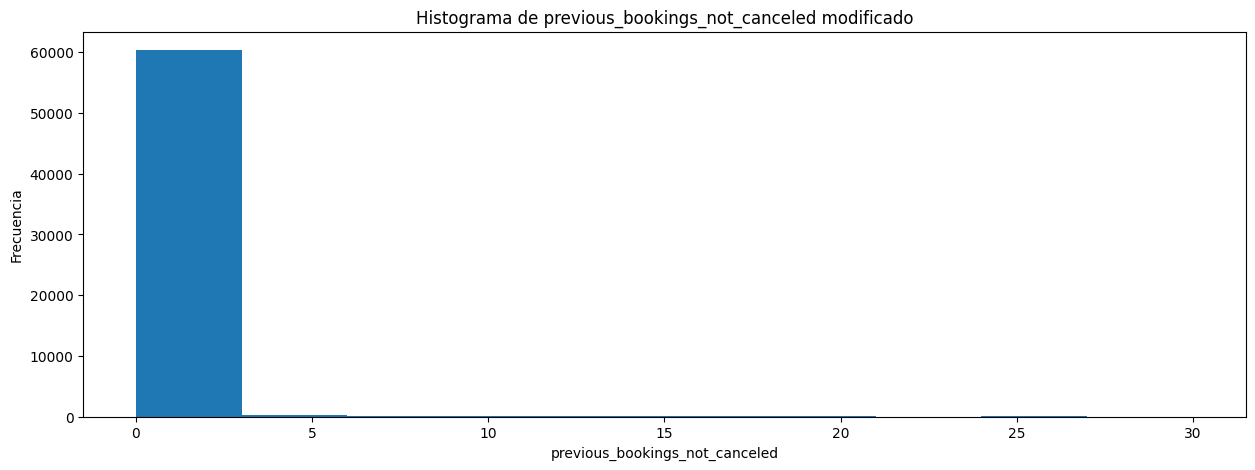

booking_changes


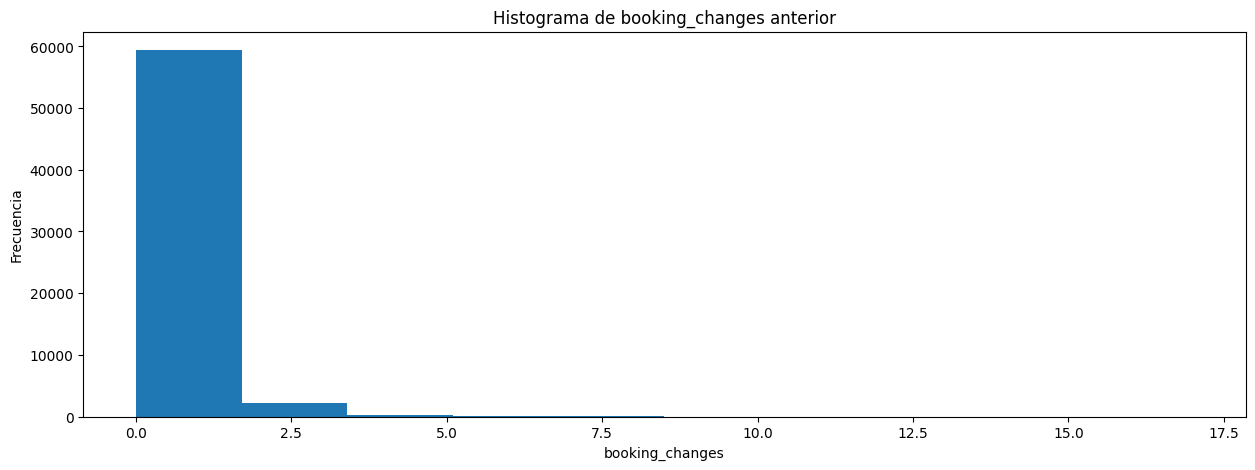

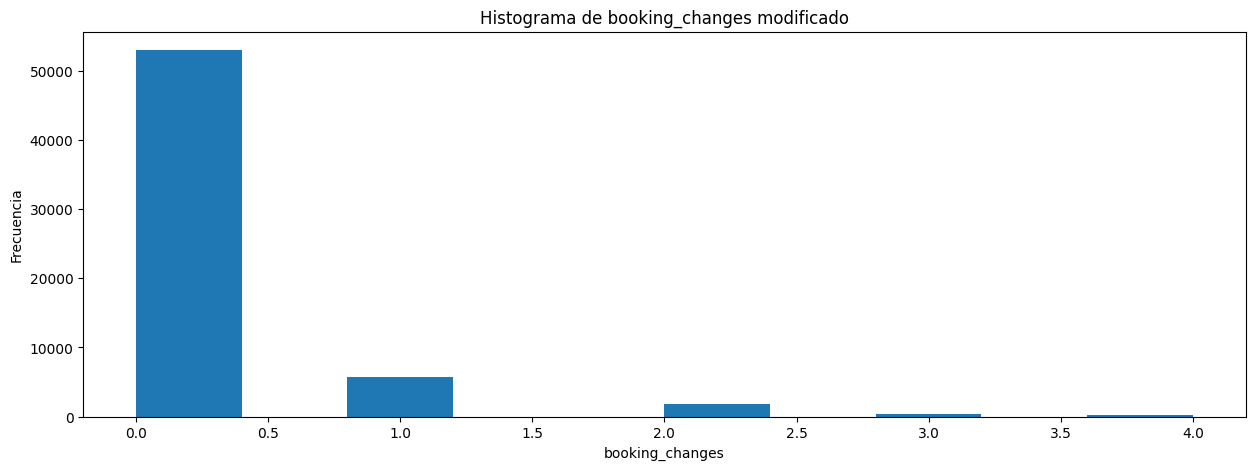

agent


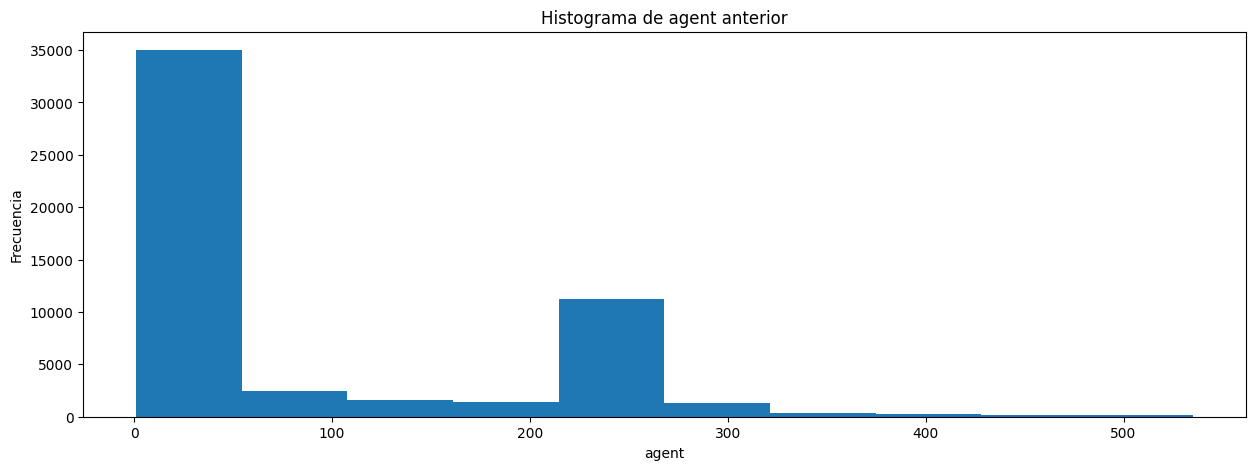

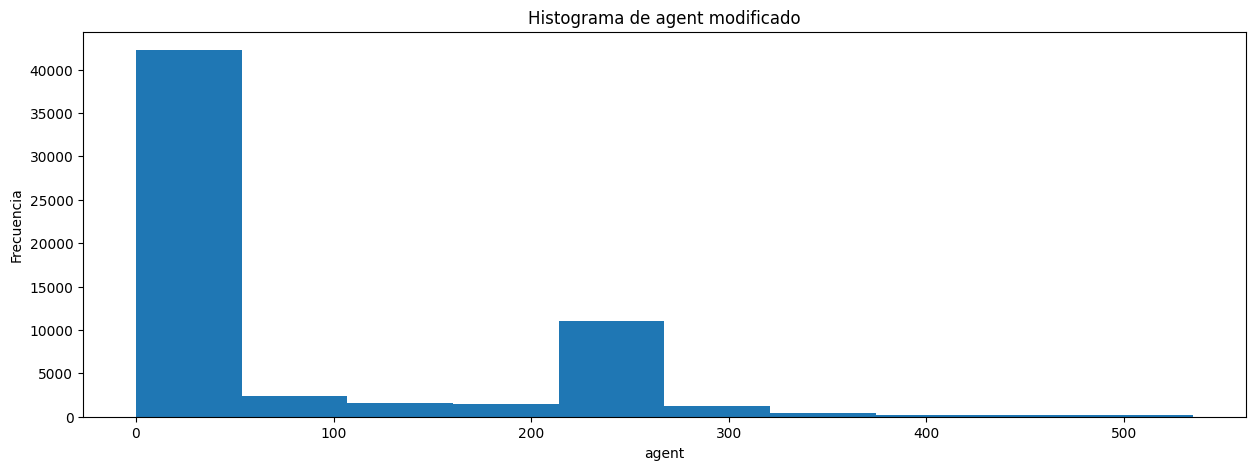

company


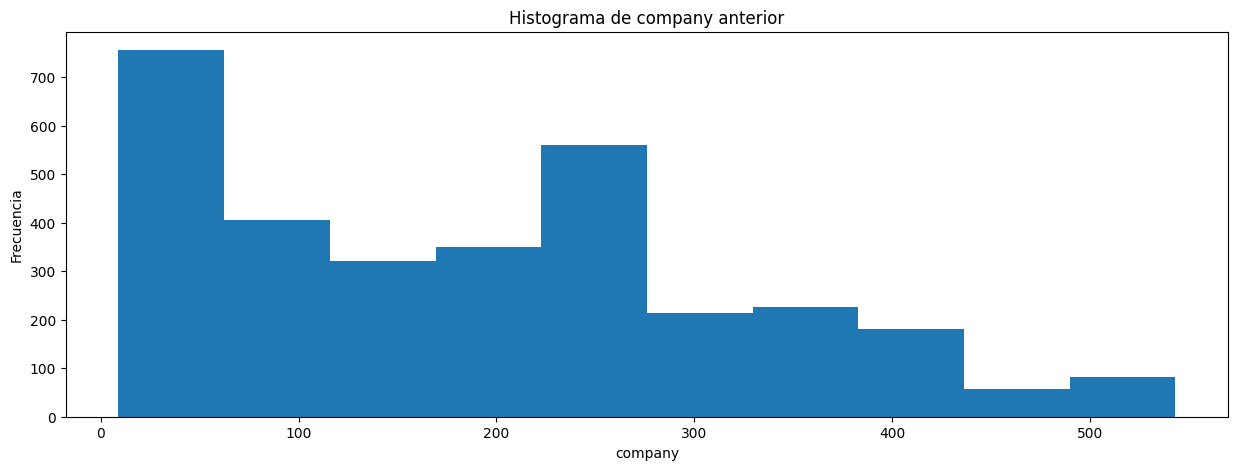

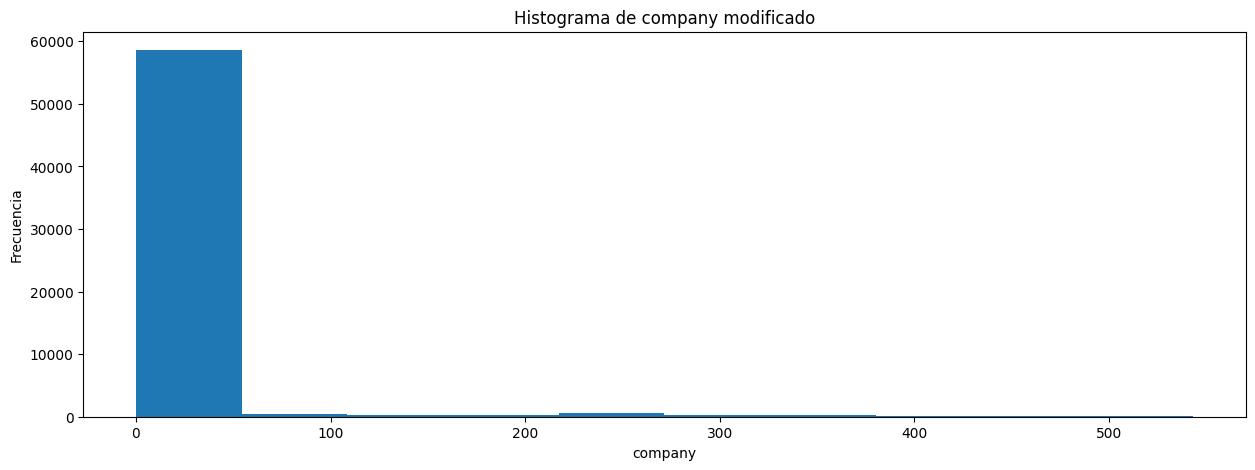

days_in_waiting_list


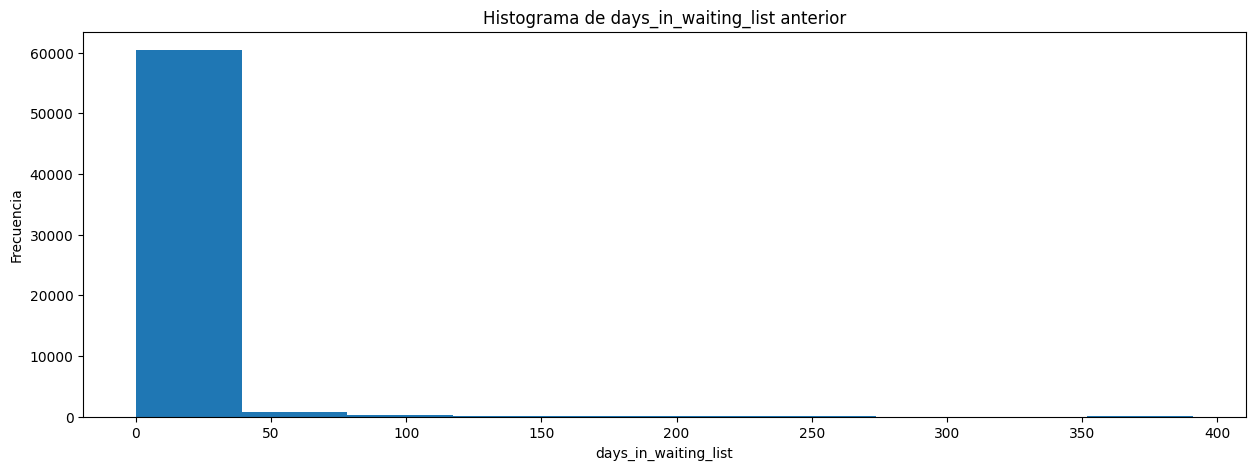

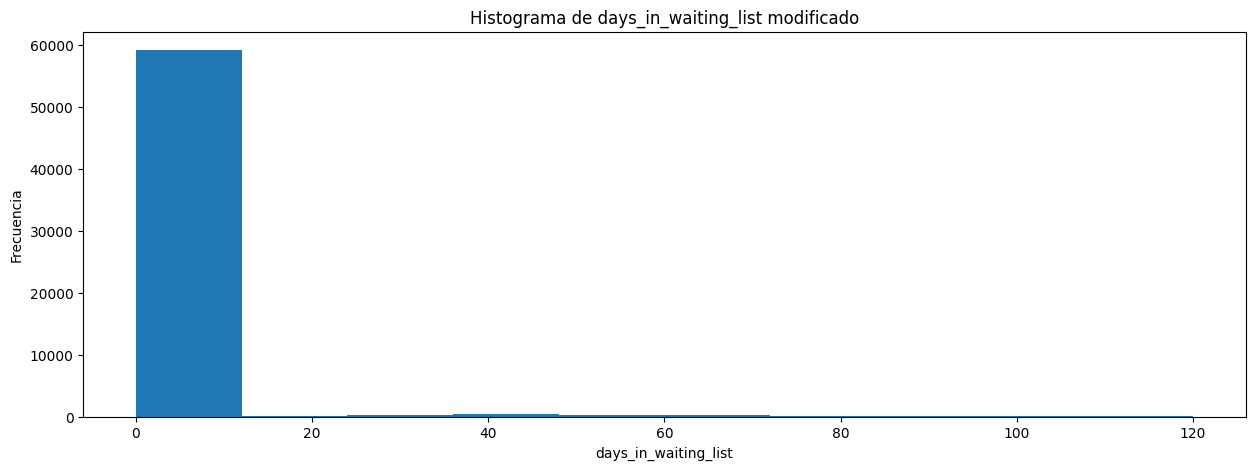

adr


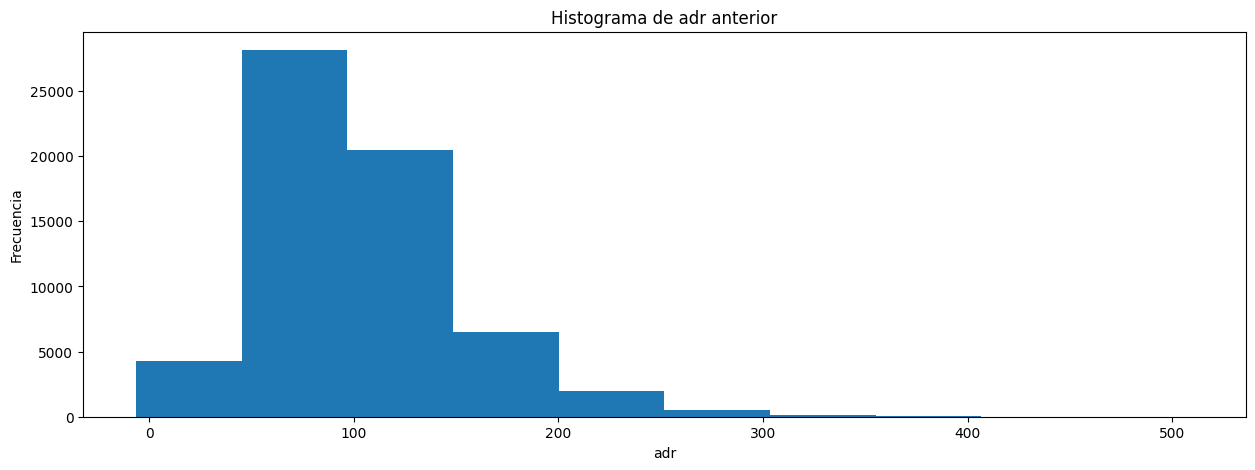

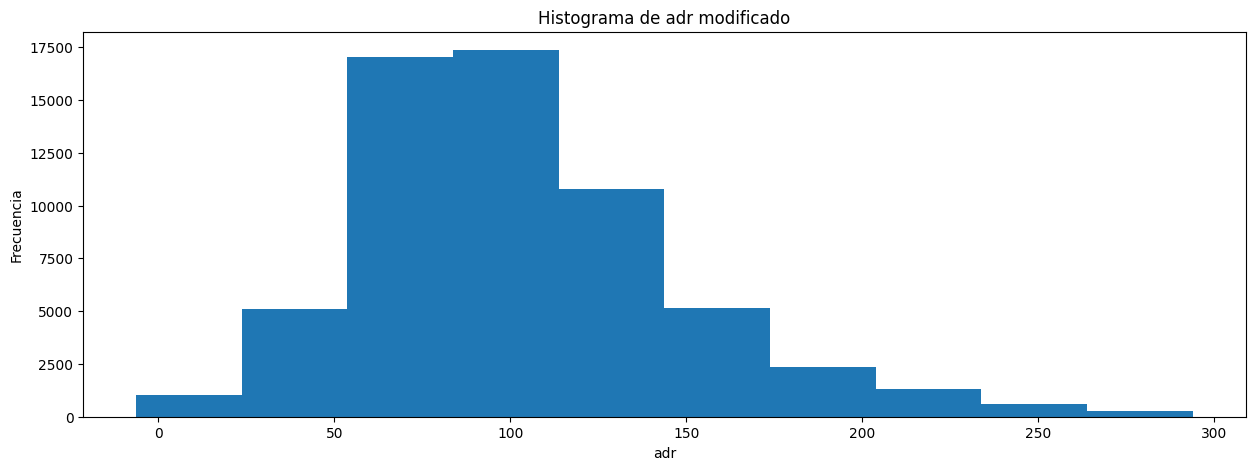

required_car_parking_spaces


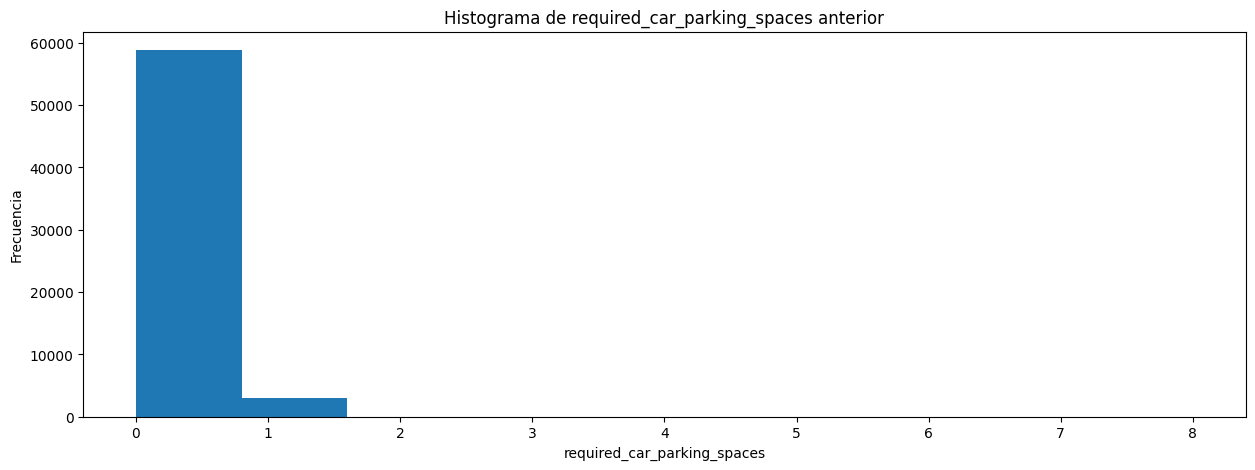

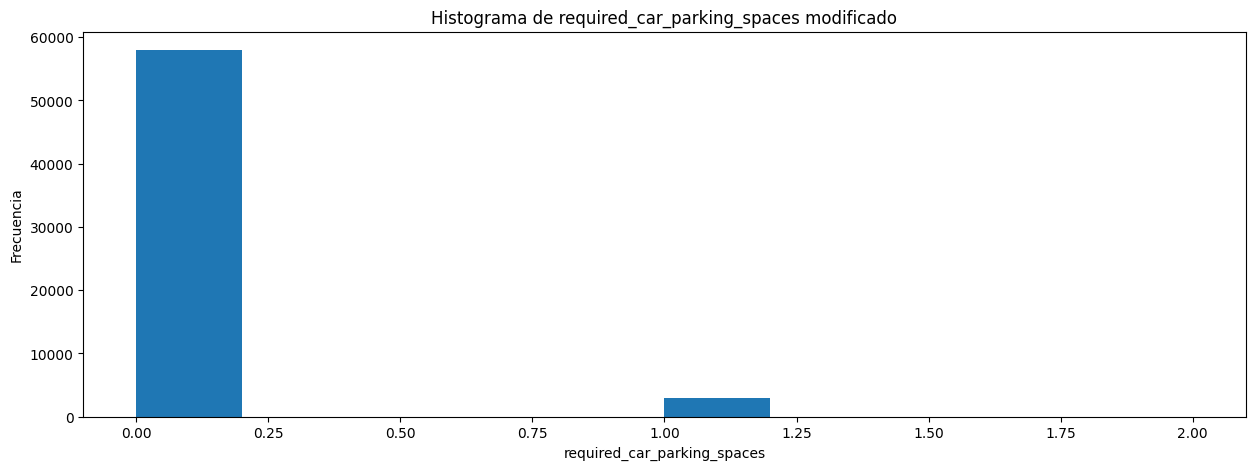

total_of_special_requests


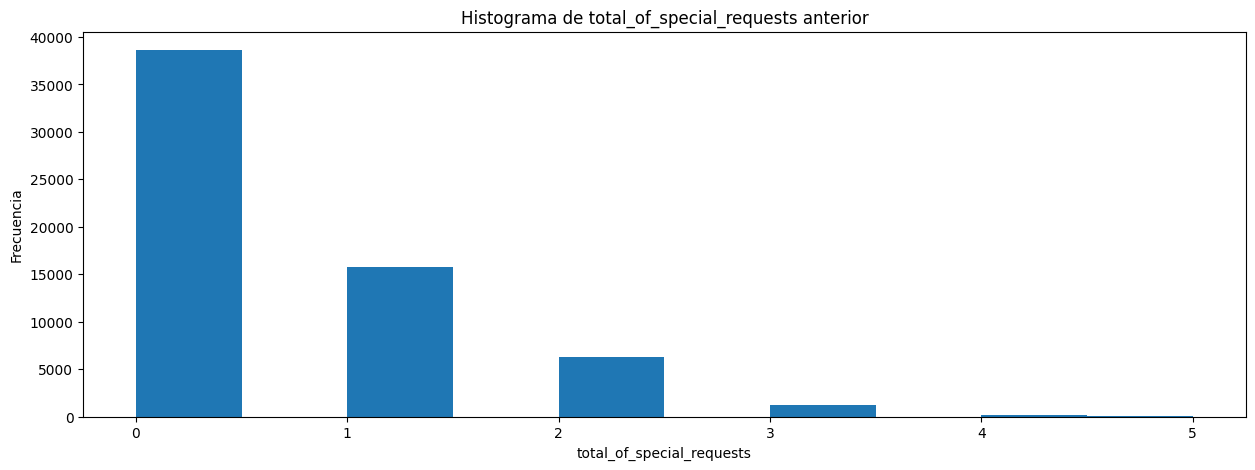

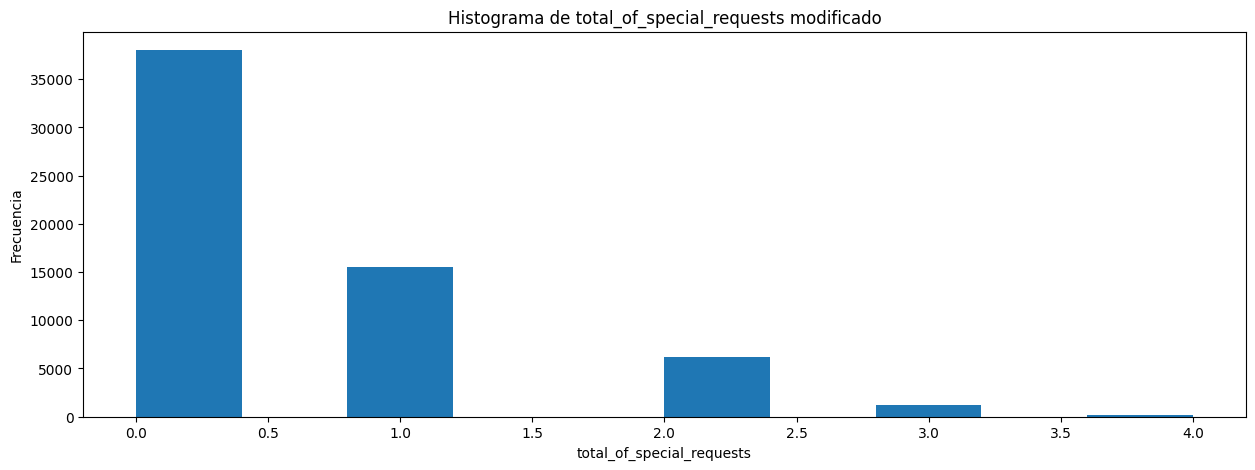

is_canceled


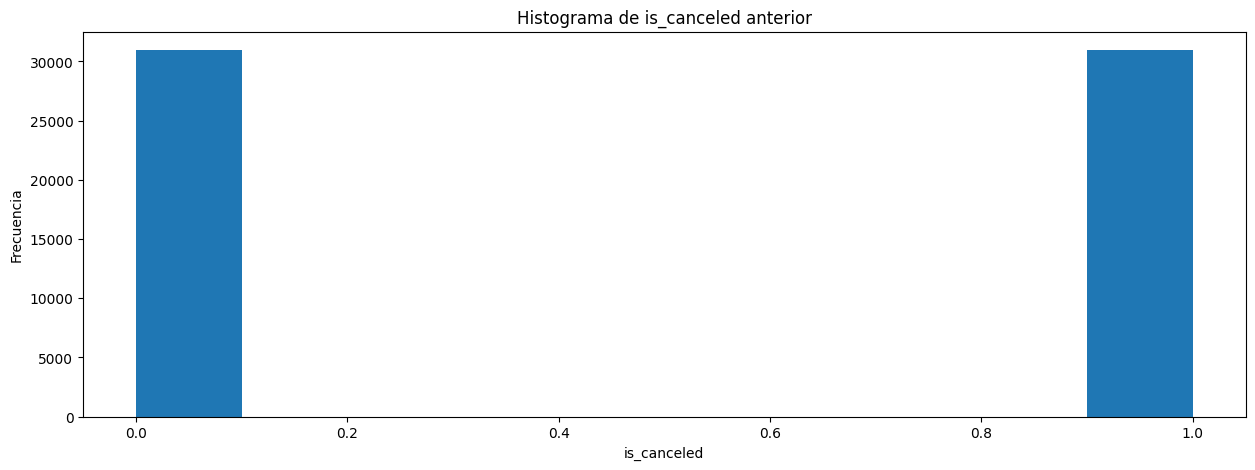

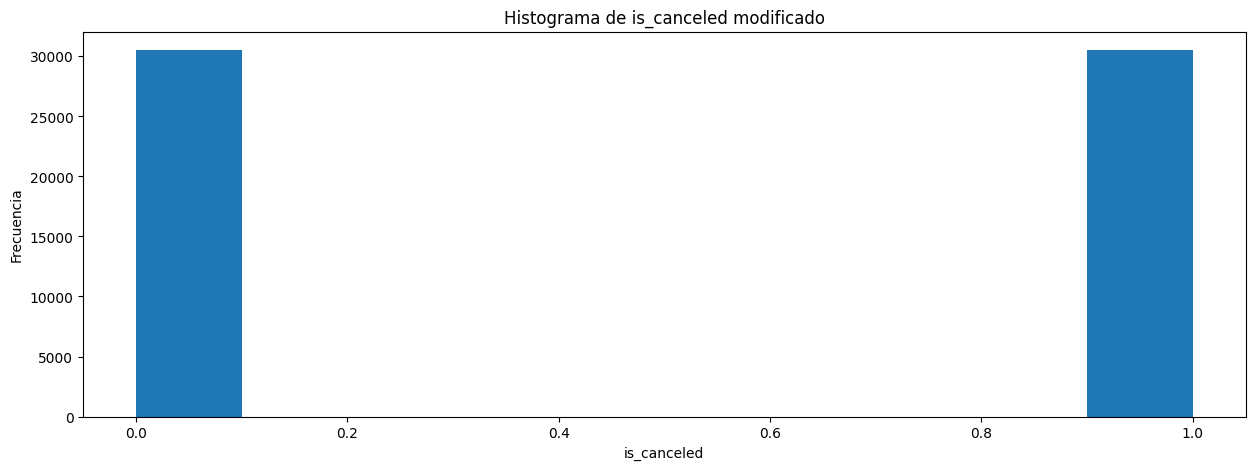

In [184]:
#Distribución antes y despues de la imputación para variables cuantitativas
modifiedColumns = ds_cuantitativas_filtrado.columns.tolist()
for c in modifiedColumns:
  print(c)
  plot_histogram_anterior(dataset, c)
  plot_histogram_modificado(ds_cuantitativas_filtrado, c)

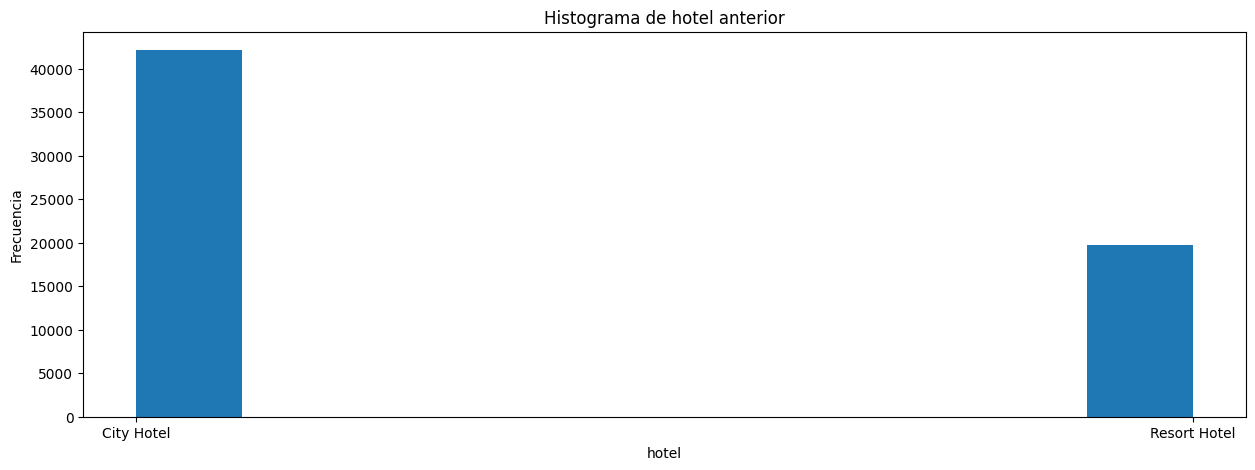

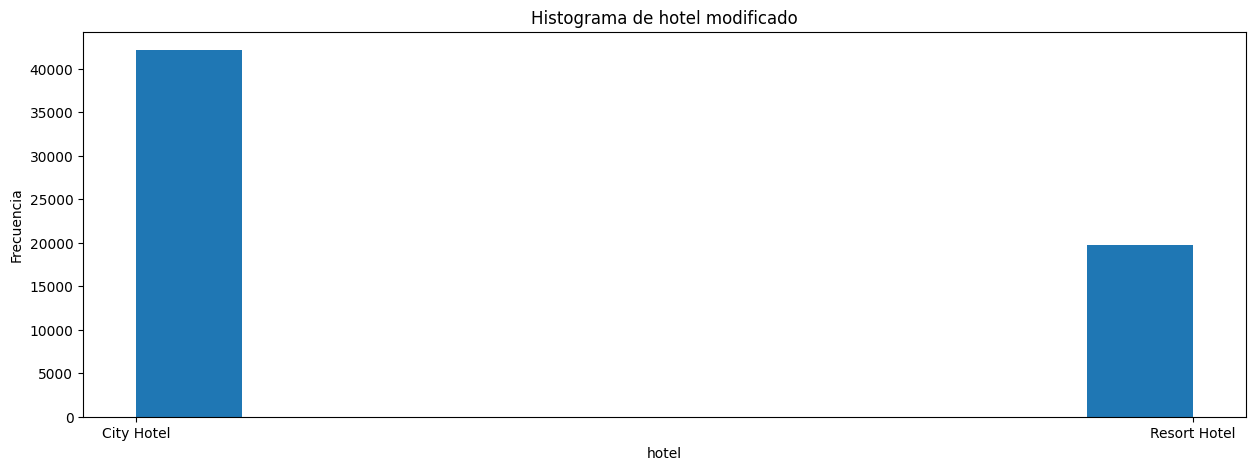

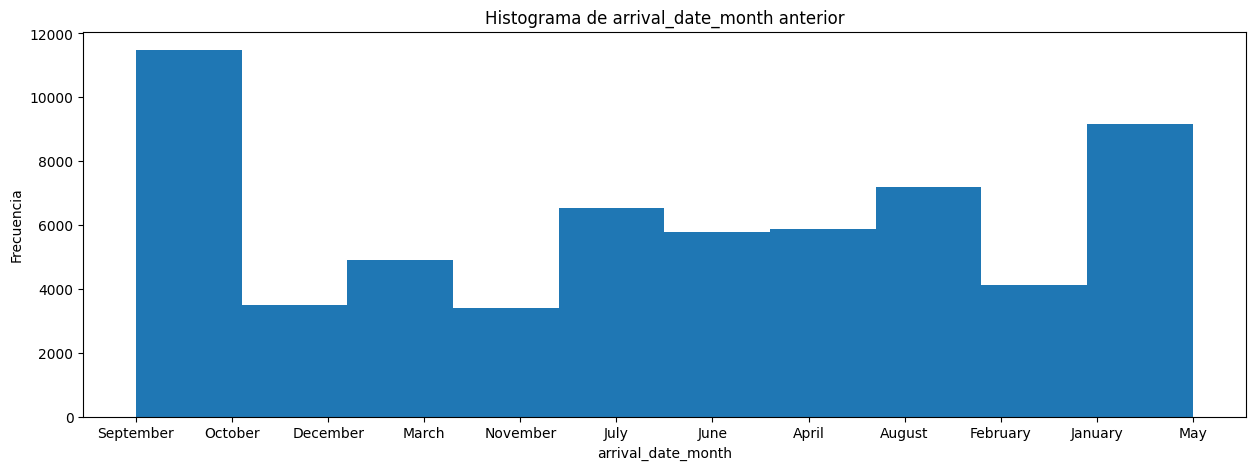

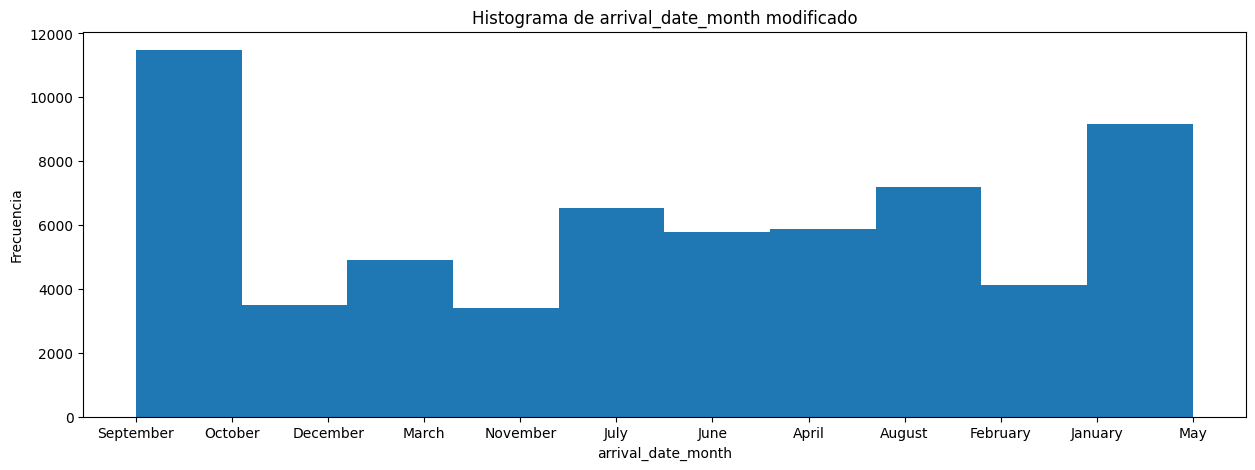

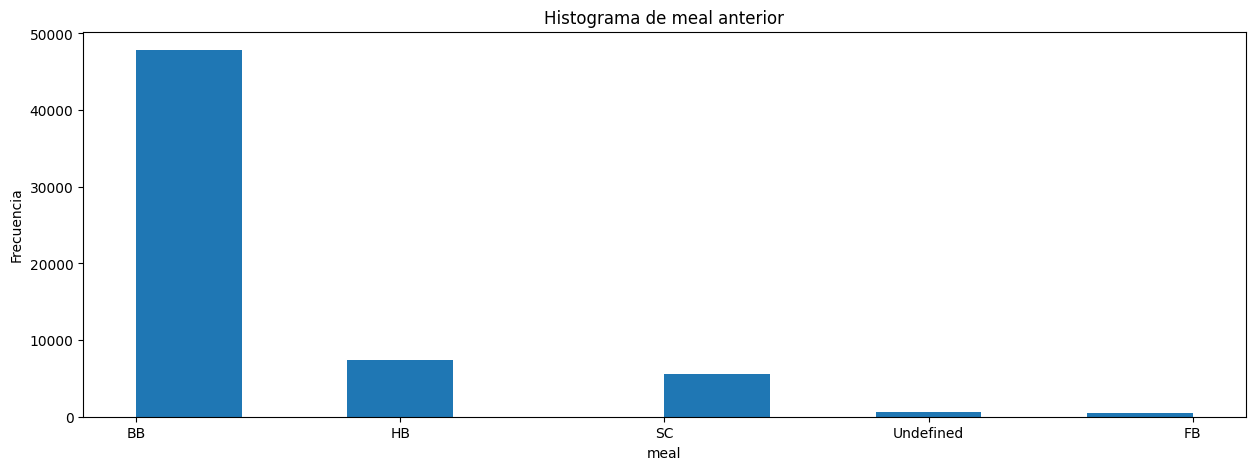

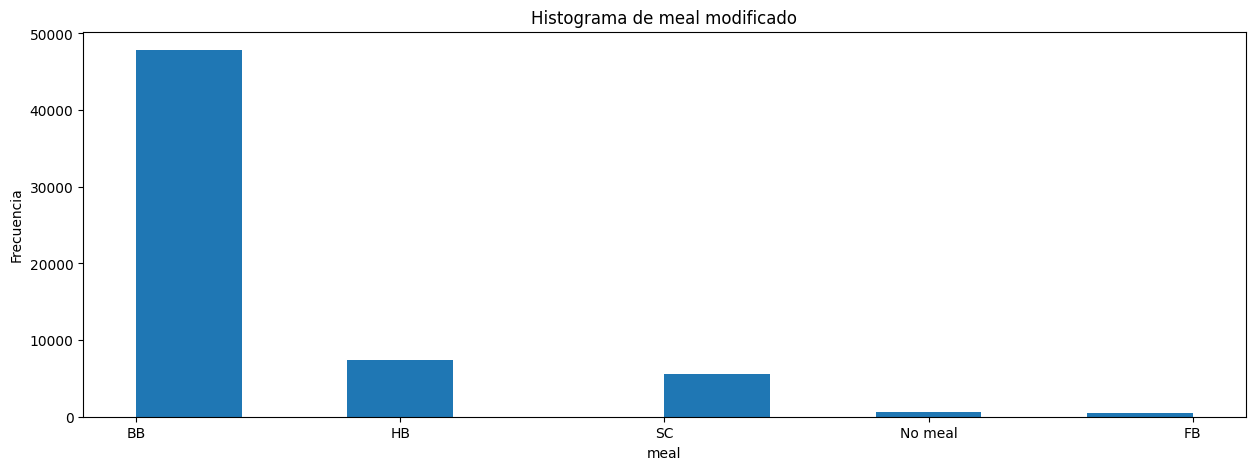

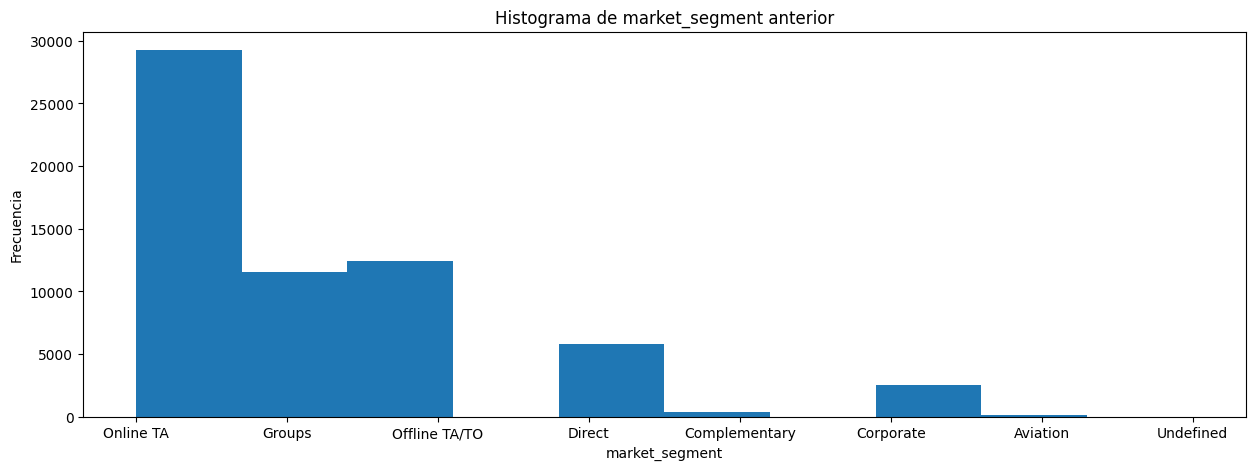

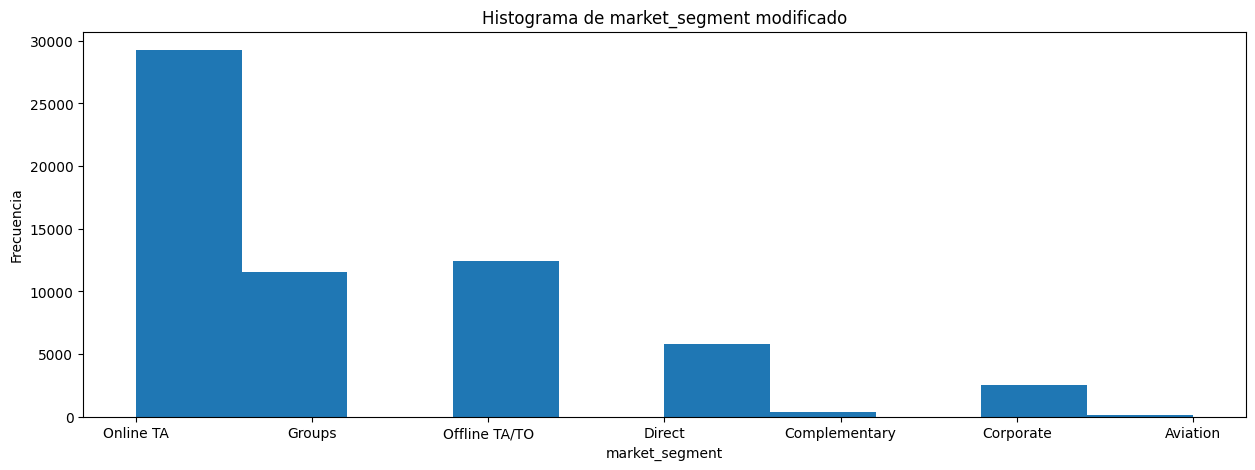

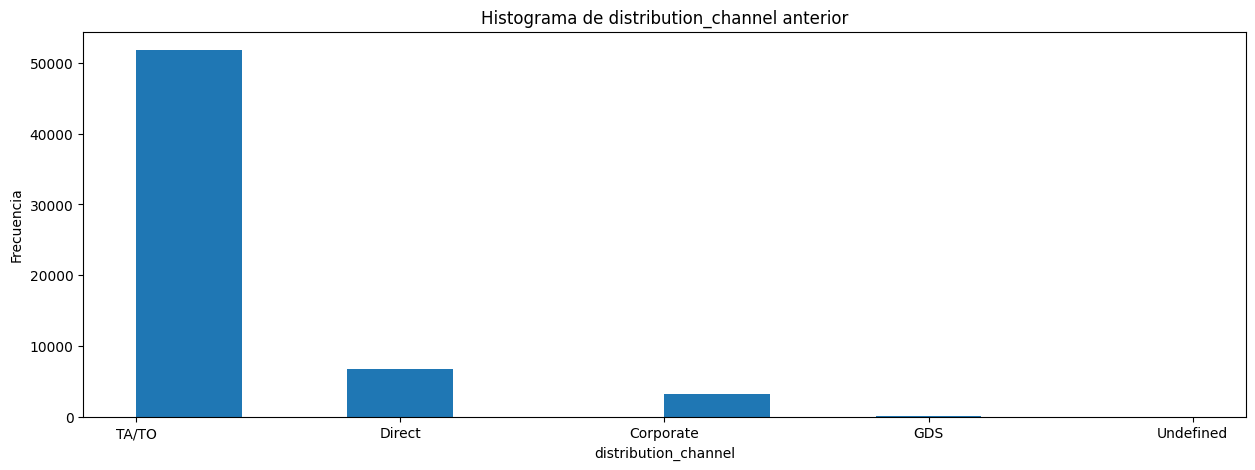

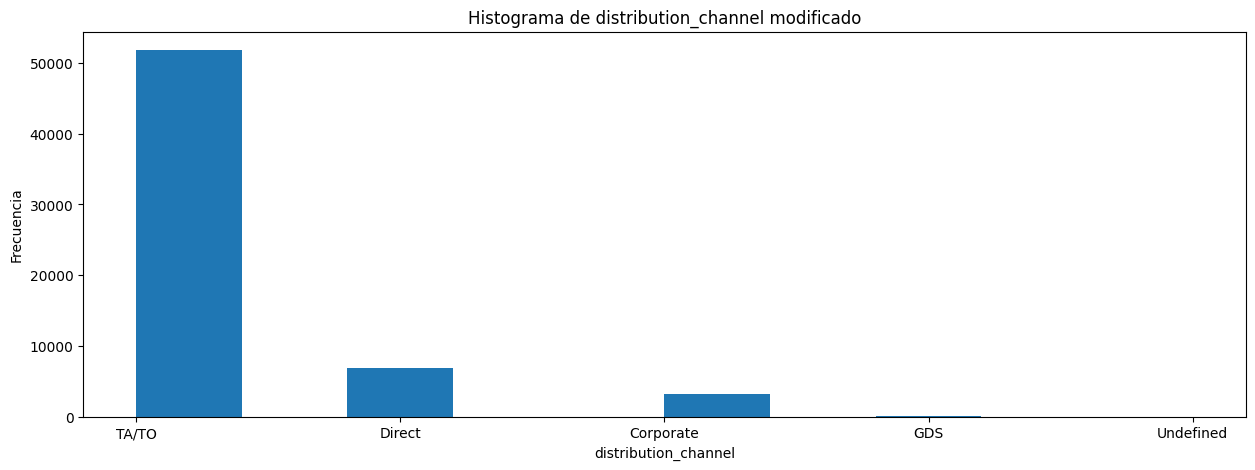

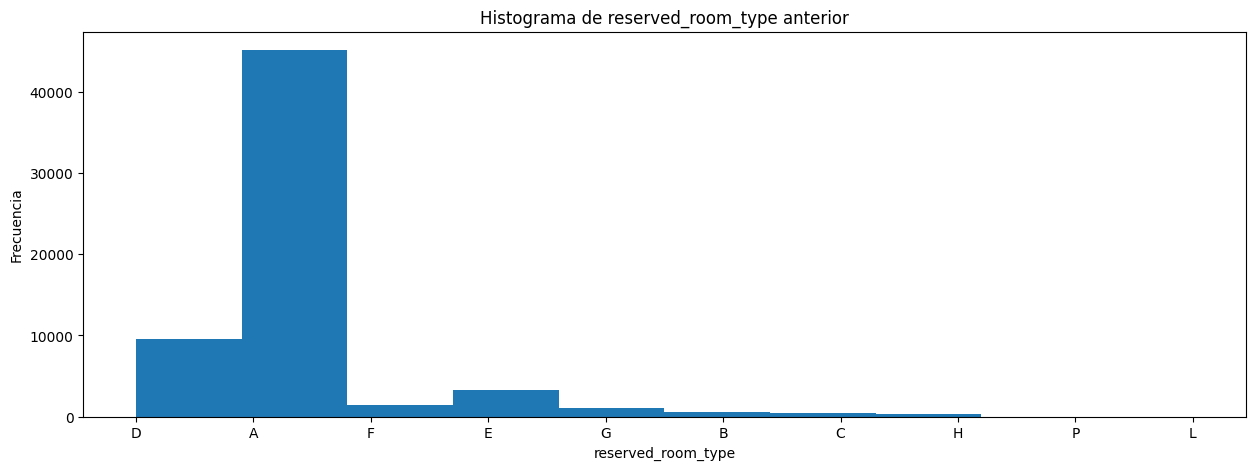

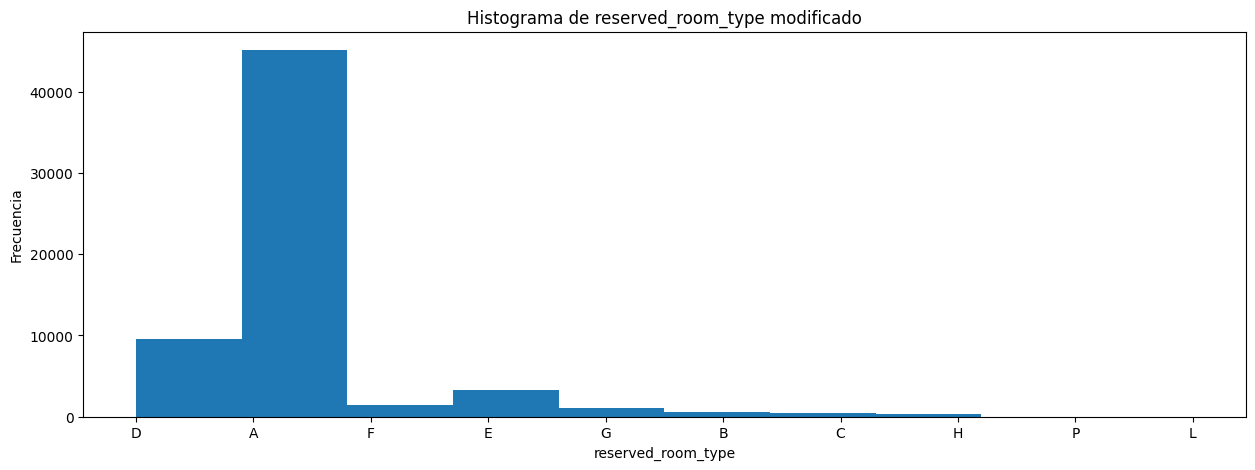

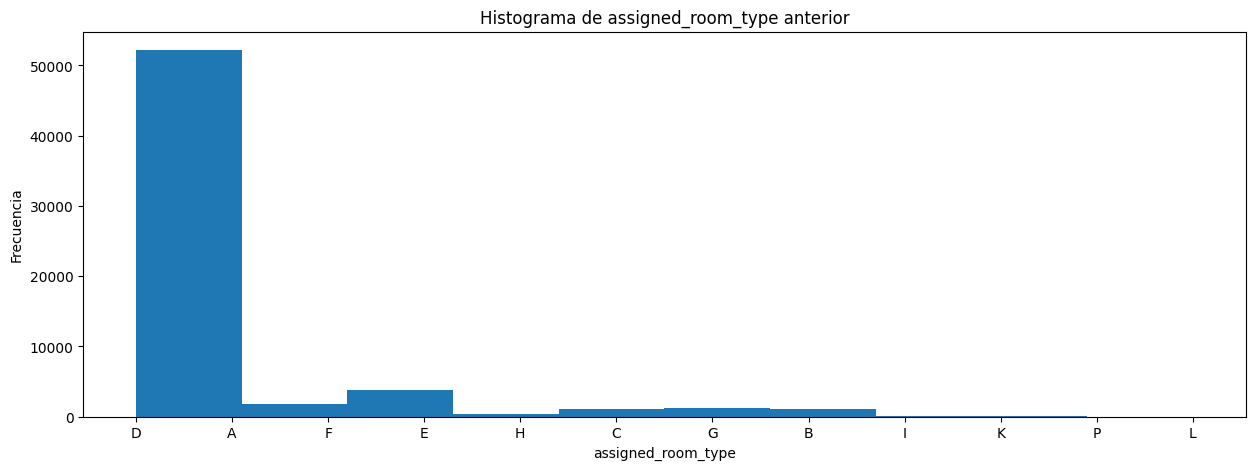

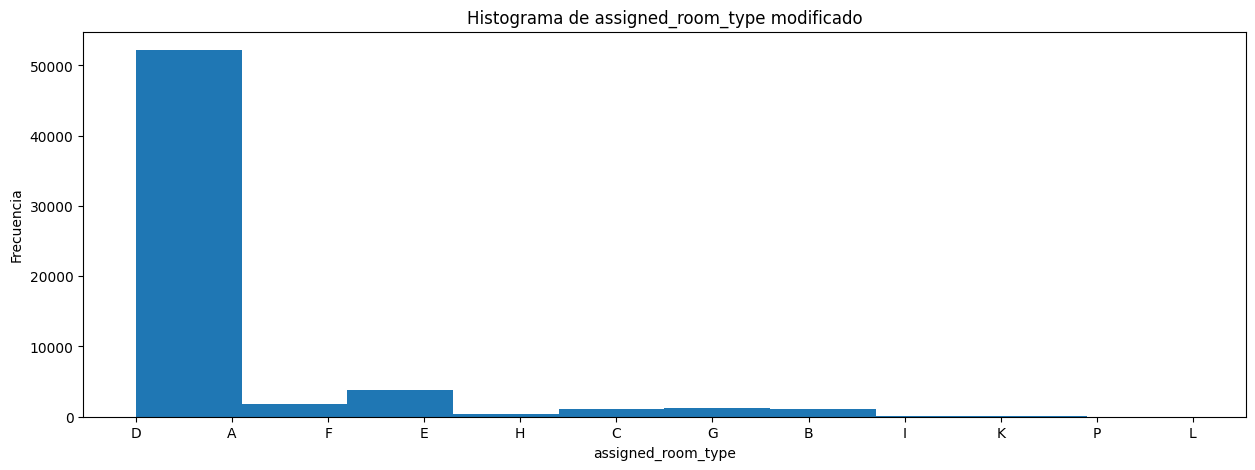

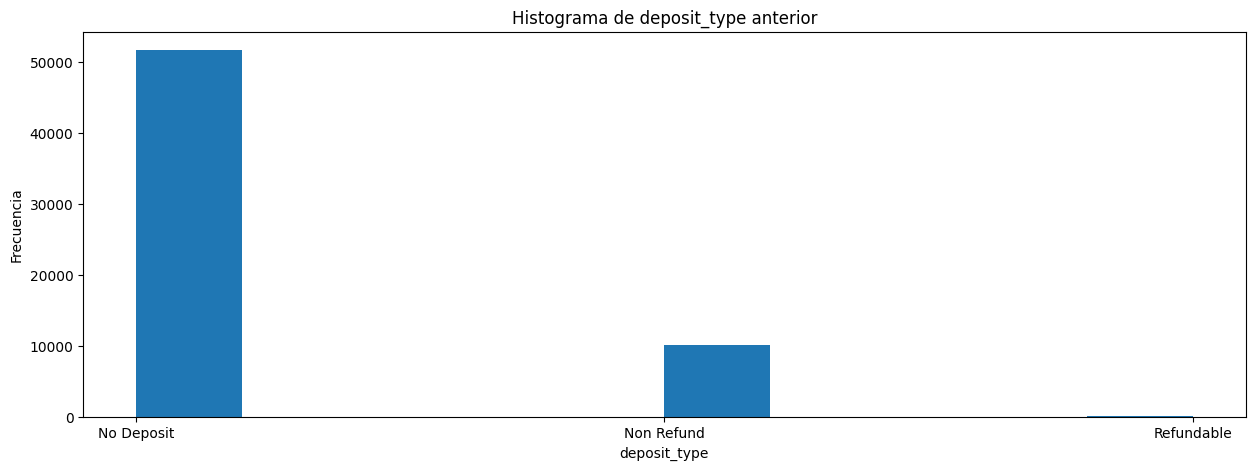

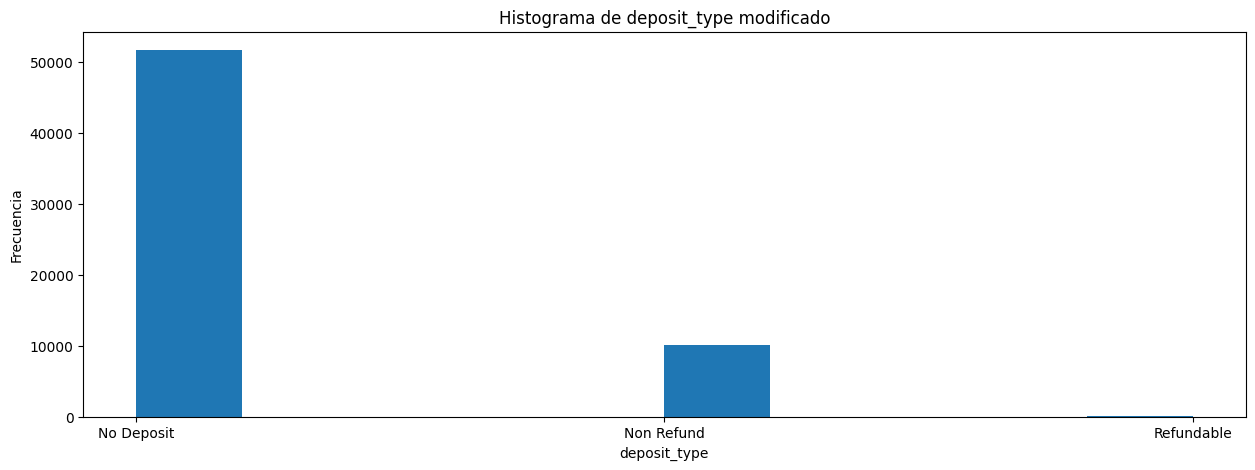

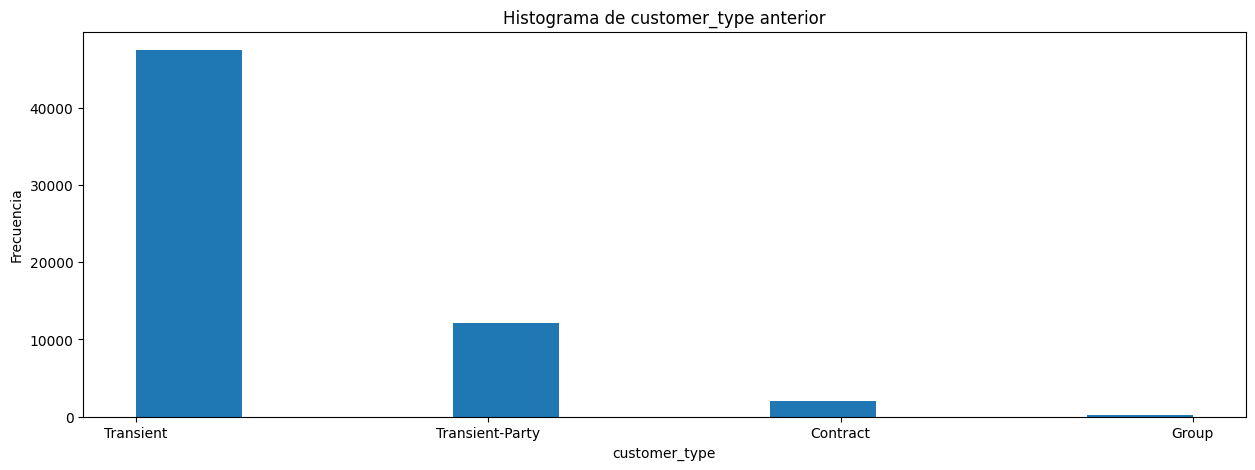

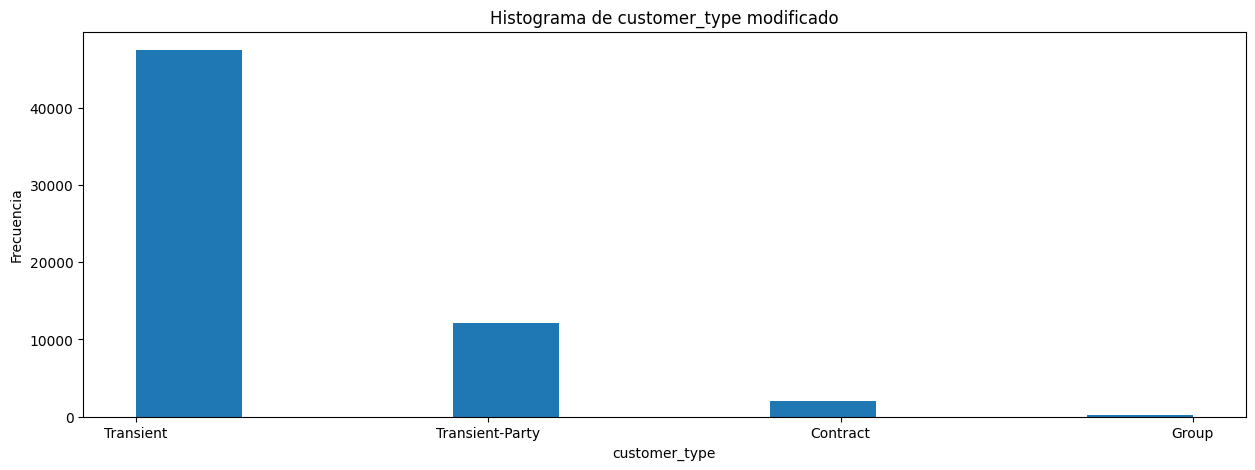

In [185]:
#Distribución antes y despues de la imputación para variables cuantitativas
modifiedColumns = ds_cualitativas_filtrado.columns.tolist()
modifiedColumns.remove('country')
for c in modifiedColumns:
  plot_histogram_anterior(dataset, c)
  print('\n')
  plot_histogram_modificado(ds_cualitativas_filtrado, c)
  print('\n')

Para que se pueda leer los paises graficamos solo el top 10 de más repetidos y se demuestra que Unknown no era parte de la mayoría

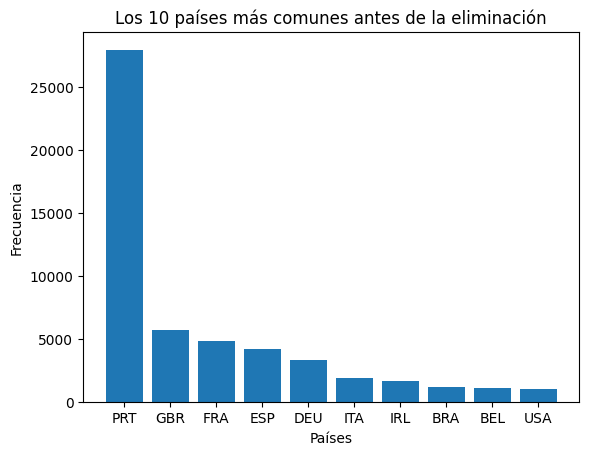

In [186]:
ds_aux=ds_cualitativas.copy()
ds_aux['country']=ds_aux['country'].fillna('Unknown') #Agregamos el valor 'unknown' a los paises que esten vacios para mostrar la distribucion de paises mal cargados.
top_diez_anterior = ds_aux['country'].value_counts().head(10)
top_diez_anterior = top_diez_anterior.reset_index().rename(columns={'index': 'country', 'country': 'count'})

plt.bar(top_diez_anterior['country'], top_diez_anterior['count'])
plt.xlabel('Países')
plt.ylabel('Frecuencia')
plt.title('Los 10 países más comunes antes de la eliminación')
plt.show()

##Reentrega

Aunque arriba también hay cambios acá se concentra la mayor parte

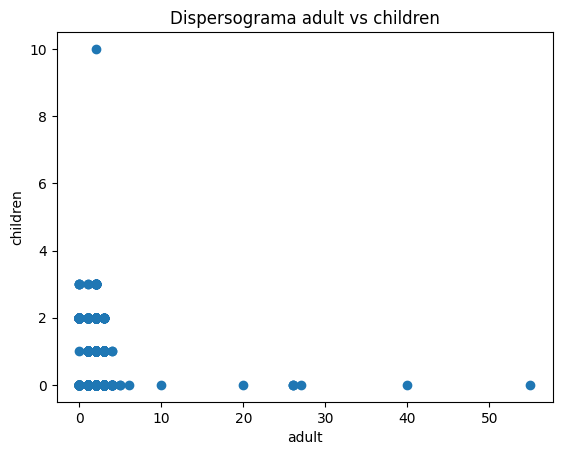

In [187]:
#Scatter Plot
plt.scatter(ds_cuantitativas.adults,ds_cuantitativas.children)
plt.title('Dispersograma adult vs children')
plt.xlabel('adult')
plt.ylabel('children')
plt.show()

In [188]:
def addMahalanobisColumnToDf(df, columns, label):
  cov = np.cov(df[columns].T)
  inv_cov = np.linalg.inv(cov)

  # Calculamos la distancia de Mahalanobis para cada observación
  media = np.mean(df[columns], axis=0)
  dist_mahal = [mahalanobis(row, media, inv_cov) for row in df[columns].values]

  # Añadimos la distancia de Mahalanobis al DataFrame
  df['mahalanobis_'+label] = dist_mahal

In [189]:
# Calculamos la matriz de covarianza y su inversa

dsCuantitativasCopy = ds_cuantitativas_filtrado.copy()
addMahalanobisColumnToDf(dsCuantitativasCopy, ['adults', 'children', 'babies'], 'adultos_infantes')
print(dsCuantitativasCopy['mahalanobis_adultos_infantes'].sort_values().tail(10))


50487    23.516569
48607    23.547107
6675     23.547107
11830    31.259721
59059    41.597701
38305    41.597701
19146    41.597701
55112    43.320711
4064     65.719995
59165    91.565492
Name: mahalanobis_adultos_infantes, dtype: float64


In [190]:
dsMuchosAdultos.index

Int64Index([4064, 11830, 19146, 35477, 38305, 55112, 59059, 59165], dtype='int64')

Estos son las observaciones de adultos que arrivba decidimos no eliminar (ver justificación) por lo tanto vamos a excluirlos del análisis de la distancia de mahalanobis

In [191]:
#dsCuantitativasCopy[dsCuantitativasCopy[]].sort_values().tail(10)
#dsCuantitativasCopy.loc[~dsCuantitativasCopy.index.isin(dsMuchosAdultos.index)]['mahalanobis_1'].sort_values().tail(10)
dsCuantitativasCopy.loc[(~dsCuantitativasCopy.index.isin(dsMuchosAdultos.index)) & (dsCuantitativasCopy['mahalanobis_adultos_infantes'] > 10)].sort_values('mahalanobis_adultos_infantes', ascending=False).head(10)

lead_time  arrival_date_year  arrival_date_week_number  \
6675          13               2017                        11   
48607          4               2016                        10   
38639         21               2015                        28   
47353         11               2016                        39   
14391          1               2017                        24   
47646        345               2016                        36   
50487        116               2016                        27   
10515          7               2015                        40   
17992         15               2015                        51   
49072          4               2015                        50   

       arrival_date_day_of_month  stays_in_weekend_nights  \
6675                          18                        0   
48607                         28                        1   
38639                         10                        2   
47353                         20                        0   
14391                         11                        2   
47646                          1                        2   
50487                         26                        3   
10515                          2                        0   
17992                         17                        0   
49072                         11                        0   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  ...  \
6675                      1       2       1.0       2                  0  ...   
48607                     0       2       1.0       2                  0  ...   
38639                     3       2       0.0       2                  0  ...   
47353                     2       2       0.0       2                  0  ...   
14391                     0       2       0.0       2                  0  ...   
47646                     7       2       0.0       2                  0  ...   
50487                     5       2       0.0       2                  0  ...   
10515                     1       2       2.0       1                  0  ...   
17992                     2       2       2.0       1                  0  ...   
49072                     1       2       2.0       1                  0  ...   

       previous_bookings_not_canceled  booking_changes  agent  company  \
6675                                0                3   14.0      0.0   
48607                               0                0    0.0      0.0   
38639                               0                1  250.0      0.0   
47353                               0                1    9.0      0.0   
14391                               0                1  240.0      0.0   
47646                               0                2  240.0      0.0   
50487                               0                0  250.0      0.0   
10515                               0                0    0.0      0.0   
17992                               0                1    0.0      0.0   
49072                               0                0   45.0      0.0   

       days_in_waiting_list     adr  required_car_parking_spaces  \
6675                      0  152.00                            1   
48607                     0  226.00                            0   
38639                     0  165.00                            1   
47353                     0  248.00                            0   
14391                     0  201.00                            1   
47646                     0  145.00                            0   
50487                     0  145.88                            0   
10515                     0  127.00                            0   
17992                     0    0.00                            0   
49072                     0    0.00                            0   

       total_of_special_requests  is_canceled  mahalanobis_adultos_infantes  
6675                           2            0                     23.547107  
48607  

Los casos con mayor distancia de Mahalanobis ($\approx$ 23) observamos que los valores no se encuentran fuera de lo comun (El peor de los casos tienen 2 adultos y 3 menores (children y babies)) por lo tanto decidimos no eliminarlos

In [192]:
ds_cuantitativas.head()

lead_time  arrival_date_year  arrival_date_week_number  \
0         49               2016                        37   
1          4               2015                        44   
2         25               2016                        42   
3         26               2016                        51   
4        104               2017                        12   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          5                        1                     2   
1                         31                        0                     1   
2                         13                        0                     1   
3                         12                        2                     5   
4                         19                        2                     5   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       1       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       2       2.0       0                  0                       0   
3       2       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes  agent  company  \
0                               0                0    9.0      NaN   
1                               0                0    NaN      NaN   
2                               0                0    9.0      NaN   
3                               0                0  154.0      NaN   
4                               0                0   20.0      NaN   

   days_in_waiting_list    adr  required_car_parking_spaces  \
0                     0  115.5                            0   
1                     0   42.0                            1   
2                     0  229.0                            0   
3                     0   75.0                            0   
4                     0   75.0                            0   

   total_of_special_requests  is_canceled  
0                          1            1  
1                          0            0  
2                          2            0  
3                          0            1  
4                          1            0

In [193]:
dsCuantitativasCopy.loc[(~dsCuantitativasCopy.index.isin(dsMuchosAdultos.index)) & (dsCuantitativasCopy['mahalanobis_adultos_infantes'] > 10)].sort_values('mahalanobis_adultos_infantes', ascending=False).head(10)

lead_time  arrival_date_year  arrival_date_week_number  \
6675          13               2017                        11   
48607          4               2016                        10   
38639         21               2015                        28   
47353         11               2016                        39   
14391          1               2017                        24   
47646        345               2016                        36   
50487        116               2016                        27   
10515          7               2015                        40   
17992         15               2015                        51   
49072          4               2015                        50   

       arrival_date_day_of_month  stays_in_weekend_nights  \
6675                          18                        0   
48607                         28                        1   
38639                         10                        2   
47353                         20                        0   
14391                         11                        2   
47646                          1                        2   
50487                         26                        3   
10515                          2                        0   
17992                         17                        0   
49072                         11                        0   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  ...  \
6675                      1       2       1.0       2                  0  ...   
48607                     0       2       1.0       2                  0  ...   
38639                     3       2       0.0       2                  0  ...   
47353                     2       2       0.0       2                  0  ...   
14391                     0       2       0.0       2                  0  ...   
47646                     7       2       0.0       2                  0  ...   
50487                     5       2       0.0       2                  0  ...   
10515                     1       2       2.0       1                  0  ...   
17992                     2       2       2.0       1                  0  ...   
49072                     1       2       2.0       1                  0  ...   

       previous_bookings_not_canceled  booking_changes  agent  company  \
6675                                0                3   14.0      0.0   
48607                               0                0    0.0      0.0   
38639                               0                1  250.0      0.0   
47353                               0                1    9.0      0.0   
14391                               0                1  240.0      0.0   
47646                               0                2  240.0      0.0   
50487                               0                0  250.0      0.0   
10515                               0                0    0.0      0.0   
17992                               0                1    0.0      0.0   
49072                               0                0   45.0      0.0   

       days_in_waiting_list     adr  required_car_parking_spaces  \
6675                      0  152.00                            1   
48607                     0  226.00                            0   
38639                     0  165.00                            1   
47353                     0  248.00                            0   
14391                     0  201.00                            1   
47646                     0  145.00                            0   
50487                     0  145.88                            0   
10515                     0  127.00                            0   
17992                     0    0.00                            0   
49072                     0    0.00                            0   

       total_of_special_requests  is_canceled  mahalanobis_adultos_infantes  
6675                           2            0                     23.547107  
48607  

stays_in_weekend_nights y stays_in_week_nights

Quisimos hacer un analisis multivariado de estas variables pero pudimos ver que fue solucionado arriba, en la parte de univariado. Aun asi, esto hubiese quedado de la misma forma ya que los valores estas variables coincidian en las filas.

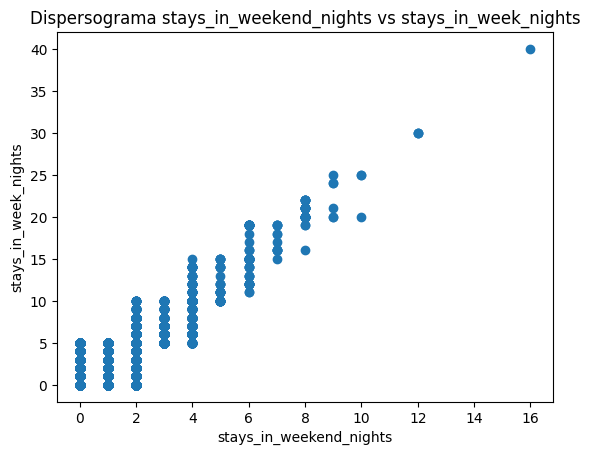

In [194]:
#Scatter Plot
plt.scatter(ds_cuantitativas.stays_in_weekend_nights,ds_cuantitativas.stays_in_week_nights)
plt.title('Dispersograma stays_in_weekend_nights vs stays_in_week_nights')
plt.xlabel('stays_in_weekend_nights')
plt.ylabel('stays_in_week_nights')
plt.show()

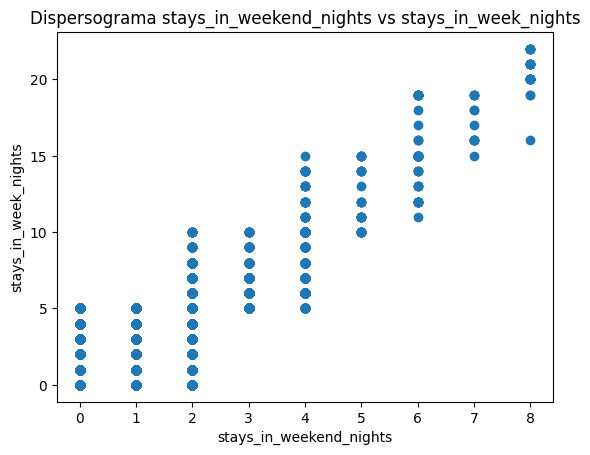

In [195]:
#Scatter Plot
plt.scatter(ds_cuantitativas_filtrado.stays_in_weekend_nights,ds_cuantitativas_filtrado.stays_in_week_nights)
plt.title('Dispersograma stays_in_weekend_nights vs stays_in_week_nights')
plt.xlabel('stays_in_weekend_nights')
plt.ylabel('stays_in_week_nights')
plt.show()

Pudimos ver que estos outliers fueron eliminados en la seccion de eliminacion automatica, aun asi, por la gran correlacion que tenian, vemos que la misma se mantuvo luego de la eliminacion.

previous_cancellations y previous_bookings_not_canceled



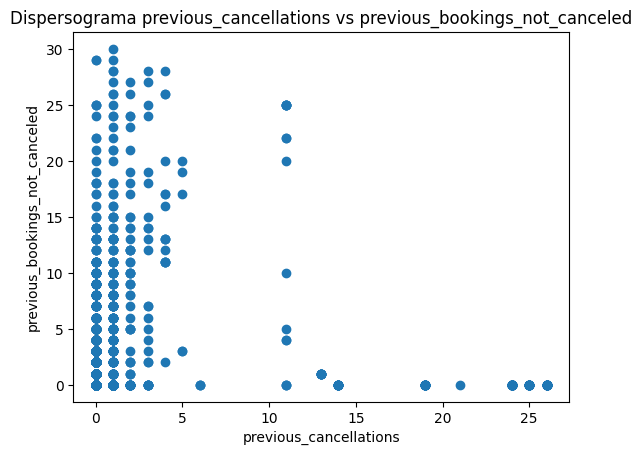

In [196]:
#Scatter Plot
plt.scatter(ds_cuantitativas_filtrado.previous_cancellations,ds_cuantitativas_filtrado.previous_bookings_not_canceled)
plt.title('Dispersograma previous_cancellations vs previous_bookings_not_canceled')
plt.xlabel('previous_cancellations')
plt.ylabel('previous_bookings_not_canceled')
plt.show()

In [197]:
#@title
labelCancels = 'cancels'
dsCuantitativasCopy = ds_cuantitativas_filtrado.copy()
addMahalanobisColumnToDf(dsCuantitativasCopy, ['previous_cancellations', 'previous_bookings_not_canceled'], labelCancels)
print(dsCuantitativasCopy['mahalanobis_'+ labelCancels].sort_values().tail(20))

31404    26.095796
24355    26.095796
53765    26.095796
56839    26.095796
36337    26.095796
23206    26.095796
152      26.095796
15598    26.095796
1837     26.095796
54997    26.397517
28948    26.404592
38013    26.450088
37288    27.377718
5620     27.404435
52507    27.435482
34911    27.435482
12781    28.420913
51614    28.505651
30468    28.505651
11405    29.406378
Name: mahalanobis_cancels, dtype: float64


In [198]:
dsCuantitativasCopy.loc[dsCuantitativasCopy['mahalanobis_'+ labelCancels] > 7].sort_values('mahalanobis_'+labelCancels, ascending=False).head(20)

lead_time  arrival_date_year  arrival_date_week_number  \
11405          2               2017                        22   
30468          0               2016                        37   
51614          5               2017                        31   
12781        304               2016                        53   
52507         50               2017                        35   
34911          1               2017                        13   
5620           5               2017                        26   
37288          4               2016                        16   
38013          1               2017                        11   
28948          3               2016                        13   
54997          8               2016                        14   
42687        275               2015                        41   
6029         275               2015                        41   
46649        275               2015                        41   
43555        275               2015                        41   
42773        275               2015                        41   
152          275               2015                        41   
53765        275               2015                        41   
17308        275               2015                        41   
36337        275               2015                        41   

       arrival_date_day_of_month  stays_in_weekend_nights  \
11405                          1                        0   
30468                          8                        0   
51614                         31                        1   
12781                         26                        1   
52507                         29                        0   
34911                         30                        0   
5620                          28                        0   
37288                         10                        2   
38013                         15                        0   
28948                         20                        2   
54997                         30                        2   
42687                          4                        2   
6029                           4                        2   
46649                          4                        2   
43555                          4                        2   
42773                          4                        2   
152                            4                        2   
53765                          4                        2   
17308                          4                        2   
36337                          4                        2   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  ...  \
11405                     1       1       0.0       0                  0  ...   
30468                     1       1       0.0       0                  1  ...   
51614                     1       1       0.0       0                  1  ...   
12781                     2       1       0.0       0                  0  ...   
52507                     2       1       0.0       0                  1  ...   
34911                     1       1       0.0       0                  0  ...   
5620                      1       1       0.0       0                  1  ...   
37288                     1       1       0.0       0                  1  ...   
38013                     1       1       0.0       0                  0  ...   
28948                     0       1       0.0       0                  1  ...   
54997                     5       1       0.0       0                  1  ...   
42687                     0       2       0.0       0                  0  ...   
6029                      0       2       0.0       0                  0  ...   
46649                     0       2       0.0       0                  0  ...   
43555                     0       2       0.0       0                  0  ...   
42773                     0       2       0.0       0          

Vemos que la distancia de mahalanobis nos marcá con mayor distancia "las esquinas de la 'L' que se forma en el dispersograma", pero para nosotros los valores que se ven más atípicos son los del medio que se ven mucho mas  separados del resto
Por lo tanto procedemos a eliminar estos mencionados

In [199]:
outliersMultivariados = ds_cuantitativas_filtrado[(ds_cuantitativas_filtrado['previous_cancellations'] > 7) & (ds_cuantitativas_filtrado['previous_bookings_not_canceled'] > 7)]
outliersMultivariados

lead_time  arrival_date_year  arrival_date_week_number  \
1579         190               2016                        15   
5384           1               2016                         5   
7723         190               2016                        15   
8931           3               2016                         3   
11948         10               2016                         7   
15232        190               2016                        15   
21315        190               2016                        15   
32488          8               2016                         7   
46252        190               2016                        15   

       arrival_date_day_of_month  stays_in_weekend_nights  \
1579                           9                        1   
5384                          29                        2   
7723                           9                        1   
8931                          16                        2   
11948                         13                        0   
15232                          9                        1   
21315                          9                        1   
32488                         10                        0   
46252                          9                        1   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  \
1579                      1       2       0.0       0                  0   
5384                      2       2       0.0       0                  1   
7723                      1       2       0.0       0                  0   
8931                      2       2       0.0       0                  1   
11948                     1       2       0.0       0                  1   
15232                     1       2       0.0       0                  0   
21315                     1       2       0.0       0                  0   
32488                     3       3       0.0       0                  1   
46252                     1       2       0.0       0                  0   

       previous_cancellations  previous_bookings_not_canceled  \
1579                       11                              25   
5384                       11                              20   
7723                       11                              25   
8931                       11                              10   
11948                      11                              22   
15232                      11                              25   
21315                      11                              25   
32488                      11                              22   
46252                      11                              25   

       booking_changes  agent  company  days_in_waiting_list     adr  \
1579                 0    0.0      0.0                    31   70.00   
5384                 0    9.0      0.0                     0  106.00   
7723                 0    0.0      0.0                    31   70.00   
8931                 0    9.0      0.0                     0   80.10   
11948                0    9.0      0.0                     0   79.00   
15232                0    0.0      0.0                    31   70.00   
21315                0    0.0      0.0                    31   70.00   
32488                1    9.0      0.0                     0   92.67   
46252                0    0.0      0.0                    31   70.00   

       required_car_parking_spaces  total_of_special_requests  is_canceled  
1579                             0                          0            1  
5384                             0                          1            0  
7723                             0                          0            1  
8931                             0                          1            0  
11948                            0                          1            0  
15232                            0                          0            1  
21315                            0                          0            

In [200]:
print(ds_cuantitativas_filtrado.shape)
print(ds_cuantitativas_final.shape)

indicesAEliminar = outliersMultivariados.index
ds_cuantitativas_filtrado.drop(indicesAEliminar, axis='index', inplace=True)
ds_cuantitativas_final.drop(indicesAEliminar, axis='index', inplace=True)

print(ds_cuantitativas_filtrado.shape)
print(ds_cuantitativas_final.shape)


(61004, 20)
(61004, 21)
(60995, 20)
(60995, 21)


## Mergeado de datasets cualitativas y cuantitativas filtrados

Validamos que los filtrados con sus final sean iguales y que no hubo corrupción con los índices

In [201]:
print(ds_cuantitativas_filtrado.shape)
print(ds_cuantitativas_final.shape)

print(ds_cualitativas_filtrado.shape)
print(ds_cualitativas_final.shape)

(60995, 20)
(60995, 21)
(61911, 10)
(61911, 11)


In [202]:
matrizCorrCuantitativasFiltrado = ds_cuantitativas_filtrado.corr()


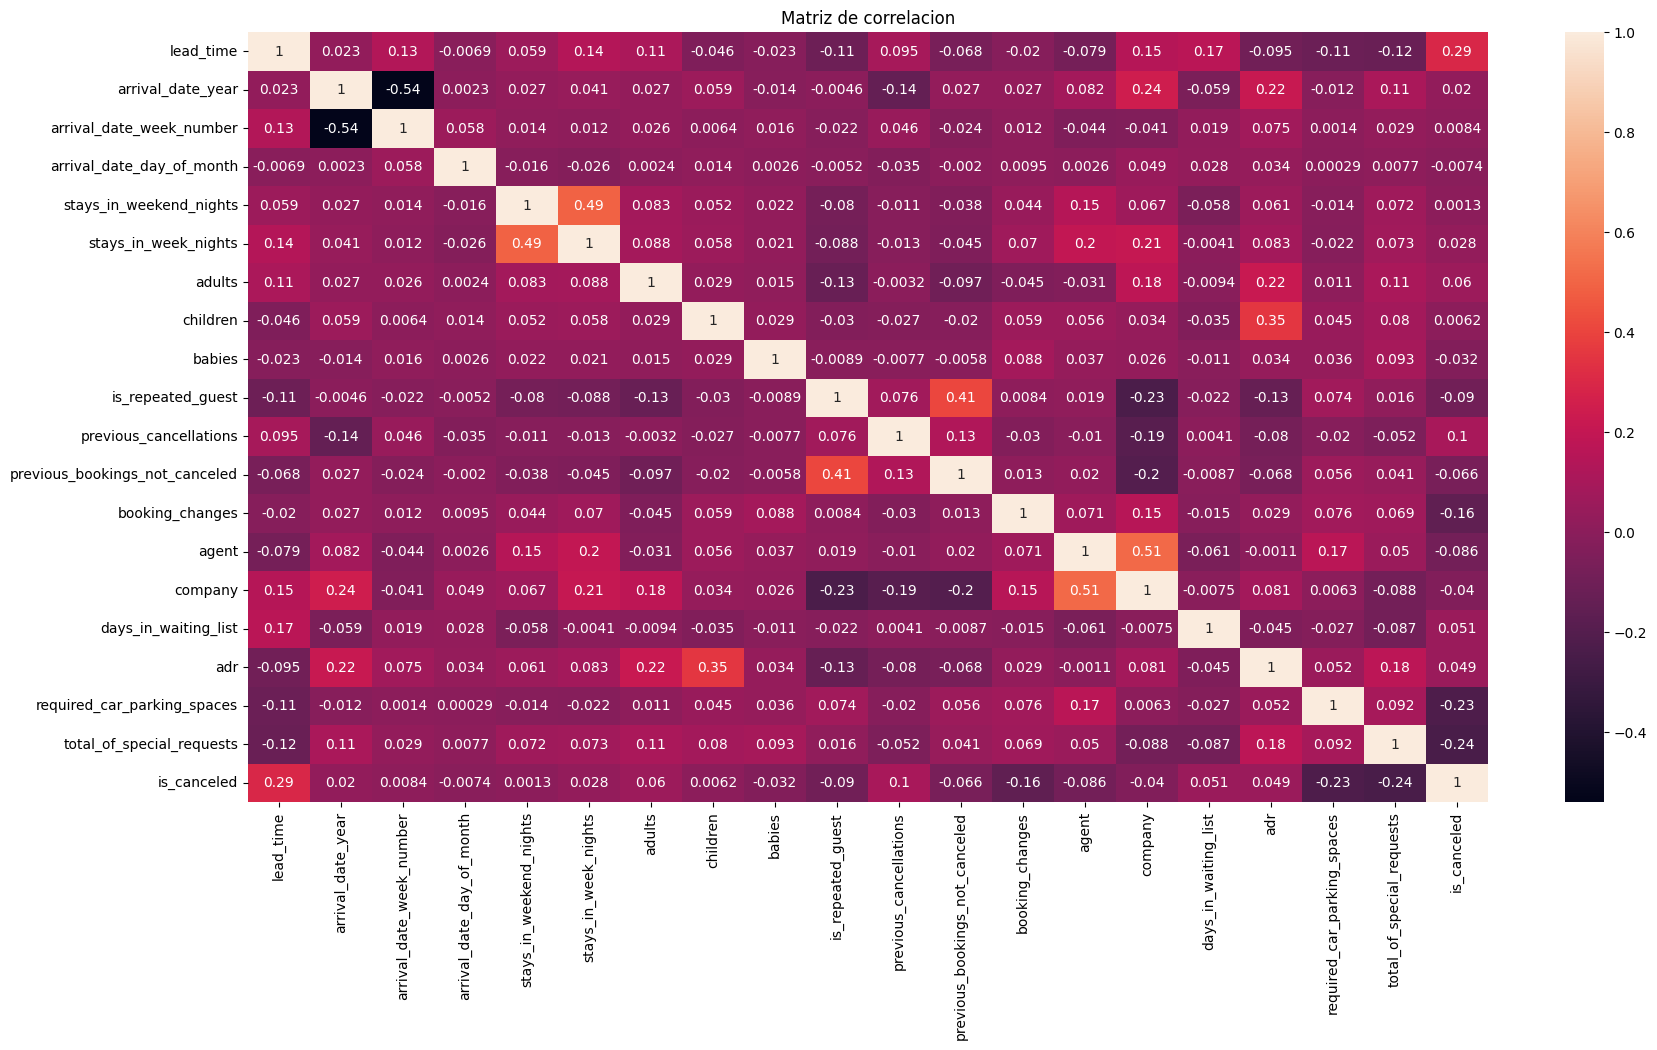

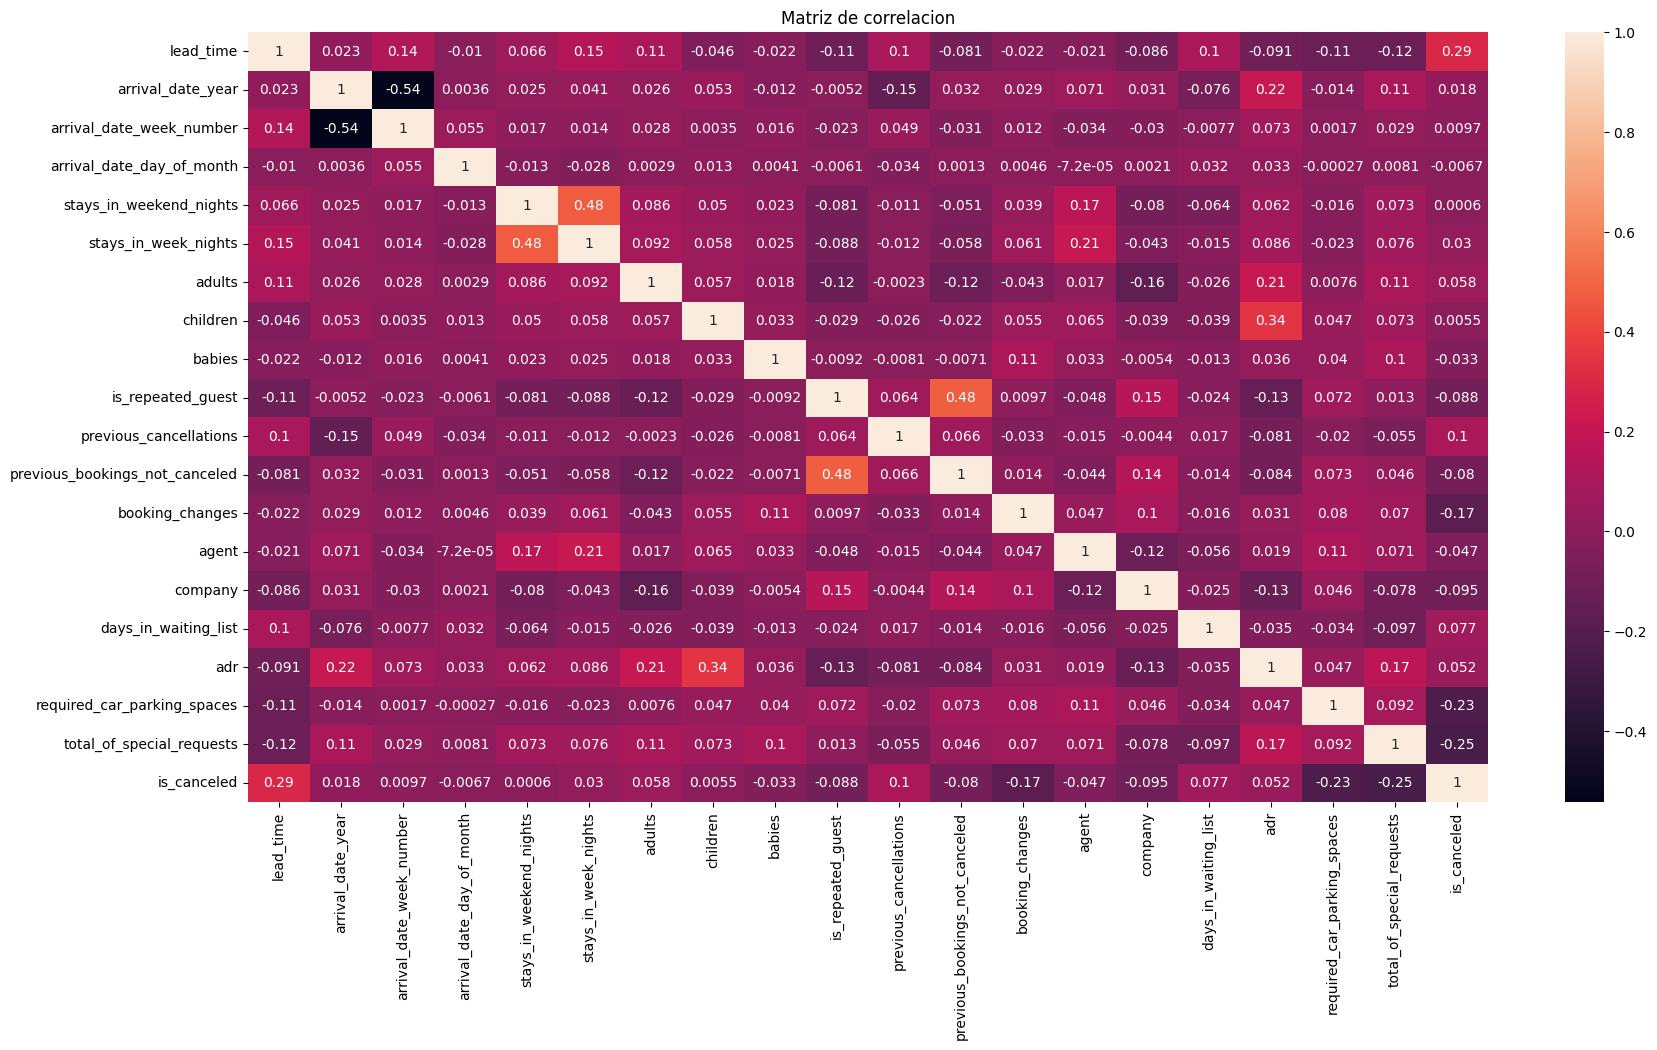

In [203]:
plot_heatmap_cuantitativas(matrizCorrCuantitativas)
plot_heatmap_cuantitativas(matrizCorrCuantitativasFiltrado)

vemos la correlacion con el target cone el ds old

In [204]:
corrWithTargetOld = matrizCorrCuantitativas.drop(columns=['is_canceled']).tail(1).transpose().reset_index()
corrWithTargetOld.rename(columns={'index':'var_name', 'is_canceled':'corrFactor'}, inplace=True)
corrWithTargetOld.sort_values(by='corrFactor', ascending=False)

var_name  corrFactor
0                        lead_time    0.293816
10          previous_cancellations    0.099613
6                           adults    0.060179
15            days_in_waiting_list    0.050827
16                             adr    0.049206
5             stays_in_week_nights    0.028439
1                arrival_date_year    0.019923
2         arrival_date_week_number    0.008357
7                         children    0.006242
4          stays_in_weekend_nights    0.001279
3        arrival_date_day_of_month   -0.007371
8                           babies   -0.032034
14                         company   -0.040010
11  previous_bookings_not_canceled   -0.065868
13                           agent   -0.086176
9                is_repeated_guest   -0.090492
12                 booking_changes   -0.159315
17     required_car_parking_spaces   -0.225915
18       total_of_special_requests   -0.244997

vemos la correlacion con el target cone el ds final

In [205]:
corrWithTargetFinal = matrizCorrCuantitativasFiltrado.drop(columns=['is_canceled']).tail(1).transpose().reset_index()
corrWithTargetFinal.rename(columns={'index':'var_name', 'is_canceled':'corrFactor'}, inplace=True)
corrWithTargetFinal
# corrWithTargetFinal.sort_values(by='corrFactor', ascending=False)

var_name  corrFactor
0                        lead_time    0.294619
1                arrival_date_year    0.018189
2         arrival_date_week_number    0.009660
3        arrival_date_day_of_month   -0.006695
4          stays_in_weekend_nights    0.000604
5             stays_in_week_nights    0.029970
6                           adults    0.058241
7                         children    0.005514
8                           babies   -0.032908
9                is_repeated_guest   -0.087744
10          previous_cancellations    0.102739
11  previous_bookings_not_canceled   -0.079811
12                 booking_changes   -0.171725
13                           agent   -0.047307
14                         company   -0.094530
15            days_in_waiting_list    0.076502
16                             adr    0.052302
17     required_car_parking_spaces   -0.227839
18       total_of_special_requests   -0.245774

In [206]:
# Obtenemos la intersección entre ds_cualitativas_final y ds_cuantitativas_final 
# joineando por el id
ds_final = pd.merge(ds_cualitativas_final, ds_cuantitativas_final, on='id', how='inner')


In [207]:
ds_final.head()

hotel arrival_date_month meal country market_segment  \
0    City Hotel          September   BB     USA      Online TA   
1  Resort Hotel            October   BB     PRT         Groups   
2    City Hotel            October   BB     CHE      Online TA   
3    City Hotel           December   BB     PRT         Groups   
4    City Hotel              March   BB     FRA  Offline TA/TO   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0                TA/TO                  D                  D   No Deposit   
1               Direct                  A                  A   No Deposit   
2                TA/TO                  F                  F   No Deposit   
3                TA/TO                  A                  A   Non Refund   
4                TA/TO                  A                  A   No Deposit   

     customer_type  ... previous_cancellations  \
0        Transient  ...                      0   
1        Transient  ...                      0   
2        Transient  ...                      0   
3        Transient  ...                      0   
4  Transient-Party  ...                      0   

   previous_bookings_not_canceled  booking_changes  agent  company  \
0                               0                0    9.0      0.0   
1                               0                0    0.0      0.0   
2                               0                0    9.0      0.0   
3                               0                0  154.0      0.0   
4                               0                0   20.0      0.0   

   days_in_waiting_list    adr  required_car_parking_spaces  \
0                     0  115.5                            0   
1                     0   42.0                            1   
2                     0  229.0                            0   
3                     0   75.0                            0   
4                     0   75.0                            0   

   total_of_special_requests  is_canceled  
0                          1            1  
1                          0            0  
2                          2            0  
3                          0            1  
4                          1            0  

[5 rows x 31 columns]

Validamos que no estén los nan

In [208]:
ds_final.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
id                                0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
adr                         

Exportamos el dataset final

In [209]:
# Exportar el Dataset a un archivo CSV
ds_final.to_csv('hotel_train_filtrado.csv', index=False)